In [1]:

pip install -r ./python/requirements.txt

  Using cached protobuf-3.5.2-cp36-cp36m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl (1.2 MB)
  Using cached grpcio-1.11.0-cp36-cp36m-macosx_10_11_x86_64.whl (1.6 MB)
ERROR: Could not find a version that satisfies the requirement torch==0.4.0 (from versions: 1.0.0, 1.0.1, 1.0.1.post2, 1.1.0, 1.1.0.post2, 1.2.0, 1.3.0, 1.3.0.post2, 1.3.1, 1.4.0, 1.5.0, 1.5.1, 1.6.0, 1.7.0, 1.7.1, 1.8.0, 1.8.1, 1.9.0, 1.9.1, 1.10.0, 1.10.1, 1.10.2)
ERROR: No matching distribution found for torch==0.4.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
#pip install torch==0.4.0

In [3]:
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import torch
from sr_agent import Agent as SR_Agent
from mlagents_envs.environment import UnityEnvironment
from mlagents_envs.environment import ActionTuple, BaseEnv
import numpy as np
from mlagents_envs.side_channel.engine_configuration_channel import EngineConfigurationChannel
import pandas as pd

In [4]:
default_file="HER_3_no.app"
alternative_file="HER_3_no_alternate.app"
default_logged="HER_3_no_log.app"
channel = EngineConfigurationChannel()
env = UnityEnvironment(file_name=default_file,worker_id=0,side_channels=[channel])
channel.set_configuration_parameters(time_scale = 100.0)
# get the behavior:
env.reset()
behavior_name = list(env.behavior_specs)[0]
print(behavior_name)
spec = env.behavior_specs[behavior_name]
# reset the environment
env.reset()
decision_steps, terminal_steps = env.get_steps(behavior_name)

for action, branch_size in enumerate(spec.action_spec.discrete_branches):
    print(f"Action number {action} has {branch_size} different options")
    
action_size=branch_size    
print('Number of actions:', action_size)

# examine the state space 
state=decision_steps.obs[0][0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)
print('States have length:', type(state))
env.reset()

HERTask_2?team=0
Action number 0 has 5 different options
Number of actions: 5
States look like: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.         0.         0.         0.
 0.         0.         0.         0.46935856 0.         1.
 0.         0.         0.         0.         0.         0.52897596
 0.         1.         0.         0.         0.         0.
 0.         0.52897596 0.         1.         0.         0.
 0.         0.         0.         0.7077888  0.         1.
 0.        

Episode 146	Average Score: -0.999994,	Average Step: 499.0Task solved in step: 317
Score: [9.364202]
Episode 151	Average Score: -0.896352,	Average Step: 497.18Task solved in step: 354
Score: [9.291801]
Episode 152	Average Score: -0.793434,	Average Step: 495.73Task solved in step: 444
Score: [9.110604]
Episode 155	Average Score: -0.692328,	Average Step: 495.18Task solved in step: 268
Score: [9.4622]
Episode 252	Average Score: -0.794266,	Average Step: 496.14Task solved in step: 263
Score: [9.472]
Episode 289	Average Score: -0.895274,	Average Step: 496.64Task solved in step: 360
Score: [9.278402]
Episode 351	Average Score: -0.792490,	Average Step: 495.25Task solved in step: 253
Score: [9.493799]
Episode 362	Average Score: -0.792272,	Average Step: 495.15Task solved in step: 288
Score: [9.422001]
Episode 363	Average Score: -0.688052,	Average Step: 493.04Task solved in step: 234
Score: [9.5302]
Episode 368	Average Score: -0.582750,	Average Step: 490.39Task solved in step: 389
Score: [9.220603

Episode 649	Average Score: 4.002667,	Average Step: 297.87Task solved in step: 21
Score: [9.9564]
Episode 650	Average Score: 4.002733,	Average Step: 297.83Task solved in step: 56
Score: [9.8878]
Episode 651	Average Score: 4.111611,	Average Step: 293.4Task solved in step: 21
Score: [9.9564]
Episode 652	Average Score: 4.111731,	Average Step: 293.34Task solved in step: 21
Score: [9.9564]
Episode 653	Average Score: 4.221294,	Average Step: 288.56Task solved in step: 21
Score: [9.9564]
Episode 654	Average Score: 4.222401,	Average Step: 288.0Task solved in step: 69
Score: [9.8618]
Episode 655	Average Score: 4.331018,	Average Step: 283.7Task solved in step: 37
Score: [9.9246]
Episode 656	Average Score: 4.440264,	Average Step: 279.08Task solved in step: 24
Score: [9.9512]
Episode 657	Average Score: 4.549777,	Average Step: 274.33Task solved in step: 30
Score: [9.938399]
Episode 658	Average Score: 4.659161,	Average Step: 269.64Task solved in step: 36
Score: [9.927]
Episode 659	Average Score: 4.768

Episode 762	Average Score: 6.854934,	Average Step: 171.85Task solved in step: 21
Score: [9.9566]
Episode 763	Average Score: 6.855212,	Average Step: 171.71Task solved in step: 22
Score: [9.955601]
Episode 765	Average Score: 6.746011,	Average Step: 176.31Task solved in step: 20
Score: [9.9592]
Episode 767	Average Score: 6.636664,	Average Step: 180.98Task solved in step: 21
Score: [9.9572]
Episode 768	Average Score: 6.636780,	Average Step: 180.92Task solved in step: 20
Score: [9.9592]
Episode 769	Average Score: 6.746373,	Average Step: 176.13Task solved in step: 20
Score: [9.9592]
Episode 770	Average Score: 6.855964,	Average Step: 171.34Task solved in step: 20
Score: [9.9592]
Episode 771	Average Score: 6.858284,	Average Step: 170.18Task solved in step: 20
Score: [9.9592]
Episode 772	Average Score: 6.858549,	Average Step: 170.05Task solved in step: 20
Score: [9.9592]
Episode 773	Average Score: 6.858963,	Average Step: 169.84Task solved in step: 20
Score: [9.9592]
Episode 774	Average Score: 6

Episode 850	Average Score: 9.181706,	Average Step: 58.55Task solved in step: 26
Score: [9.946]
Episode 851	Average Score: 9.181595,	Average Step: 58.6Task solved in step: 26
Score: [9.946]
Episode 852	Average Score: 9.291054,	Average Step: 53.87Task solved in step: 26
Score: [9.946]
Episode 853	Average Score: 9.400514,	Average Step: 49.14Task solved in step: 20
Score: [9.9592]
Episode 854	Average Score: 9.400514,	Average Step: 49.14Task solved in step: 20
Score: [9.958]
Episode 855	Average Score: 9.510094,	Average Step: 44.35Task solved in step: 20
Score: [9.958]
Episode 856	Average Score: 9.619674,	Average Step: 39.56Task solved in step: 20
Score: [9.9592]
Episode 857	Average Score: 9.619686,	Average Step: 39.56Task solved in step: 20
Score: [9.9592]
Episode 858	Average Score: 9.619718,	Average Step: 39.55Task solved in step: 26
Score: [9.946]
Episode 859	Average Score: 9.619586,	Average Step: 39.61Task solved in step: 21
Score: [9.9566]
Episode 860	Average Score: 9.619572,	Average St

Episode 1021	Average Score: 9.956326,	Average Step: 21.49Task solved in step: 26
Score: [9.9472]
Episode 1022	Average Score: 9.956203,	Average Step: 21.55Task solved in step: 20
Score: [9.9592]
Episode 1023	Average Score: 9.956222,	Average Step: 21.54Task solved in step: 20
Score: [9.9592]
Episode 1024	Average Score: 9.956249,	Average Step: 21.53Task solved in step: 20
Score: [9.9592]
Episode 1025	Average Score: 9.956435,	Average Step: 21.44Task solved in step: 21
Score: [9.956]
Episode 1026	Average Score: 9.956398,	Average Step: 21.45Task solved in step: 20
Score: [9.9592]
Episode 1027	Average Score: 9.956394,	Average Step: 21.45Task solved in step: 22
Score: [9.954801]
Episode 1028	Average Score: 9.956414,	Average Step: 21.44Task solved in step: 20
Score: [9.9592]
Episode 1029	Average Score: 9.956409,	Average Step: 21.44Task solved in step: 20
Score: [9.9592]
Episode 1030	Average Score: 9.956410,	Average Step: 21.44Task solved in step: 20
Score: [9.9592]
Episode 1031	Average Score: 9

Episode 1108	Average Score: 9.846856,	Average Step: 26.09Task solved in step: 20
Score: [9.9592]
Episode 1109	Average Score: 9.846856,	Average Step: 26.09Task solved in step: 24
Score: [9.9512]
Episode 1110	Average Score: 9.846804,	Average Step: 26.12Task solved in step: 20
Score: [9.9592]
Episode 1111	Average Score: 9.846823,	Average Step: 26.11Task solved in step: 20
Score: [9.9592]
Episode 1112	Average Score: 9.846818,	Average Step: 26.11Task solved in step: 20
Score: [9.9592]
Episode 1113	Average Score: 9.846860,	Average Step: 26.09Task solved in step: 20
Score: [9.9592]
Episode 1114	Average Score: 9.847023,	Average Step: 26.01Task solved in step: 20
Score: [9.9592]
Episode 1115	Average Score: 9.847252,	Average Step: 25.9Task solved in step: 20
Score: [9.9592]
Episode 1116	Average Score: 9.848852,	Average Step: 25.1Task solved in step: 20
Score: [9.9592]
Episode 1117	Average Score: 9.848852,	Average Step: 25.1Task solved in step: 20
Score: [9.9592]
Episode 1118	Average Score: 9.848

Episode 1196	Average Score: 9.519840,	Average Step: 39.55Task solved in step: 23
Score: [9.9524]
Episode 1197	Average Score: 9.519772,	Average Step: 39.58Task solved in step: 20
Score: [9.958]
Episode 1198	Average Score: 9.519759,	Average Step: 39.58Task solved in step: 23
Score: [9.9522]
Episode 1199	Average Score: 9.519690,	Average Step: 39.61Task solved in step: 20
Score: [9.9592]
Episode 1200	Average Score: 9.629282,	Average Step: 34.82Task solved in step: 20
Score: [9.9592]
Episode 1201	Average Score: 9.629373,	Average Step: 34.78Task solved in step: 23
Score: [9.952999]
Episode 1202	Average Score: 9.629311,	Average Step: 34.81Task solved in step: 20
Score: [9.9592]
Episode 1203	Average Score: 9.629311,	Average Step: 34.81Task solved in step: 20
Score: [9.9592]
Episode 1204	Average Score: 9.629311,	Average Step: 34.81Task solved in step: 20
Score: [9.9592]
Episode 1205	Average Score: 9.629311,	Average Step: 34.81Task solved in step: 20
Score: [9.958]
Episode 1206	Average Score: 9.

Episode 1377	Average Score: 9.837100,	Average Step: 31.04Task solved in step: 20
Score: [9.9592]
Episode 1378	Average Score: 9.837140,	Average Step: 31.02Task solved in step: 24
Score: [9.9508]
Episode 1379	Average Score: 9.837096,	Average Step: 31.04Task solved in step: 23
Score: [9.9534]
Episode 1380	Average Score: 9.837078,	Average Step: 31.05Task solved in step: 22
Score: [9.9552]
Episode 1381	Average Score: 9.837037,	Average Step: 31.07Task solved in step: 20
Score: [9.9592]
Episode 1382	Average Score: 9.837037,	Average Step: 31.07Task solved in step: 20
Score: [9.9592]
Episode 1383	Average Score: 9.837037,	Average Step: 31.07Task solved in step: 20
Score: [9.9592]
Episode 1384	Average Score: 9.837037,	Average Step: 31.07Task solved in step: 20
Score: [9.9592]
Episode 1385	Average Score: 9.837039,	Average Step: 31.07Task solved in step: 20
Score: [9.9592]
Episode 1386	Average Score: 9.837038,	Average Step: 31.07Task solved in step: 20
Score: [9.9592]
Episode 1387	Average Score: 9.

Episode 1550	Average Score: 9.622712,	Average Step: 38.21Task solved in step: 20
Score: [9.9592]
Episode 1551	Average Score: 9.622712,	Average Step: 38.21Task solved in step: 20
Score: [9.9592]
Episode 1552	Average Score: 9.622712,	Average Step: 38.21Task solved in step: 20
Score: [9.9592]
Episode 1553	Average Score: 9.622712,	Average Step: 38.21Task solved in step: 20
Score: [9.9592]
Episode 1554	Average Score: 9.622712,	Average Step: 38.21Task solved in step: 20
Score: [9.9592]
Episode 1555	Average Score: 9.622712,	Average Step: 38.21Task solved in step: 20
Score: [9.9592]
Episode 1556	Average Score: 9.622712,	Average Step: 38.21Task solved in step: 20
Score: [9.9592]
Episode 1557	Average Score: 9.622712,	Average Step: 38.21Task solved in step: 20
Score: [9.9592]
Episode 1558	Average Score: 9.622712,	Average Step: 38.21Task solved in step: 20
Score: [9.9592]
Episode 1559	Average Score: 9.622712,	Average Step: 38.21Task solved in step: 20
Score: [9.9592]
Episode 1561	Average Score: 9.

Episode 1640	Average Score: 9.402064,	Average Step: 48.53Task solved in step: 20
Score: [9.9592]
Episode 1641	Average Score: 9.402064,	Average Step: 48.53Task solved in step: 393
Score: [9.213002]
Episode 1642	Average Score: 9.394602,	Average Step: 52.26Task solved in step: 20
Score: [9.9592]
Episode 1643	Average Score: 9.394602,	Average Step: 52.26Task solved in step: 20
Score: [9.9592]
Episode 1644	Average Score: 9.394602,	Average Step: 52.26Task solved in step: 22
Score: [9.9546]
Episode 1645	Average Score: 9.396451,	Average Step: 51.33Task solved in step: 20
Score: [9.9592]
Episode 1646	Average Score: 9.396452,	Average Step: 51.33Task solved in step: 20
Score: [9.9592]
Episode 1647	Average Score: 9.396452,	Average Step: 51.33Task solved in step: 20
Score: [9.9592]
Episode 1648	Average Score: 9.396453,	Average Step: 51.33Task solved in step: 20
Score: [9.9592]
Episode 1649	Average Score: 9.396453,	Average Step: 51.33Task solved in step: 22
Score: [9.955]
Episode 1650	Average Score: 

Episode 1726	Average Score: 9.833436,	Average Step: 32.86Task solved in step: 20
Score: [9.9592]
Episode 1727	Average Score: 9.833436,	Average Step: 32.86Task solved in step: 20
Score: [9.9592]
Episode 1728	Average Score: 9.833436,	Average Step: 32.86Task solved in step: 20
Score: [9.9592]
Episode 1729	Average Score: 9.833436,	Average Step: 32.86Task solved in step: 20
Score: [9.9592]
Episode 1730	Average Score: 9.833436,	Average Step: 32.86Task solved in step: 20
Score: [9.9592]
Episode 1731	Average Score: 9.833436,	Average Step: 32.86Task solved in step: 23
Score: [9.952999]
Episode 1732	Average Score: 9.833374,	Average Step: 32.89Task solved in step: 20
Score: [9.9592]
Episode 1733	Average Score: 9.833374,	Average Step: 32.89Task solved in step: 20
Score: [9.9592]
Episode 1734	Average Score: 9.833374,	Average Step: 32.89Task solved in step: 20
Score: [9.9592]
Episode 1735	Average Score: 9.833374,	Average Step: 32.89Task solved in step: 20
Score: [9.9592]
Episode 1736	Average Score: 

Episode 1895	Average Score: 9.955456,	Average Step: 21.86Task solved in step: 20
Score: [9.9592]
Episode 1896	Average Score: 9.955456,	Average Step: 21.86Task solved in step: 20
Score: [9.9592]
Episode 1897	Average Score: 9.955456,	Average Step: 21.86Task solved in step: 22
Score: [9.954801]
Episode 1898	Average Score: 9.955411,	Average Step: 21.88Task solved in step: 20
Score: [9.9592]
Episode 1899	Average Score: 9.955411,	Average Step: 21.88Task solved in step: 20
Score: [9.9592]
Episode 1900	Average Score: 9.955411,	Average Step: 21.88Task solved in step: 22
Score: [9.954201]
Episode 1901	Average Score: 9.955361,	Average Step: 21.9Task solved in step: 20
Score: [9.9592]
Episode 1902	Average Score: 9.955388,	Average Step: 21.89Task solved in step: 20
Score: [9.9592]
Episode 1903	Average Score: 9.955388,	Average Step: 21.89Task solved in step: 20
Score: [9.9592]
Episode 1904	Average Score: 9.955388,	Average Step: 21.89Task solved in step: 20
Score: [9.9592]
Episode 1905	Average Score:

Episode 2064	Average Score: 9.958628,	Average Step: 20.26Task solved in step: 20
Score: [9.9592]
Episode 2065	Average Score: 9.958628,	Average Step: 20.26Task solved in step: 20
Score: [9.9592]
Episode 2066	Average Score: 9.958628,	Average Step: 20.26Task solved in step: 20
Score: [9.9592]
Episode 2067	Average Score: 9.958678,	Average Step: 20.24Task solved in step: 20
Score: [9.9592]
Episode 2068	Average Score: 9.958678,	Average Step: 20.24Task solved in step: 20
Score: [9.9592]
Episode 2069	Average Score: 9.958678,	Average Step: 20.24Task solved in step: 20
Score: [9.9592]
Episode 2070	Average Score: 9.958678,	Average Step: 20.24Task solved in step: 20
Score: [9.9592]
Episode 2071	Average Score: 9.958678,	Average Step: 20.24Task solved in step: 20
Score: [9.9592]
Episode 2072	Average Score: 9.958678,	Average Step: 20.24Task solved in step: 20
Score: [9.9592]
Episode 2073	Average Score: 9.958678,	Average Step: 20.24Task solved in step: 20
Score: [9.9592]
Episode 2074	Average Score: 9.

Episode 2151	Average Score: 9.739316,	Average Step: 29.91Task solved in step: 20
Score: [9.9592]
Episode 2152	Average Score: 9.739336,	Average Step: 29.9Task solved in step: 20
Score: [9.9592]
Episode 2153	Average Score: 9.739387,	Average Step: 29.88Task solved in step: 20
Score: [9.9592]
Episode 2154	Average Score: 9.739501,	Average Step: 29.82Task solved in step: 20
Score: [9.9592]
Episode 2155	Average Score: 9.739500,	Average Step: 29.82Task solved in step: 20
Score: [9.9592]
Episode 2156	Average Score: 9.739500,	Average Step: 29.82Task solved in step: 20
Score: [9.9592]
Episode 2157	Average Score: 9.739500,	Average Step: 29.82Task solved in step: 20
Score: [9.9592]
Episode 2158	Average Score: 9.739500,	Average Step: 29.82Task solved in step: 20
Score: [9.9592]
Episode 2159	Average Score: 9.739500,	Average Step: 29.82Task solved in step: 20
Score: [9.9592]
Episode 2160	Average Score: 9.739500,	Average Step: 29.82Task solved in step: 20
Score: [9.9592]
Episode 2161	Average Score: 9.7

Episode 2236	Average Score: 9.953055,	Average Step: 23.05Task solved in step: 20
Score: [9.9592]
Episode 2237	Average Score: 9.953055,	Average Step: 23.05Task solved in step: 20
Score: [9.9592]
Episode 2238	Average Score: 9.953055,	Average Step: 23.05Task solved in step: 20
Score: [9.9592]
Episode 2239	Average Score: 9.953056,	Average Step: 23.05Task solved in step: 20
Score: [9.9592]
Episode 2241	Average Score: 9.843464,	Average Step: 27.84Task solved in step: 20
Score: [9.9592]
Episode 2242	Average Score: 9.843464,	Average Step: 27.84Task solved in step: 22
Score: [9.9552]
Episode 2243	Average Score: 9.843424,	Average Step: 27.86Task solved in step: 20
Score: [9.9592]
Episode 2244	Average Score: 9.843481,	Average Step: 27.83Task solved in step: 145
Score: [9.709]
Episode 2245	Average Score: 9.841030,	Average Step: 29.06Task solved in step: 20
Score: [9.9592]
Episode 2246	Average Score: 9.841029,	Average Step: 29.06Task solved in step: 22
Score: [9.955]
Episode 2247	Average Score: 9.8

Episode 2406	Average Score: 9.958621,	Average Step: 20.25Task solved in step: 20
Score: [9.9592]
Episode 2407	Average Score: 9.958620,	Average Step: 20.25Task solved in step: 22
Score: [9.9554]
Episode 2408	Average Score: 9.958582,	Average Step: 20.27Task solved in step: 20
Score: [9.9592]
Episode 2409	Average Score: 9.958582,	Average Step: 20.27Task solved in step: 20
Score: [9.9592]
Episode 2410	Average Score: 9.958582,	Average Step: 20.27Task solved in step: 20
Score: [9.958]
Episode 2411	Average Score: 9.958582,	Average Step: 20.27Task solved in step: 23
Score: [9.9524]
Episode 2412	Average Score: 9.958526,	Average Step: 20.3Task solved in step: 21
Score: [9.9568]
Episode 2413	Average Score: 9.958501,	Average Step: 20.31Task solved in step: 20
Score: [9.9592]
Episode 2414	Average Score: 9.958501,	Average Step: 20.31Task solved in step: 20
Score: [9.9592]
Episode 2415	Average Score: 9.958502,	Average Step: 20.31Task solved in step: 20
Score: [9.9592]
Episode 2416	Average Score: 9.95

Episode 2575	Average Score: 9.958205,	Average Step: 20.44Task solved in step: 20
Score: [9.9592]
Episode 2576	Average Score: 9.958206,	Average Step: 20.44Task solved in step: 20
Score: [9.9592]
Episode 2577	Average Score: 9.958205,	Average Step: 20.44Task solved in step: 20
Score: [9.9592]
Episode 2578	Average Score: 9.958206,	Average Step: 20.44Task solved in step: 20
Score: [9.9592]
Episode 2579	Average Score: 9.958206,	Average Step: 20.44Task solved in step: 20
Score: [9.9592]
Episode 2580	Average Score: 9.958264,	Average Step: 20.41Task solved in step: 20
Score: [9.9592]
Episode 2581	Average Score: 9.958264,	Average Step: 20.41Task solved in step: 20
Score: [9.9592]
Episode 2582	Average Score: 9.958658,	Average Step: 20.21Task solved in step: 20
Score: [9.9592]
Episode 2583	Average Score: 9.958658,	Average Step: 20.21Task solved in step: 21
Score: [9.956201]
Episode 2584	Average Score: 9.958628,	Average Step: 20.22Task solved in step: 20
Score: [9.9592]
Episode 2585	Average Score: 

Episode 2661	Average Score: 9.957764,	Average Step: 20.53Task solved in step: 20
Score: [9.958]
Episode 2662	Average Score: 9.957751,	Average Step: 20.53Task solved in step: 23
Score: [9.9522]
Episode 2663	Average Score: 9.957682,	Average Step: 20.56Task solved in step: 20
Score: [9.958]
Episode 2664	Average Score: 9.957721,	Average Step: 20.54Task solved in step: 20
Score: [9.958]
Episode 2665	Average Score: 9.957708,	Average Step: 20.54Task solved in step: 20
Score: [9.958]
Episode 2666	Average Score: 9.957708,	Average Step: 20.54Task solved in step: 20
Score: [9.958]
Episode 2667	Average Score: 9.957707,	Average Step: 20.54Task solved in step: 20
Score: [9.958]
Episode 2668	Average Score: 9.957697,	Average Step: 20.54Task solved in step: 20
Score: [9.958]
Episode 2669	Average Score: 9.957685,	Average Step: 20.54Task solved in step: 20
Score: [9.958]
Episode 2670	Average Score: 9.957712,	Average Step: 20.52Task solved in step: 23
Score: [9.9536]
Episode 2671	Average Score: 9.957656,	

Episode 2747	Average Score: 9.956326,	Average Step: 21.11Task solved in step: 20
Score: [9.9592]
Episode 2748	Average Score: 9.956326,	Average Step: 21.11Task solved in step: 20
Score: [9.9592]
Episode 2749	Average Score: 9.956326,	Average Step: 21.11Task solved in step: 20
Score: [9.9592]
Episode 2750	Average Score: 9.956326,	Average Step: 21.11Task solved in step: 20
Score: [9.9592]
Episode 2751	Average Score: 9.956326,	Average Step: 21.11Task solved in step: 20
Score: [9.9592]
Episode 2752	Average Score: 9.956363,	Average Step: 21.09Task solved in step: 20
Score: [9.9592]
Episode 2753	Average Score: 9.956364,	Average Step: 21.09Task solved in step: 23
Score: [9.9522]
Episode 2754	Average Score: 9.956305,	Average Step: 21.12Task solved in step: 20
Score: [9.9592]
Episode 2755	Average Score: 9.956357,	Average Step: 21.1Task solved in step: 20
Score: [9.9592]
Episode 2756	Average Score: 9.956369,	Average Step: 21.1Task solved in step: 20
Score: [9.9592]
Episode 2757	Average Score: 9.95

Episode 2833	Average Score: 9.951410,	Average Step: 23.72Task solved in step: 20
Score: [9.9592]
Episode 2834	Average Score: 9.951422,	Average Step: 23.72Task solved in step: 20
Score: [9.958]
Episode 2835	Average Score: 9.951422,	Average Step: 23.72Task solved in step: 20
Score: [9.958]
Episode 2836	Average Score: 9.951422,	Average Step: 23.72Task solved in step: 20
Score: [9.958]
Episode 2837	Average Score: 9.951422,	Average Step: 23.72Task solved in step: 20
Score: [9.9592]
Episode 2838	Average Score: 9.951441,	Average Step: 23.71Task solved in step: 20
Score: [9.958]
Episode 2839	Average Score: 9.951428,	Average Step: 23.71Task solved in step: 21
Score: [9.9564]
Episode 2840	Average Score: 9.951400,	Average Step: 23.72Task solved in step: 20
Score: [9.9592]
Episode 2841	Average Score: 9.951412,	Average Step: 23.72Task solved in step: 20
Score: [9.9592]
Episode 2842	Average Score: 9.951412,	Average Step: 23.72Task solved in step: 20
Score: [9.9592]
Episode 2843	Average Score: 9.9514

Episode 2918	Average Score: 9.958292,	Average Step: 20.19Task solved in step: 20
Score: [9.9592]
Episode 2919	Average Score: 9.958317,	Average Step: 20.18Task solved in step: 20
Score: [9.958]
Episode 2920	Average Score: 9.958317,	Average Step: 20.18Task solved in step: 20
Score: [9.958]
Episode 2921	Average Score: 9.958304,	Average Step: 20.18Task solved in step: 20
Score: [9.9592]
Episode 2922	Average Score: 9.958304,	Average Step: 20.18Task solved in step: 20
Score: [9.958]
Episode 2923	Average Score: 9.958292,	Average Step: 20.18Task solved in step: 20
Score: [9.958]
Episode 2924	Average Score: 9.958280,	Average Step: 20.18Task solved in step: 22
Score: [9.9554]
Episode 2925	Average Score: 9.958241,	Average Step: 20.2Task solved in step: 20
Score: [9.958]
Episode 2926	Average Score: 9.958229,	Average Step: 20.2Task solved in step: 22
Score: [9.9552]
Episode 2927	Average Score: 9.958201,	Average Step: 20.22Task solved in step: 20
Score: [9.958]
Episode 2928	Average Score: 9.958189,	

Episode 3003	Average Score: 9.953620,	Average Step: 22.35Task solved in step: 20
Score: [9.958]
Episode 3004	Average Score: 9.953621,	Average Step: 22.35Task solved in step: 20
Score: [9.958]
Episode 3005	Average Score: 9.953620,	Average Step: 22.35Task solved in step: 20
Score: [9.958]
Episode 3006	Average Score: 9.953620,	Average Step: 22.35Task solved in step: 20
Score: [9.958]
Episode 3007	Average Score: 9.953620,	Average Step: 22.35Task solved in step: 21
Score: [9.9568]
Episode 3008	Average Score: 9.953609,	Average Step: 22.36Task solved in step: 20
Score: [9.958]
Episode 3009	Average Score: 9.953608,	Average Step: 22.36Task solved in step: 23
Score: [9.9526005]
Episode 3010	Average Score: 9.953541,	Average Step: 22.39Task solved in step: 20
Score: [9.958]
Episode 3011	Average Score: 9.953529,	Average Step: 22.39Task solved in step: 21
Score: [9.9574]
Episode 3012	Average Score: 9.953524,	Average Step: 22.4Task solved in step: 20
Score: [9.958]
Episode 3013	Average Score: 9.95352

Episode 3175	Average Score: 9.844112,	Average Step: 27.01Task solved in step: 20
Score: [9.958]
Episode 3176	Average Score: 9.844112,	Average Step: 27.01Task solved in step: 20
Score: [9.958]
Episode 3177	Average Score: 9.844112,	Average Step: 27.01Task solved in step: 20
Score: [9.958]
Episode 3178	Average Score: 9.844112,	Average Step: 27.01Task solved in step: 20
Score: [9.958]
Episode 3179	Average Score: 9.844112,	Average Step: 27.01Task solved in step: 20
Score: [9.958]
Episode 3180	Average Score: 9.844112,	Average Step: 27.01Task solved in step: 23
Score: [9.952801]
Episode 3181	Average Score: 9.844061,	Average Step: 27.04Task solved in step: 20
Score: [9.958]
Episode 3182	Average Score: 9.844090,	Average Step: 27.02Task solved in step: 20
Score: [9.958]
Episode 3183	Average Score: 9.844149,	Average Step: 26.99Task solved in step: 21
Score: [9.9578]
Episode 3184	Average Score: 9.844444,	Average Step: 26.85Task solved in step: 20
Score: [9.958]
Episode 3185	Average Score: 9.844444

Episode 3346	Average Score: 9.957418,	Average Step: 20.46Task solved in step: 20
Score: [9.958]
Episode 3347	Average Score: 9.957418,	Average Step: 20.46Task solved in step: 20
Score: [9.958]
Episode 3348	Average Score: 9.957418,	Average Step: 20.46Task solved in step: 20
Score: [9.958]
Episode 3349	Average Score: 9.957418,	Average Step: 20.46Task solved in step: 20
Score: [9.958]
Episode 3350	Average Score: 9.957407,	Average Step: 20.46Task solved in step: 22
Score: [9.9544]
Episode 3351	Average Score: 9.957458,	Average Step: 20.43Task solved in step: 20
Score: [9.958]
Episode 3352	Average Score: 9.957504,	Average Step: 20.4Task solved in step: 20
Score: [9.958]
Episode 3353	Average Score: 9.957504,	Average Step: 20.4Task solved in step: 20
Score: [9.958]
Episode 3354	Average Score: 9.957504,	Average Step: 20.4Task solved in step: 20
Score: [9.958]
Episode 3355	Average Score: 9.957505,	Average Step: 20.4Task solved in step: 20
Score: [9.958]
Episode 3356	Average Score: 9.957504,	Avera

Episode 3516	Average Score: 9.955434,	Average Step: 21.43Task solved in step: 20
Score: [9.958]
Episode 3517	Average Score: 9.955434,	Average Step: 21.43Task solved in step: 20
Score: [9.958]
Episode 3518	Average Score: 9.955434,	Average Step: 21.43Task solved in step: 21
Score: [9.956201]
Episode 3519	Average Score: 9.955416,	Average Step: 21.44Task solved in step: 20
Score: [9.958]
Episode 3520	Average Score: 9.955404,	Average Step: 21.44Task solved in step: 20
Score: [9.958]
Episode 3521	Average Score: 9.955404,	Average Step: 21.44Task solved in step: 20
Score: [9.958]
Episode 3522	Average Score: 9.955423,	Average Step: 21.43Task solved in step: 22
Score: [9.9552]
Episode 3523	Average Score: 9.955396,	Average Step: 21.45Task solved in step: 20
Score: [9.958]
Episode 3524	Average Score: 9.955397,	Average Step: 21.45Task solved in step: 20
Score: [9.958]
Episode 3525	Average Score: 9.955397,	Average Step: 21.45Task solved in step: 20
Score: [9.958]
Episode 3526	Average Score: 9.955397

Episode 3687	Average Score: 9.847816,	Average Step: 25.16Task solved in step: 23
Score: [9.953199]
Episode 3688	Average Score: 9.847768,	Average Step: 25.19Task solved in step: 20
Score: [9.958]
Episode 3689	Average Score: 9.847768,	Average Step: 25.19Task solved in step: 20
Score: [9.9592]
Episode 3690	Average Score: 9.847780,	Average Step: 25.19Task solved in step: 20
Score: [9.958]
Episode 3691	Average Score: 9.847824,	Average Step: 25.16Task solved in step: 20
Score: [9.958]
Episode 3692	Average Score: 9.847825,	Average Step: 25.16Task solved in step: 20
Score: [9.958]
Episode 3693	Average Score: 9.847825,	Average Step: 25.16Task solved in step: 20
Score: [9.958]
Episode 3694	Average Score: 9.847825,	Average Step: 25.16Task solved in step: 20
Score: [9.958]
Episode 3695	Average Score: 9.847825,	Average Step: 25.16Task solved in step: 20
Score: [9.958]
Episode 3696	Average Score: 9.847825,	Average Step: 25.16Task solved in step: 20
Score: [9.958]
Episode 3697	Average Score: 9.847825

Episode 3858	Average Score: 9.957564,	Average Step: 20.29Task solved in step: 20
Score: [9.958]
Episode 3859	Average Score: 9.957563,	Average Step: 20.29Task solved in step: 20
Score: [9.958]
Episode 3860	Average Score: 9.957564,	Average Step: 20.29Task solved in step: 20
Score: [9.958]
Episode 3861	Average Score: 9.957564,	Average Step: 20.29Task solved in step: 21
Score: [9.9568]
Episode 3862	Average Score: 9.957553,	Average Step: 20.3Task solved in step: 20
Score: [9.958]
Episode 3863	Average Score: 9.957553,	Average Step: 20.3Task solved in step: 20
Score: [9.958]
Episode 3864	Average Score: 9.957553,	Average Step: 20.3Task solved in step: 20
Score: [9.958]
Episode 3865	Average Score: 9.957553,	Average Step: 20.3Task solved in step: 20
Score: [9.958]
Episode 3866	Average Score: 9.957553,	Average Step: 20.3Task solved in step: 20
Score: [9.958]
Episode 3867	Average Score: 9.957553,	Average Step: 20.3Task solved in step: 20
Score: [9.958]
Episode 3868	Average Score: 9.957553,	Average

Episode 3944	Average Score: 9.948563,	Average Step: 24.79Task solved in step: 20
Score: [9.958]
Episode 3945	Average Score: 9.948564,	Average Step: 24.79Task solved in step: 20
Score: [9.958]
Episode 3946	Average Score: 9.948617,	Average Step: 24.76Task solved in step: 20
Score: [9.958]
Episode 3947	Average Score: 9.948616,	Average Step: 24.76Task solved in step: 20
Score: [9.958]
Episode 3948	Average Score: 9.948616,	Average Step: 24.76Task solved in step: 20
Score: [9.958]
Episode 3949	Average Score: 9.948617,	Average Step: 24.76Task solved in step: 20
Score: [9.958]
Episode 3950	Average Score: 9.948617,	Average Step: 24.76Task solved in step: 20
Score: [9.958]
Episode 3951	Average Score: 9.948616,	Average Step: 24.76Task solved in step: 21
Score: [9.956]
Episode 3952	Average Score: 9.948596,	Average Step: 24.77Task solved in step: 20
Score: [9.958]
Episode 3953	Average Score: 9.948597,	Average Step: 24.77Task solved in step: 20
Score: [9.958]
Episode 3954	Average Score: 9.948597,	Av

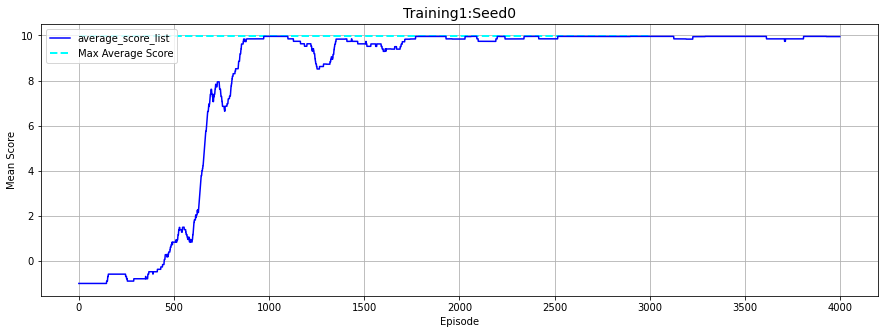

Episode 114	Average Score: -0.999994,	Average Step: 499.0Task solved in step: 412
Score: [9.175803]
Episode 131	Average Score: -0.898236,	Average Step: 498.13Task solved in step: 408
Score: [9.182004]
Episode 178	Average Score: -0.796416,	Average Step: 497.22Task solved in step: 471
Score: [9.0560055]
Episode 218	Average Score: -0.797614,	Average Step: 497.81Task solved in step: 135
Score: [9.7288]
Episode 229	Average Score: -0.690326,	Average Step: 494.17Task solved in step: 98
Score: [9.8022]
Episode 241	Average Score: -0.684124,	Average Step: 491.07Task solved in step: 335
Score: [9.329802]
Episode 244	Average Score: -0.580826,	Average Step: 489.43Task solved in step: 368
Score: [9.262203]
Episode 265	Average Score: -0.478204,	Average Step: 488.12Task solved in step: 273
Score: [9.4526]
Episode 267	Average Score: -0.373678,	Average Step: 485.86Task solved in step: 410
Score: [9.179403]
Episode 272	Average Score: -0.271884,	Average Step: 484.97Task solved in step: 183
Score: [9.6326]

Episode 383	Average Score: 6.443496,	Average Step: 227.58Task solved in step: 34
Score: [9.931601]
Episode 384	Average Score: 6.445092,	Average Step: 226.79Task solved in step: 69
Score: [9.8612]
Episode 386	Average Score: 6.553704,	Average Step: 222.49Task solved in step: 23
Score: [9.952]
Episode 387	Average Score: 6.554936,	Average Step: 221.87Task solved in step: 28
Score: [9.9434]
Episode 388	Average Score: 6.562480,	Average Step: 218.1Task solved in step: 28
Score: [9.9426]
Episode 389	Average Score: 6.565480,	Average Step: 216.6Task solved in step: 141
Score: [9.7174]
Episode 390	Average Score: 6.672655,	Average Step: 213.02Task solved in step: 48
Score: [9.9034]
Episode 391	Average Score: 6.678824,	Average Step: 209.94Task solved in step: 24
Score: [9.9516]
Episode 392	Average Score: 6.788340,	Average Step: 205.19Task solved in step: 62
Score: [9.874001]
Episode 393	Average Score: 6.897080,	Average Step: 200.82Task solved in step: 25
Score: [9.948]
Episode 394	Average Score: 7.

Episode 583	Average Score: 9.512548,	Average Step: 43.02Task solved in step: 27
Score: [9.9452]
Episode 584	Average Score: 9.512532,	Average Step: 43.03Task solved in step: 21
Score: [9.956]
Episode 585	Average Score: 9.512572,	Average Step: 43.01Task solved in step: 21
Score: [9.956]
Episode 586	Average Score: 9.512683,	Average Step: 42.95Task solved in step: 30
Score: [9.938]
Episode 587	Average Score: 9.512660,	Average Step: 42.96Task solved in step: 21
Score: [9.956]
Episode 588	Average Score: 9.512672,	Average Step: 42.95Task solved in step: 21
Score: [9.956]
Episode 589	Average Score: 9.512784,	Average Step: 42.89Task solved in step: 21
Score: [9.956]
Episode 590	Average Score: 9.512784,	Average Step: 42.89Task solved in step: 21
Score: [9.956]
Episode 591	Average Score: 9.512769,	Average Step: 42.89Task solved in step: 21
Score: [9.956]
Episode 592	Average Score: 9.512806,	Average Step: 42.87Task solved in step: 374
Score: [9.250402]
Episode 593	Average Score: 9.505791,	Average 

Episode 755	Average Score: 9.846784,	Average Step: 26.11Task solved in step: 21
Score: [9.956]
Episode 756	Average Score: 9.846752,	Average Step: 26.12Task solved in step: 20
Score: [9.9592]
Episode 757	Average Score: 9.846834,	Average Step: 26.08Task solved in step: 20
Score: [9.9592]
Episode 758	Average Score: 9.846834,	Average Step: 26.08Task solved in step: 20
Score: [9.9592]
Episode 759	Average Score: 9.846920,	Average Step: 26.04Task solved in step: 20
Score: [9.9592]
Episode 760	Average Score: 9.847067,	Average Step: 25.97Task solved in step: 20
Score: [9.9592]
Episode 761	Average Score: 9.847067,	Average Step: 25.97Task solved in step: 20
Score: [9.9592]
Episode 762	Average Score: 9.847118,	Average Step: 25.95Task solved in step: 23
Score: [9.9536]
Episode 763	Average Score: 9.847062,	Average Step: 25.98Task solved in step: 25
Score: [9.948999]
Episode 764	Average Score: 9.846959,	Average Step: 26.03Task solved in step: 23
Score: [9.9536]
Episode 765	Average Score: 9.847006,	Av

Episode 841	Average Score: 9.957614,	Average Step: 20.77Task solved in step: 20
Score: [9.9592]
Episode 842	Average Score: 9.957614,	Average Step: 20.77Task solved in step: 20
Score: [9.9592]
Episode 843	Average Score: 9.957646,	Average Step: 20.76Task solved in step: 21
Score: [9.957601]
Episode 844	Average Score: 9.957630,	Average Step: 20.77Task solved in step: 21
Score: [9.957601]
Episode 845	Average Score: 9.957610,	Average Step: 20.78Task solved in step: 21
Score: [9.957601]
Episode 846	Average Score: 9.957593,	Average Step: 20.79Task solved in step: 20
Score: [9.9596]
Episode 847	Average Score: 9.957629,	Average Step: 20.78Task solved in step: 20
Score: [9.9592]
Episode 848	Average Score: 9.957684,	Average Step: 20.75Task solved in step: 20
Score: [9.9592]
Episode 849	Average Score: 9.957684,	Average Step: 20.75Task solved in step: 21
Score: [9.9568]
Episode 850	Average Score: 9.957660,	Average Step: 20.76Task solved in step: 20
Score: [9.9592]
Episode 851	Average Score: 9.95771

Episode 928	Average Score: 9.848101,	Average Step: 25.57Task solved in step: 21
Score: [9.957601]
Episode 929	Average Score: 9.848084,	Average Step: 25.58Task solved in step: 20
Score: [9.9592]
Episode 930	Average Score: 9.848084,	Average Step: 25.58Task solved in step: 20
Score: [9.9592]
Episode 931	Average Score: 9.848084,	Average Step: 25.58Task solved in step: 21
Score: [9.957]
Episode 932	Average Score: 9.848062,	Average Step: 25.59Task solved in step: 20
Score: [9.9592]
Episode 933	Average Score: 9.848063,	Average Step: 25.59Task solved in step: 24
Score: [9.951799]
Episode 934	Average Score: 9.848046,	Average Step: 25.6Task solved in step: 21
Score: [9.957601]
Episode 935	Average Score: 9.848071,	Average Step: 25.59Task solved in step: 21
Score: [9.957601]
Episode 936	Average Score: 9.848056,	Average Step: 25.6Task solved in step: 21
Score: [9.957601]
Episode 937	Average Score: 9.848055,	Average Step: 25.6Task solved in step: 21
Score: [9.957601]
Episode 938	Average Score: 9.848

Episode 1096	Average Score: 9.958198,	Average Step: 20.53Task solved in step: 20
Score: [9.9592]
Episode 1097	Average Score: 9.958214,	Average Step: 20.52Task solved in step: 21
Score: [9.957601]
Episode 1098	Average Score: 9.958271,	Average Step: 20.49Task solved in step: 20
Score: [9.9592]
Episode 1099	Average Score: 9.958271,	Average Step: 20.49Task solved in step: 20
Score: [9.9592]
Episode 1100	Average Score: 9.958299,	Average Step: 20.48Task solved in step: 21
Score: [9.9564]
Episode 1101	Average Score: 9.958270,	Average Step: 20.49Task solved in step: 29
Score: [9.941]
Episode 1102	Average Score: 9.958088,	Average Step: 20.58Task solved in step: 22
Score: [9.9552]
Episode 1103	Average Score: 9.958048,	Average Step: 20.6Task solved in step: 21
Score: [9.957601]
Episode 1104	Average Score: 9.958031,	Average Step: 20.61Task solved in step: 20
Score: [9.9592]
Episode 1105	Average Score: 9.958031,	Average Step: 20.61Task solved in step: 20
Score: [9.9592]
Episode 1106	Average Score: 

Episode 1181	Average Score: 9.957831,	Average Step: 20.68Task solved in step: 20
Score: [9.9592]
Episode 1182	Average Score: 9.957850,	Average Step: 20.67Task solved in step: 20
Score: [9.9592]
Episode 1183	Average Score: 9.957848,	Average Step: 20.67Task solved in step: 20
Score: [9.9592]
Episode 1184	Average Score: 9.957850,	Average Step: 20.67Task solved in step: 20
Score: [9.9592]
Episode 1185	Average Score: 9.957848,	Average Step: 20.67Task solved in step: 20
Score: [9.9592]
Episode 1186	Average Score: 9.957850,	Average Step: 20.67Task solved in step: 20
Score: [9.9592]
Episode 1187	Average Score: 9.957848,	Average Step: 20.67Task solved in step: 20
Score: [9.9592]
Episode 1188	Average Score: 9.957850,	Average Step: 20.67Task solved in step: 20
Score: [9.9592]
Episode 1189	Average Score: 9.957848,	Average Step: 20.67Task solved in step: 20
Score: [9.9592]
Episode 1190	Average Score: 9.957865,	Average Step: 20.66Task solved in step: 21
Score: [9.9564]
Episode 1191	Average Score: 9.

Episode 1350	Average Score: 9.957477,	Average Step: 20.89Task solved in step: 21
Score: [9.957601]
Episode 1351	Average Score: 9.957477,	Average Step: 20.89Task solved in step: 21
Score: [9.957601]
Episode 1352	Average Score: 9.957459,	Average Step: 20.9Task solved in step: 21
Score: [9.957601]
Episode 1353	Average Score: 9.957459,	Average Step: 20.9Task solved in step: 21
Score: [9.957601]
Episode 1354	Average Score: 9.957444,	Average Step: 20.91Task solved in step: 21
Score: [9.957601]
Episode 1355	Average Score: 9.957428,	Average Step: 20.92Task solved in step: 20
Score: [9.9592]
Episode 1356	Average Score: 9.957429,	Average Step: 20.92Task solved in step: 20
Score: [9.9592]
Episode 1357	Average Score: 9.957429,	Average Step: 20.92Task solved in step: 20
Score: [9.9592]
Episode 1358	Average Score: 9.957429,	Average Step: 20.92Task solved in step: 20
Score: [9.9592]
Episode 1359	Average Score: 9.957431,	Average Step: 20.92Task solved in step: 20
Score: [9.9592]
Episode 1360	Average S

Episode 1434	Average Score: 9.957815,	Average Step: 20.75Task solved in step: 20
Score: [9.9592]
Episode 1435	Average Score: 9.957831,	Average Step: 20.74Task solved in step: 21
Score: [9.957601]
Episode 1436	Average Score: 9.957844,	Average Step: 20.74Task solved in step: 20
Score: [9.9592]
Episode 1437	Average Score: 9.957920,	Average Step: 20.7Task solved in step: 21
Score: [9.957601]
Episode 1438	Average Score: 9.957920,	Average Step: 20.7Task solved in step: 21
Score: [9.957601]
Episode 1439	Average Score: 9.957944,	Average Step: 20.69Task solved in step: 22
Score: [9.9546]
Episode 1440	Average Score: 9.957913,	Average Step: 20.7Task solved in step: 20
Score: [9.9592]
Episode 1441	Average Score: 9.957913,	Average Step: 20.7Task solved in step: 20
Score: [9.9592]
Episode 1442	Average Score: 9.957973,	Average Step: 20.67Task solved in step: 20
Score: [9.9592]
Episode 1443	Average Score: 9.957973,	Average Step: 20.67Task solved in step: 20
Score: [9.9592]
Episode 1444	Average Score: 

Episode 1519	Average Score: 9.954853,	Average Step: 22.21Task solved in step: 21
Score: [9.957601]
Episode 1520	Average Score: 9.954853,	Average Step: 22.21Task solved in step: 23
Score: [9.9536]
Episode 1521	Average Score: 9.954814,	Average Step: 22.23Task solved in step: 20
Score: [9.9592]
Episode 1522	Average Score: 9.954830,	Average Step: 22.22Task solved in step: 22
Score: [9.9546]
Episode 1523	Average Score: 9.954861,	Average Step: 22.2Task solved in step: 22
Score: [9.9546]
Episode 1524	Average Score: 9.954830,	Average Step: 22.21Task solved in step: 22
Score: [9.9546]
Episode 1525	Average Score: 9.954800,	Average Step: 22.22Task solved in step: 20
Score: [9.9592]
Episode 1526	Average Score: 9.954800,	Average Step: 22.22Task solved in step: 21
Score: [9.957601]
Episode 1527	Average Score: 9.954784,	Average Step: 22.23Task solved in step: 21
Score: [9.957601]
Episode 1528	Average Score: 9.954800,	Average Step: 22.23Task solved in step: 21
Score: [9.957601]
Episode 1529	Average Sc

Episode 1604	Average Score: 9.957569,	Average Step: 20.82Task solved in step: 20
Score: [9.9592]
Episode 1605	Average Score: 9.957571,	Average Step: 20.82Task solved in step: 20
Score: [9.9592]
Episode 1606	Average Score: 9.957571,	Average Step: 20.82Task solved in step: 21
Score: [9.9572]
Episode 1607	Average Score: 9.957550,	Average Step: 20.83Task solved in step: 20
Score: [9.9592]
Episode 1608	Average Score: 9.957566,	Average Step: 20.82Task solved in step: 20
Score: [9.9592]
Episode 1609	Average Score: 9.957640,	Average Step: 20.78Task solved in step: 23
Score: [9.9534]
Episode 1610	Average Score: 9.957599,	Average Step: 20.8Task solved in step: 20
Score: [9.9592]
Episode 1611	Average Score: 9.957614,	Average Step: 20.79Task solved in step: 20
Score: [9.9592]
Episode 1612	Average Score: 9.957630,	Average Step: 20.78Task solved in step: 20
Score: [9.9592]
Episode 1613	Average Score: 9.957646,	Average Step: 20.77Task solved in step: 22
Score: [9.955601]
Episode 1614	Average Score: 9

Episode 1689	Average Score: 9.956788,	Average Step: 21.23Task solved in step: 20
Score: [9.9592]
Episode 1690	Average Score: 9.956789,	Average Step: 21.23Task solved in step: 20
Score: [9.9592]
Episode 1691	Average Score: 9.956790,	Average Step: 21.23Task solved in step: 20
Score: [9.9592]
Episode 1692	Average Score: 9.956790,	Average Step: 21.23Task solved in step: 21
Score: [9.957601]
Episode 1693	Average Score: 9.956773,	Average Step: 21.24Task solved in step: 20
Score: [9.9592]
Episode 1694	Average Score: 9.956829,	Average Step: 21.21Task solved in step: 25
Score: [9.9496]
Episode 1695	Average Score: 9.956733,	Average Step: 21.26Task solved in step: 21
Score: [9.957601]
Episode 1696	Average Score: 9.956717,	Average Step: 21.27Task solved in step: 24
Score: [9.9516]
Episode 1697	Average Score: 9.956640,	Average Step: 21.31Task solved in step: 27
Score: [9.9446]
Episode 1698	Average Score: 9.956494,	Average Step: 21.38Task solved in step: 21
Score: [9.957601]
Episode 1699	Average Sco

Episode 1773	Average Score: 9.954835,	Average Step: 22.24Task solved in step: 29
Score: [9.940001]
Episode 1774	Average Score: 9.954642,	Average Step: 22.33Task solved in step: 21
Score: [9.9574]
Episode 1775	Average Score: 9.954624,	Average Step: 22.34Task solved in step: 20
Score: [9.9592]
Episode 1776	Average Score: 9.954625,	Average Step: 22.34Task solved in step: 21
Score: [9.957601]
Episode 1777	Average Score: 9.954675,	Average Step: 22.32Task solved in step: 21
Score: [9.957601]
Episode 1778	Average Score: 9.954674,	Average Step: 22.32Task solved in step: 24
Score: [9.9516]
Episode 1779	Average Score: 9.954615,	Average Step: 22.35Task solved in step: 21
Score: [9.956201]
Episode 1780	Average Score: 9.954600,	Average Step: 22.35Task solved in step: 21
Score: [9.957601]
Episode 1781	Average Score: 9.954584,	Average Step: 22.36Task solved in step: 22
Score: [9.9544]
Episode 1782	Average Score: 9.954553,	Average Step: 22.37Task solved in step: 21
Score: [9.957601]
Episode 1783	Avera

Episode 1857	Average Score: 9.952382,	Average Step: 23.48Task solved in step: 20
Score: [9.9592]
Episode 1858	Average Score: 9.952398,	Average Step: 23.47Task solved in step: 20
Score: [9.9592]
Episode 1859	Average Score: 9.952475,	Average Step: 23.43Task solved in step: 21
Score: [9.957601]
Episode 1860	Average Score: 9.952799,	Average Step: 23.27Task solved in step: 20
Score: [9.9592]
Episode 1861	Average Score: 9.952857,	Average Step: 23.24Task solved in step: 20
Score: [9.9592]
Episode 1862	Average Score: 9.952858,	Average Step: 23.24Task solved in step: 24
Score: [9.9516]
Episode 1863	Average Score: 9.952797,	Average Step: 23.27Task solved in step: 21
Score: [9.957601]
Episode 1864	Average Score: 9.952797,	Average Step: 23.27Task solved in step: 21
Score: [9.957601]
Episode 1865	Average Score: 9.952839,	Average Step: 23.25Task solved in step: 21
Score: [9.957601]
Episode 1866	Average Score: 9.952880,	Average Step: 23.23Task solved in step: 21
Score: [9.957601]
Episode 1867	Average

Episode 2024	Average Score: 9.956237,	Average Step: 21.57Task solved in step: 20
Score: [9.9592]
Episode 2025	Average Score: 9.956253,	Average Step: 21.56Task solved in step: 20
Score: [9.9592]
Episode 2026	Average Score: 9.956269,	Average Step: 21.55Task solved in step: 22
Score: [9.9546]
Episode 2027	Average Score: 9.956239,	Average Step: 21.56Task solved in step: 22
Score: [9.9552]
Episode 2028	Average Score: 9.956216,	Average Step: 21.57Task solved in step: 24
Score: [9.9516]
Episode 2029	Average Score: 9.956156,	Average Step: 21.6Task solved in step: 21
Score: [9.957601]
Episode 2030	Average Score: 9.956155,	Average Step: 21.6Task solved in step: 21
Score: [9.957601]
Episode 2031	Average Score: 9.956154,	Average Step: 21.6Task solved in step: 22
Score: [9.9546]
Episode 2032	Average Score: 9.956184,	Average Step: 21.58Task solved in step: 20
Score: [9.9592]
Episode 2033	Average Score: 9.956201,	Average Step: 21.57Task solved in step: 20
Score: [9.9592]
Episode 2034	Average Score: 9

Episode 2108	Average Score: 9.950968,	Average Step: 24.13Task solved in step: 42
Score: [9.9154005]
Episode 2109	Average Score: 9.950545,	Average Step: 24.34Task solved in step: 27
Score: [9.9456005]
Episode 2110	Average Score: 9.950425,	Average Step: 24.4Task solved in step: 20
Score: [9.9592]
Episode 2111	Average Score: 9.950441,	Average Step: 24.39Task solved in step: 20
Score: [9.9592]
Episode 2112	Average Score: 9.950458,	Average Step: 24.38Task solved in step: 20
Score: [9.9592]
Episode 2113	Average Score: 9.950473,	Average Step: 24.37Task solved in step: 20
Score: [9.9592]
Episode 2114	Average Score: 9.950587,	Average Step: 24.31Task solved in step: 20
Score: [9.9592]
Episode 2115	Average Score: 9.950752,	Average Step: 24.23Task solved in step: 20
Score: [9.9592]
Episode 2116	Average Score: 9.950781,	Average Step: 24.22Task solved in step: 20
Score: [9.9592]
Episode 2117	Average Score: 9.950797,	Average Step: 24.21Task solved in step: 20
Score: [9.9592]
Episode 2118	Average Scor

Episode 2193	Average Score: 9.954130,	Average Step: 22.54Task solved in step: 20
Score: [9.9592]
Episode 2194	Average Score: 9.954210,	Average Step: 22.5Task solved in step: 20
Score: [9.9592]
Episode 2195	Average Score: 9.954226,	Average Step: 22.49Task solved in step: 20
Score: [9.9592]
Episode 2196	Average Score: 9.954242,	Average Step: 22.48Task solved in step: 20
Score: [9.9592]
Episode 2197	Average Score: 9.954242,	Average Step: 22.48Task solved in step: 23
Score: [9.9536]
Episode 2198	Average Score: 9.954185,	Average Step: 22.51Task solved in step: 20
Score: [9.9592]
Episode 2199	Average Score: 9.954202,	Average Step: 22.5Task solved in step: 20
Score: [9.9592]
Episode 2200	Average Score: 9.954202,	Average Step: 22.5Task solved in step: 20
Score: [9.9592]
Episode 2201	Average Score: 9.954203,	Average Step: 22.5Task solved in step: 20
Score: [9.9592]
Episode 2202	Average Score: 9.954262,	Average Step: 22.47Task solved in step: 20
Score: [9.9592]
Episode 2203	Average Score: 9.9542

Episode 2362	Average Score: 9.958151,	Average Step: 20.51Task solved in step: 28
Score: [9.943]
Episode 2363	Average Score: 9.957989,	Average Step: 20.59Task solved in step: 20
Score: [9.9592]
Episode 2364	Average Score: 9.957989,	Average Step: 20.59Task solved in step: 20
Score: [9.9592]
Episode 2365	Average Score: 9.957989,	Average Step: 20.59Task solved in step: 20
Score: [9.9592]
Episode 2366	Average Score: 9.958080,	Average Step: 20.55Task solved in step: 20
Score: [9.9592]
Episode 2367	Average Score: 9.958080,	Average Step: 20.55Task solved in step: 20
Score: [9.9592]
Episode 2368	Average Score: 9.958080,	Average Step: 20.55Task solved in step: 20
Score: [9.9592]
Episode 2369	Average Score: 9.958080,	Average Step: 20.55Task solved in step: 20
Score: [9.9592]
Episode 2370	Average Score: 9.958097,	Average Step: 20.54Task solved in step: 20
Score: [9.9592]
Episode 2371	Average Score: 9.958188,	Average Step: 20.5Task solved in step: 43
Score: [9.9128]
Episode 2372	Average Score: 9.95

Episode 2531	Average Score: 9.958278,	Average Step: 20.43Task solved in step: 20
Score: [9.9592]
Episode 2532	Average Score: 9.958279,	Average Step: 20.43Task solved in step: 20
Score: [9.9592]
Episode 2533	Average Score: 9.958278,	Average Step: 20.43Task solved in step: 20
Score: [9.9592]
Episode 2534	Average Score: 9.958357,	Average Step: 20.39Task solved in step: 20
Score: [9.9592]
Episode 2535	Average Score: 9.958356,	Average Step: 20.39Task solved in step: 20
Score: [9.9592]
Episode 2536	Average Score: 9.958410,	Average Step: 20.36Task solved in step: 20
Score: [9.9592]
Episode 2537	Average Score: 9.958410,	Average Step: 20.36Task solved in step: 20
Score: [9.9592]
Episode 2538	Average Score: 9.958410,	Average Step: 20.36Task solved in step: 20
Score: [9.9592]
Episode 2539	Average Score: 9.958456,	Average Step: 20.34Task solved in step: 20
Score: [9.9592]
Episode 2540	Average Score: 9.958456,	Average Step: 20.34Task solved in step: 20
Score: [9.9592]
Episode 2541	Average Score: 9.

Episode 2616	Average Score: 9.957312,	Average Step: 20.92Task solved in step: 23
Score: [9.9534]
Episode 2617	Average Score: 9.957253,	Average Step: 20.95Task solved in step: 20
Score: [9.9592]
Episode 2618	Average Score: 9.957256,	Average Step: 20.95Task solved in step: 21
Score: [9.9564]
Episode 2619	Average Score: 9.957228,	Average Step: 20.96Task solved in step: 20
Score: [9.9592]
Episode 2620	Average Score: 9.957228,	Average Step: 20.96Task solved in step: 31
Score: [9.9366]
Episode 2621	Average Score: 9.957002,	Average Step: 21.07Task solved in step: 20
Score: [9.9592]
Episode 2622	Average Score: 9.957003,	Average Step: 21.07Task solved in step: 20
Score: [9.9592]
Episode 2623	Average Score: 9.957003,	Average Step: 21.07Task solved in step: 20
Score: [9.9592]
Episode 2624	Average Score: 9.957003,	Average Step: 21.07Task solved in step: 20
Score: [9.9592]
Episode 2625	Average Score: 9.957048,	Average Step: 21.05Task solved in step: 20
Score: [9.9592]
Episode 2626	Average Score: 9.

Episode 2701	Average Score: 9.955674,	Average Step: 21.75Task solved in step: 21
Score: [9.956201]
Episode 2702	Average Score: 9.955659,	Average Step: 21.75Task solved in step: 21
Score: [9.957601]
Episode 2703	Average Score: 9.955747,	Average Step: 21.71Task solved in step: 21
Score: [9.957601]
Episode 2704	Average Score: 9.955730,	Average Step: 21.72Task solved in step: 31
Score: [9.9372]
Episode 2705	Average Score: 9.955511,	Average Step: 21.83Task solved in step: 23
Score: [9.9534]
Episode 2706	Average Score: 9.955453,	Average Step: 21.86Task solved in step: 23
Score: [9.9534]
Episode 2707	Average Score: 9.955603,	Average Step: 21.79Task solved in step: 21
Score: [9.957601]
Episode 2708	Average Score: 9.955586,	Average Step: 21.8Task solved in step: 21
Score: [9.957601]
Episode 2709	Average Score: 9.955571,	Average Step: 21.81Task solved in step: 20
Score: [9.9592]
Episode 2710	Average Score: 9.955571,	Average Step: 21.81Task solved in step: 28
Score: [9.942]
Episode 2711	Average S

Episode 2870	Average Score: 9.956174,	Average Step: 21.5Task solved in step: 20
Score: [9.9592]
Episode 2871	Average Score: 9.956174,	Average Step: 21.5Task solved in step: 20
Score: [9.9592]
Episode 2872	Average Score: 9.956261,	Average Step: 21.46Task solved in step: 21
Score: [9.957601]
Episode 2873	Average Score: 9.956244,	Average Step: 21.47Task solved in step: 22
Score: [9.954201]
Episode 2874	Average Score: 9.956250,	Average Step: 21.46Task solved in step: 20
Score: [9.9592]
Episode 2875	Average Score: 9.956250,	Average Step: 21.46Task solved in step: 20
Score: [9.9592]
Episode 2876	Average Score: 9.956250,	Average Step: 21.46Task solved in step: 20
Score: [9.9592]
Episode 2877	Average Score: 9.956277,	Average Step: 21.45Task solved in step: 20
Score: [9.9592]
Episode 2878	Average Score: 9.956311,	Average Step: 21.43Task solved in step: 20
Score: [9.9592]
Episode 2879	Average Score: 9.956311,	Average Step: 21.43Task solved in step: 21
Score: [9.9572]
Episode 2880	Average Score: 

Episode 3037	Average Score: 9.956244,	Average Step: 21.51Task solved in step: 20
Score: [9.9592]
Episode 3038	Average Score: 9.956244,	Average Step: 21.51Task solved in step: 26
Score: [9.9478]
Episode 3039	Average Score: 9.956128,	Average Step: 21.57Task solved in step: 27
Score: [9.9452]
Episode 3040	Average Score: 9.955988,	Average Step: 21.64Task solved in step: 21
Score: [9.957601]
Episode 3041	Average Score: 9.955973,	Average Step: 21.65Task solved in step: 29
Score: [9.940001]
Episode 3042	Average Score: 9.955796,	Average Step: 21.73Task solved in step: 23
Score: [9.9534]
Episode 3043	Average Score: 9.955737,	Average Step: 21.76Task solved in step: 20
Score: [9.9592]
Episode 3044	Average Score: 9.955737,	Average Step: 21.76Task solved in step: 20
Score: [9.9592]
Episode 3045	Average Score: 9.955738,	Average Step: 21.76Task solved in step: 20
Score: [9.9592]
Episode 3046	Average Score: 9.955738,	Average Step: 21.76Task solved in step: 22
Score: [9.954]
Episode 3047	Average Score:

Episode 3122	Average Score: 9.956457,	Average Step: 21.4Task solved in step: 21
Score: [9.957601]
Episode 3123	Average Score: 9.956442,	Average Step: 21.41Task solved in step: 21
Score: [9.957601]
Episode 3124	Average Score: 9.956525,	Average Step: 21.37Task solved in step: 21
Score: [9.957601]
Episode 3125	Average Score: 9.956568,	Average Step: 21.35Task solved in step: 21
Score: [9.957601]
Episode 3126	Average Score: 9.956568,	Average Step: 21.35Task solved in step: 21
Score: [9.957601]
Episode 3127	Average Score: 9.956592,	Average Step: 21.34Task solved in step: 20
Score: [9.9592]
Episode 3128	Average Score: 9.956592,	Average Step: 21.34Task solved in step: 20
Score: [9.9592]
Episode 3129	Average Score: 9.956609,	Average Step: 21.33Task solved in step: 24
Score: [9.9516]
Episode 3130	Average Score: 9.956562,	Average Step: 21.36Task solved in step: 21
Score: [9.957601]
Episode 3131	Average Score: 9.956563,	Average Step: 21.36Task solved in step: 31
Score: [9.936]
Episode 3132	Average

Episode 3207	Average Score: 9.846717,	Average Step: 26.27Task solved in step: 21
Score: [9.957601]
Episode 3208	Average Score: 9.846700,	Average Step: 26.28Task solved in step: 21
Score: [9.957601]
Episode 3209	Average Score: 9.846684,	Average Step: 26.29Task solved in step: 21
Score: [9.957601]
Episode 3210	Average Score: 9.846684,	Average Step: 26.29Task solved in step: 22
Score: [9.954801]
Episode 3211	Average Score: 9.846656,	Average Step: 26.3Task solved in step: 21
Score: [9.957601]
Episode 3212	Average Score: 9.846640,	Average Step: 26.31Task solved in step: 20
Score: [9.9592]
Episode 3213	Average Score: 9.846640,	Average Step: 26.31Task solved in step: 21
Score: [9.957601]
Episode 3214	Average Score: 9.846624,	Average Step: 26.32Task solved in step: 21
Score: [9.957601]
Episode 3215	Average Score: 9.846608,	Average Step: 26.33Task solved in step: 21
Score: [9.957601]
Episode 3216	Average Score: 9.846592,	Average Step: 26.34Task solved in step: 21
Score: [9.957601]
Episode 3217	

Episode 3292	Average Score: 9.956893,	Average Step: 21.18Task solved in step: 20
Score: [9.9592]
Episode 3293	Average Score: 9.956937,	Average Step: 21.16Task solved in step: 21
Score: [9.957601]
Episode 3294	Average Score: 9.956966,	Average Step: 21.15Task solved in step: 21
Score: [9.957601]
Episode 3295	Average Score: 9.956949,	Average Step: 21.16Task solved in step: 20
Score: [9.958]
Episode 3296	Average Score: 9.956954,	Average Step: 21.15Task solved in step: 21
Score: [9.956201]
Episode 3297	Average Score: 9.956969,	Average Step: 21.14Task solved in step: 20
Score: [9.9592]
Episode 3298	Average Score: 9.957047,	Average Step: 21.1Task solved in step: 22
Score: [9.9546]
Episode 3299	Average Score: 9.957031,	Average Step: 21.11Task solved in step: 31
Score: [9.9366]
Episode 3300	Average Score: 9.956987,	Average Step: 21.13Task solved in step: 21
Score: [9.957601]
Episode 3301	Average Score: 9.956987,	Average Step: 21.13Task solved in step: 21
Score: [9.957601]
Episode 3302	Average S

Episode 3461	Average Score: 9.957487,	Average Step: 20.84Task solved in step: 21
Score: [9.957601]
Episode 3462	Average Score: 9.957471,	Average Step: 20.85Task solved in step: 20
Score: [9.9592]
Episode 3463	Average Score: 9.957471,	Average Step: 20.85Task solved in step: 20
Score: [9.9592]
Episode 3464	Average Score: 9.957471,	Average Step: 20.85Task solved in step: 20
Score: [9.9592]
Episode 3465	Average Score: 9.957471,	Average Step: 20.85Task solved in step: 22
Score: [9.954201]
Episode 3466	Average Score: 9.957420,	Average Step: 20.87Task solved in step: 21
Score: [9.957601]
Episode 3467	Average Score: 9.957405,	Average Step: 20.88Task solved in step: 22
Score: [9.9552]
Episode 3468	Average Score: 9.957364,	Average Step: 20.9Task solved in step: 20
Score: [9.9592]
Episode 3469	Average Score: 9.957364,	Average Step: 20.9Task solved in step: 24
Score: [9.9508]
Episode 3470	Average Score: 9.957326,	Average Step: 20.92Task solved in step: 21
Score: [9.9572]
Episode 3471	Average Score

Episode 3546	Average Score: 9.954667,	Average Step: 22.2Task solved in step: 21
Score: [9.957601]
Episode 3547	Average Score: 9.954679,	Average Step: 22.2Task solved in step: 22
Score: [9.9546]
Episode 3548	Average Score: 9.954880,	Average Step: 22.1Task solved in step: 20
Score: [9.9592]
Episode 3549	Average Score: 9.954896,	Average Step: 22.09Task solved in step: 21
Score: [9.957601]
Episode 3550	Average Score: 9.954899,	Average Step: 22.09Task solved in step: 20
Score: [9.9592]
Episode 3551	Average Score: 9.954916,	Average Step: 22.08Task solved in step: 20
Score: [9.9592]
Episode 3552	Average Score: 9.954948,	Average Step: 22.07Task solved in step: 21
Score: [9.9564]
Episode 3553	Average Score: 9.954920,	Average Step: 22.08Task solved in step: 20
Score: [9.9592]
Episode 3554	Average Score: 9.954921,	Average Step: 22.08Task solved in step: 20
Score: [9.9592]
Episode 3555	Average Score: 9.954921,	Average Step: 22.08Task solved in step: 20
Score: [9.9592]
Episode 3556	Average Score: 9

Episode 3714	Average Score: 9.955990,	Average Step: 21.55Task solved in step: 22
Score: [9.954801]
Episode 3715	Average Score: 9.955974,	Average Step: 21.56Task solved in step: 20
Score: [9.9592]
Episode 3716	Average Score: 9.956001,	Average Step: 21.55Task solved in step: 20
Score: [9.9592]
Episode 3717	Average Score: 9.956042,	Average Step: 21.53Task solved in step: 23
Score: [9.9534]
Episode 3718	Average Score: 9.956072,	Average Step: 21.52Task solved in step: 23
Score: [9.9534]
Episode 3719	Average Score: 9.956030,	Average Step: 21.54Task solved in step: 31
Score: [9.9374]
Episode 3720	Average Score: 9.956496,	Average Step: 21.31Task solved in step: 21
Score: [9.9564]
Episode 3721	Average Score: 9.956537,	Average Step: 21.29Task solved in step: 23
Score: [9.9534]
Episode 3722	Average Score: 9.956479,	Average Step: 21.32Task solved in step: 20
Score: [9.9592]
Episode 3723	Average Score: 9.956496,	Average Step: 21.31Task solved in step: 21
Score: [9.9564]
Episode 3724	Average Score: 

Episode 3799	Average Score: 9.957146,	Average Step: 20.98Task solved in step: 20
Score: [9.9592]
Episode 3800	Average Score: 9.957174,	Average Step: 20.97Task solved in step: 22
Score: [9.9552]
Episode 3801	Average Score: 9.957134,	Average Step: 20.99Task solved in step: 21
Score: [9.9564]
Episode 3802	Average Score: 9.957226,	Average Step: 20.94Task solved in step: 20
Score: [9.9592]
Episode 3803	Average Score: 9.957254,	Average Step: 20.93Task solved in step: 20
Score: [9.9592]
Episode 3804	Average Score: 9.957282,	Average Step: 20.92Task solved in step: 23
Score: [9.9536]
Episode 3805	Average Score: 9.957254,	Average Step: 20.94Task solved in step: 20
Score: [9.9592]
Episode 3806	Average Score: 9.957283,	Average Step: 20.93Task solved in step: 22
Score: [9.954801]
Episode 3807	Average Score: 9.957266,	Average Step: 20.94Task solved in step: 21
Score: [9.957601]
Episode 3808	Average Score: 9.957250,	Average Step: 20.95Task solved in step: 21
Score: [9.957601]
Episode 3809	Average Sco

Episode 3884	Average Score: 9.957388,	Average Step: 20.92Task solved in step: 20
Score: [9.9592]
Episode 3885	Average Score: 9.957388,	Average Step: 20.92Task solved in step: 20
Score: [9.9592]
Episode 3886	Average Score: 9.957453,	Average Step: 20.89Task solved in step: 21
Score: [9.957601]
Episode 3887	Average Score: 9.957437,	Average Step: 20.9Task solved in step: 21
Score: [9.957601]
Episode 3888	Average Score: 9.957448,	Average Step: 20.9Task solved in step: 21
Score: [9.957601]
Episode 3889	Average Score: 9.957432,	Average Step: 20.91Task solved in step: 23
Score: [9.9534]
Episode 3890	Average Score: 9.957373,	Average Step: 20.94Task solved in step: 20
Score: [9.9592]
Episode 3891	Average Score: 9.957390,	Average Step: 20.93Task solved in step: 20
Score: [9.9592]
Episode 3892	Average Score: 9.957478,	Average Step: 20.89Task solved in step: 20
Score: [9.9592]
Episode 3893	Average Score: 9.957479,	Average Step: 20.89Task solved in step: 20
Score: [9.9592]
Episode 3894	Average Score

Episode 3969	Average Score: 9.956788,	Average Step: 21.23Task solved in step: 20
Score: [9.9592]
Episode 3970	Average Score: 9.956788,	Average Step: 21.23Task solved in step: 20
Score: [9.9592]
Episode 3971	Average Score: 9.956788,	Average Step: 21.23Task solved in step: 20
Score: [9.9592]
Episode 3972	Average Score: 9.956789,	Average Step: 21.23Task solved in step: 20
Score: [9.9592]
Episode 3973	Average Score: 9.956789,	Average Step: 21.23Task solved in step: 20
Score: [9.9592]
Episode 3974	Average Score: 9.956789,	Average Step: 21.23Task solved in step: 20
Score: [9.9592]
Episode 3975	Average Score: 9.956790,	Average Step: 21.23Task solved in step: 21
Score: [9.957601]
Episode 3976	Average Score: 9.956801,	Average Step: 21.23Task solved in step: 23
Score: [9.9522]
Episode 3977	Average Score: 9.956746,	Average Step: 21.25Task solved in step: 20
Score: [9.9592]
Episode 3978	Average Score: 9.956762,	Average Step: 21.24Task solved in step: 22
Score: [9.9544]
Episode 3979	Average Score: 

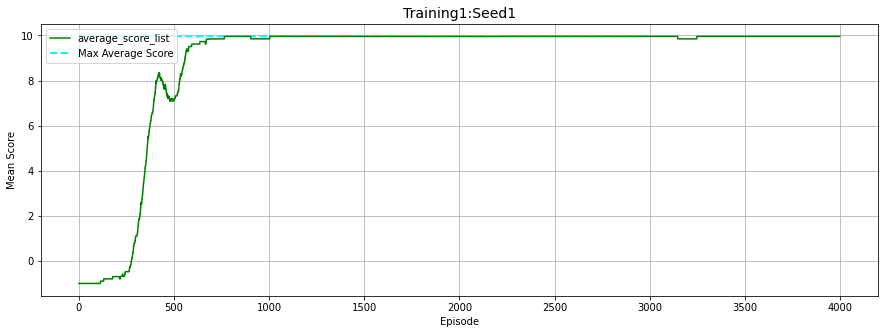

Episode 92	Average Score: -0.999994,	Average Step: 499.0Task solved in step: 257
Score: [9.484399]
Episode 118	Average Score: -0.895150,	Average Step: 496.5855555555554Task solved in step: 318
Score: [9.362202]
Episode 126	Average Score: -0.791528,	Average Step: 494.77Task solved in step: 206
Score: [9.587799]
Episode 127	Average Score: -0.685650,	Average Step: 491.84Task solved in step: 238
Score: [9.522399]
Episode 134	Average Score: -0.580426,	Average Step: 489.23Task solved in step: 430
Score: [9.139404]
Episode 136	Average Score: -0.479032,	Average Step: 488.54Task solved in step: 364
Score: [9.271802]
Episode 140	Average Score: -0.376314,	Average Step: 487.19Task solved in step: 250
Score: [9.498199]
Episode 145	Average Score: -0.271333,	Average Step: 484.7Task solved in step: 274
Score: [9.451799]
Episode 149	Average Score: -0.166815,	Average Step: 482.45Task solved in step: 264
Score: [9.47]
Episode 157	Average Score: -0.062115,	Average Step: 480.1Task solved in step: 286
Score

Episode 389	Average Score: 9.265138,	Average Step: 66.89Task solved in step: 57
Score: [9.8856]
Episode 390	Average Score: 9.268360,	Average Step: 65.28Task solved in step: 31
Score: [9.936999]
Episode 391	Average Score: 9.377730,	Average Step: 60.6Task solved in step: 31
Score: [9.9376]
Episode 392	Average Score: 9.487106,	Average Step: 55.92Task solved in step: 29
Score: [9.941]
Episode 393	Average Score: 9.596516,	Average Step: 51.22Task solved in step: 38
Score: [9.922999]
Episode 394	Average Score: 9.705746,	Average Step: 46.61Task solved in step: 28
Score: [9.9428005]
Episode 395	Average Score: 9.710708,	Average Step: 44.13Task solved in step: 131
Score: [9.7372]
Episode 396	Average Score: 9.818079,	Average Step: 40.45Task solved in step: 26
Score: [9.9468]
Episode 397	Average Score: 9.818449,	Average Step: 40.26Task solved in step: 25
Score: [9.9488]
Episode 398	Average Score: 9.818679,	Average Step: 40.14Task solved in step: 23
Score: [9.9534]
Episode 399	Average Score: 9.92821

Episode 560	Average Score: 9.843841,	Average Step: 27.57Task solved in step: 23
Score: [9.9538]
Episode 561	Average Score: 9.843844,	Average Step: 27.57Task solved in step: 20
Score: [9.959]
Episode 562	Average Score: 9.844122,	Average Step: 27.43Task solved in step: 22
Score: [9.954801]
Episode 563	Average Score: 9.844098,	Average Step: 27.44Task solved in step: 21
Score: [9.956201]
Episode 564	Average Score: 9.844174,	Average Step: 27.4Task solved in step: 25
Score: [9.9496]
Episode 565	Average Score: 9.844172,	Average Step: 27.41Task solved in step: 23
Score: [9.9534]
Episode 566	Average Score: 9.844159,	Average Step: 27.42Task solved in step: 26
Score: [9.9462]
Episode 567	Average Score: 9.844075,	Average Step: 27.46Task solved in step: 22
Score: [9.9558]
Episode 568	Average Score: 9.844074,	Average Step: 27.47Task solved in step: 21
Score: [9.9572]
Episode 569	Average Score: 9.844054,	Average Step: 27.48Task solved in step: 23
Score: [9.9534]
Episode 570	Average Score: 9.844054,	A

Episode 731	Average Score: 9.952756,	Average Step: 23.19Task solved in step: 22
Score: [9.9558]
Episode 732	Average Score: 9.952747,	Average Step: 23.2Task solved in step: 21
Score: [9.956201]
Episode 733	Average Score: 9.952717,	Average Step: 23.21Task solved in step: 21
Score: [9.9572]
Episode 734	Average Score: 9.952727,	Average Step: 23.21Task solved in step: 24
Score: [9.9508]
Episode 735	Average Score: 9.952643,	Average Step: 23.25Task solved in step: 21
Score: [9.9572]
Episode 736	Average Score: 9.952623,	Average Step: 23.26Task solved in step: 23
Score: [9.952]
Episode 737	Average Score: 9.952552,	Average Step: 23.29Task solved in step: 20
Score: [9.9592]
Episode 738	Average Score: 9.952610,	Average Step: 23.26Task solved in step: 20
Score: [9.9592]
Episode 739	Average Score: 9.952652,	Average Step: 23.24Task solved in step: 20
Score: [9.9592]
Episode 740	Average Score: 9.952653,	Average Step: 23.24Task solved in step: 23
Score: [9.952801]
Episode 741	Average Score: 9.952588,	A

Episode 903	Average Score: 9.848458,	Average Step: 25.36Task solved in step: 20
Score: [9.9592]
Episode 904	Average Score: 9.848458,	Average Step: 25.36Task solved in step: 20
Score: [9.9592]
Episode 905	Average Score: 9.848458,	Average Step: 25.36Task solved in step: 20
Score: [9.9592]
Episode 906	Average Score: 9.958051,	Average Step: 20.57Task solved in step: 20
Score: [9.9592]
Episode 907	Average Score: 9.958051,	Average Step: 20.57Task solved in step: 20
Score: [9.9592]
Episode 908	Average Score: 9.958051,	Average Step: 20.57Task solved in step: 25
Score: [9.9482]
Episode 909	Average Score: 9.957940,	Average Step: 20.62Task solved in step: 20
Score: [9.9592]
Episode 910	Average Score: 9.957997,	Average Step: 20.59Task solved in step: 20
Score: [9.9592]
Episode 911	Average Score: 9.957997,	Average Step: 20.59Task solved in step: 20
Score: [9.9592]
Episode 912	Average Score: 9.957997,	Average Step: 20.59Task solved in step: 20
Score: [9.9592]
Episode 913	Average Score: 9.958055,	Ave

Episode 1073	Average Score: 9.958634,	Average Step: 20.25Task solved in step: 20
Score: [9.9592]
Episode 1074	Average Score: 9.958634,	Average Step: 20.25Task solved in step: 20
Score: [9.9592]
Episode 1075	Average Score: 9.958634,	Average Step: 20.25Task solved in step: 20
Score: [9.9592]
Episode 1076	Average Score: 9.958634,	Average Step: 20.25Task solved in step: 20
Score: [9.9592]
Episode 1077	Average Score: 9.958634,	Average Step: 20.25Task solved in step: 20
Score: [9.9592]
Episode 1078	Average Score: 9.958684,	Average Step: 20.23Task solved in step: 20
Score: [9.9592]
Episode 1079	Average Score: 9.958684,	Average Step: 20.23Task solved in step: 20
Score: [9.9592]
Episode 1080	Average Score: 9.958684,	Average Step: 20.23Task solved in step: 20
Score: [9.9592]
Episode 1081	Average Score: 9.958724,	Average Step: 20.21Task solved in step: 20
Score: [9.9588]
Episode 1082	Average Score: 9.958720,	Average Step: 20.21Task solved in step: 24
Score: [9.9506]
Episode 1083	Average Score: 9.

Episode 1158	Average Score: 9.958794,	Average Step: 20.19Task solved in step: 20
Score: [9.9592]
Episode 1159	Average Score: 9.958835,	Average Step: 20.17Task solved in step: 20
Score: [9.9592]
Episode 1160	Average Score: 9.958835,	Average Step: 20.17Task solved in step: 20
Score: [9.9592]
Episode 1161	Average Score: 9.958835,	Average Step: 20.17Task solved in step: 20
Score: [9.9592]
Episode 1162	Average Score: 9.958835,	Average Step: 20.17Task solved in step: 20
Score: [9.9592]
Episode 1163	Average Score: 9.958835,	Average Step: 20.17Task solved in step: 20
Score: [9.9592]
Episode 1164	Average Score: 9.958835,	Average Step: 20.17Task solved in step: 22
Score: [9.9558]
Episode 1165	Average Score: 9.958800,	Average Step: 20.19Task solved in step: 20
Score: [9.9592]
Episode 1166	Average Score: 9.958800,	Average Step: 20.19Task solved in step: 20
Score: [9.9592]
Episode 1167	Average Score: 9.958800,	Average Step: 20.19Task solved in step: 20
Score: [9.9592]
Episode 1168	Average Score: 9.

Episode 1243	Average Score: 9.958624,	Average Step: 20.27Task solved in step: 20
Score: [9.9592]
Episode 1244	Average Score: 9.958624,	Average Step: 20.27Task solved in step: 20
Score: [9.9592]
Episode 1245	Average Score: 9.958673,	Average Step: 20.25Task solved in step: 20
Score: [9.9592]
Episode 1246	Average Score: 9.958674,	Average Step: 20.25Task solved in step: 20
Score: [9.9592]
Episode 1247	Average Score: 9.958674,	Average Step: 20.25Task solved in step: 20
Score: [9.9592]
Episode 1248	Average Score: 9.958673,	Average Step: 20.25Task solved in step: 20
Score: [9.9592]
Episode 1249	Average Score: 9.958674,	Average Step: 20.25Task solved in step: 23
Score: [9.9534]
Episode 1250	Average Score: 9.958615,	Average Step: 20.28Task solved in step: 20
Score: [9.9592]
Episode 1251	Average Score: 9.958615,	Average Step: 20.28Task solved in step: 20
Score: [9.959]
Episode 1252	Average Score: 9.958613,	Average Step: 20.28Task solved in step: 20
Score: [9.9592]
Episode 1253	Average Score: 9.9

Episode 1415	Average Score: 9.739212,	Average Step: 29.97Task solved in step: 20
Score: [9.9592]
Episode 1416	Average Score: 9.739212,	Average Step: 29.97Task solved in step: 23
Score: [9.9534]
Episode 1417	Average Score: 9.739154,	Average Step: 30.0Task solved in step: 20
Score: [9.9592]
Episode 1418	Average Score: 9.739154,	Average Step: 30.0Task solved in step: 20
Score: [9.9592]
Episode 1419	Average Score: 9.739211,	Average Step: 29.97Task solved in step: 20
Score: [9.9592]
Episode 1420	Average Score: 9.739211,	Average Step: 29.97Task solved in step: 28
Score: [9.9428005]
Episode 1421	Average Score: 9.739062,	Average Step: 30.04Task solved in step: 20
Score: [9.9592]
Episode 1422	Average Score: 9.739062,	Average Step: 30.04Task solved in step: 20
Score: [9.9592]
Episode 1423	Average Score: 9.739062,	Average Step: 30.04Task solved in step: 20
Score: [9.9592]
Episode 1424	Average Score: 9.739062,	Average Step: 30.04Task solved in step: 20
Score: [9.9592]
Episode 1425	Average Score: 9

Episode 1584	Average Score: 9.952778,	Average Step: 23.19Task solved in step: 20
Score: [9.9592]
Episode 1585	Average Score: 9.952799,	Average Step: 23.18Task solved in step: 20
Score: [9.9592]
Episode 1586	Average Score: 9.952826,	Average Step: 23.17Task solved in step: 20
Score: [9.9592]
Episode 1587	Average Score: 9.952826,	Average Step: 23.17Task solved in step: 20
Score: [9.9592]
Episode 1588	Average Score: 9.952826,	Average Step: 23.17Task solved in step: 20
Score: [9.9592]
Episode 1589	Average Score: 9.952826,	Average Step: 23.17Task solved in step: 20
Score: [9.9592]
Episode 1590	Average Score: 9.952826,	Average Step: 23.17Task solved in step: 20
Score: [9.9592]
Episode 1591	Average Score: 9.952826,	Average Step: 23.17Task solved in step: 20
Score: [9.9592]
Episode 1592	Average Score: 9.952826,	Average Step: 23.17Task solved in step: 20
Score: [9.9592]
Episode 1593	Average Score: 9.952826,	Average Step: 23.17Task solved in step: 20
Score: [9.9592]
Episode 1594	Average Score: 9.

Episode 1753	Average Score: 9.951389,	Average Step: 23.83Task solved in step: 20
Score: [9.9592]
Episode 1754	Average Score: 9.951392,	Average Step: 23.83Task solved in step: 23
Score: [9.9534]
Episode 1755	Average Score: 9.951334,	Average Step: 23.86Task solved in step: 21
Score: [9.956201]
Episode 1756	Average Score: 9.951303,	Average Step: 23.87Task solved in step: 21
Score: [9.956201]
Episode 1757	Average Score: 9.951273,	Average Step: 23.88Task solved in step: 20
Score: [9.9592]
Episode 1758	Average Score: 9.951273,	Average Step: 23.88Task solved in step: 29
Score: [9.940801]
Episode 1759	Average Score: 9.951129,	Average Step: 23.95Task solved in step: 21
Score: [9.956201]
Episode 1760	Average Score: 9.951129,	Average Step: 23.95Task solved in step: 24
Score: [9.950399]
Episode 1761	Average Score: 9.951042,	Average Step: 23.99Task solved in step: 21
Score: [9.9564]
Episode 1762	Average Score: 9.951014,	Average Step: 24.0Task solved in step: 20
Score: [9.9592]
Episode 1763	Average 

Episode 1922	Average Score: 9.951520,	Average Step: 23.67Task solved in step: 20
Score: [9.9592]
Episode 1923	Average Score: 9.951550,	Average Step: 23.66Task solved in step: 22
Score: [9.954801]
Episode 1924	Average Score: 9.951534,	Average Step: 23.67Task solved in step: 20
Score: [9.9592]
Episode 1925	Average Score: 9.951563,	Average Step: 23.66Task solved in step: 21
Score: [9.956201]
Episode 1926	Average Score: 9.951563,	Average Step: 23.66Task solved in step: 20
Score: [9.9592]
Episode 1927	Average Score: 9.951593,	Average Step: 23.65Task solved in step: 39
Score: [9.92]
Episode 1928	Average Score: 9.951231,	Average Step: 23.83Task solved in step: 20
Score: [9.9592]
Episode 1929	Average Score: 9.951290,	Average Step: 23.8Task solved in step: 23
Score: [9.952999]
Episode 1930	Average Score: 9.951227,	Average Step: 23.83Task solved in step: 21
Score: [9.9566]
Episode 1931	Average Score: 9.951244,	Average Step: 23.82Task solved in step: 20
Score: [9.9592]
Episode 1932	Average Score:

Episode 2006	Average Score: 9.953260,	Average Step: 22.68Task solved in step: 21
Score: [9.956201]
Episode 2007	Average Score: 9.953312,	Average Step: 22.65Task solved in step: 21
Score: [9.956201]
Episode 2008	Average Score: 9.953281,	Average Step: 22.66Task solved in step: 20
Score: [9.9592]
Episode 2009	Average Score: 9.953281,	Average Step: 22.66Task solved in step: 24
Score: [9.950399]
Episode 2010	Average Score: 9.953194,	Average Step: 22.7Task solved in step: 21
Score: [9.956201]
Episode 2011	Average Score: 9.953214,	Average Step: 22.69Task solved in step: 21
Score: [9.956201]
Episode 2012	Average Score: 9.953234,	Average Step: 22.68Task solved in step: 22
Score: [9.954201]
Episode 2013	Average Score: 9.953183,	Average Step: 22.7Task solved in step: 21
Score: [9.956201]
Episode 2014	Average Score: 9.953154,	Average Step: 22.71Task solved in step: 20
Score: [9.9592]
Episode 2015	Average Score: 9.953155,	Average Step: 22.71Task solved in step: 22
Score: [9.954201]
Episode 2016	Ave

Episode 2090	Average Score: 9.954896,	Average Step: 21.81Task solved in step: 21
Score: [9.9564]
Episode 2091	Average Score: 9.954939,	Average Step: 21.79Task solved in step: 25
Score: [9.948]
Episode 2092	Average Score: 9.954856,	Average Step: 21.83Task solved in step: 21
Score: [9.956201]
Episode 2093	Average Score: 9.954856,	Average Step: 21.83Task solved in step: 21
Score: [9.956201]
Episode 2094	Average Score: 9.954882,	Average Step: 21.81Task solved in step: 21
Score: [9.956201]
Episode 2095	Average Score: 9.954882,	Average Step: 21.81Task solved in step: 21
Score: [9.956201]
Episode 2096	Average Score: 9.954881,	Average Step: 21.81Task solved in step: 21
Score: [9.956201]
Episode 2097	Average Score: 9.954881,	Average Step: 21.81Task solved in step: 23
Score: [9.9534]
Episode 2098	Average Score: 9.954823,	Average Step: 21.84Task solved in step: 20
Score: [9.9592]
Episode 2099	Average Score: 9.954823,	Average Step: 21.84Task solved in step: 20
Score: [9.9592]
Episode 2100	Average 

Episode 2174	Average Score: 9.955512,	Average Step: 21.54Task solved in step: 21
Score: [9.956201]
Episode 2175	Average Score: 9.955512,	Average Step: 21.54Task solved in step: 21
Score: [9.956201]
Episode 2176	Average Score: 9.955512,	Average Step: 21.54Task solved in step: 22
Score: [9.954801]
Episode 2177	Average Score: 9.955498,	Average Step: 21.55Task solved in step: 23
Score: [9.9534]
Episode 2178	Average Score: 9.955469,	Average Step: 21.57Task solved in step: 20
Score: [9.9592]
Episode 2179	Average Score: 9.955587,	Average Step: 21.51Task solved in step: 29
Score: [9.940001]
Episode 2180	Average Score: 9.955425,	Average Step: 21.59Task solved in step: 20
Score: [9.9592]
Episode 2181	Average Score: 9.955456,	Average Step: 21.58Task solved in step: 21
Score: [9.956201]
Episode 2182	Average Score: 9.955456,	Average Step: 21.58Task solved in step: 24
Score: [9.9512]
Episode 2183	Average Score: 9.955405,	Average Step: 21.61Task solved in step: 21
Score: [9.956201]
Episode 2184	Avera

Episode 2259	Average Score: 9.834766,	Average Step: 31.99Task solved in step: 20
Score: [9.9592]
Episode 2260	Average Score: 9.834766,	Average Step: 31.99Task solved in step: 20
Score: [9.9592]
Episode 2261	Average Score: 9.834767,	Average Step: 31.99Task solved in step: 20
Score: [9.9592]
Episode 2262	Average Score: 9.834789,	Average Step: 31.98Task solved in step: 23
Score: [9.9538]
Episode 2263	Average Score: 9.834765,	Average Step: 32.0Task solved in step: 20
Score: [9.9592]
Episode 2264	Average Score: 9.834794,	Average Step: 31.99Task solved in step: 22
Score: [9.954201]
Episode 2265	Average Score: 9.834774,	Average Step: 32.0Task solved in step: 20
Score: [9.9592]
Episode 2266	Average Score: 9.834805,	Average Step: 31.99Task solved in step: 21
Score: [9.956201]
Episode 2267	Average Score: 9.834805,	Average Step: 31.99Task solved in step: 21
Score: [9.956201]
Episode 2268	Average Score: 9.834774,	Average Step: 32.0Task solved in step: 21
Score: [9.956201]
Episode 2269	Average Scor

Episode 2427	Average Score: 9.956389,	Average Step: 21.29Task solved in step: 21
Score: [9.956201]
Episode 2428	Average Score: 9.956359,	Average Step: 21.3Task solved in step: 23
Score: [9.9534]
Episode 2429	Average Score: 9.956300,	Average Step: 21.33Task solved in step: 20
Score: [9.9592]
Episode 2430	Average Score: 9.956302,	Average Step: 21.33Task solved in step: 20
Score: [9.9592]
Episode 2431	Average Score: 9.956302,	Average Step: 21.33Task solved in step: 20
Score: [9.9592]
Episode 2432	Average Score: 9.956303,	Average Step: 21.33Task solved in step: 20
Score: [9.9592]
Episode 2433	Average Score: 9.956332,	Average Step: 21.32Task solved in step: 20
Score: [9.9592]
Episode 2434	Average Score: 9.956332,	Average Step: 21.32Task solved in step: 20
Score: [9.9592]
Episode 2435	Average Score: 9.956412,	Average Step: 21.28Task solved in step: 20
Score: [9.9592]
Episode 2436	Average Score: 9.956425,	Average Step: 21.28Task solved in step: 20
Score: [9.9592]
Episode 2437	Average Score: 9

Episode 2596	Average Score: 9.954848,	Average Step: 22.09Task solved in step: 20
Score: [9.9592]
Episode 2597	Average Score: 9.954848,	Average Step: 22.09Task solved in step: 20
Score: [9.9592]
Episode 2598	Average Score: 9.954848,	Average Step: 22.09Task solved in step: 20
Score: [9.9592]
Episode 2599	Average Score: 9.954848,	Average Step: 22.09Task solved in step: 20
Score: [9.9592]
Episode 2600	Average Score: 9.954848,	Average Step: 22.09Task solved in step: 23
Score: [9.9534]
Episode 2601	Average Score: 9.954790,	Average Step: 22.12Task solved in step: 20
Score: [9.958]
Episode 2602	Average Score: 9.954778,	Average Step: 22.12Task solved in step: 24
Score: [9.9512]
Episode 2603	Average Score: 9.954698,	Average Step: 22.16Task solved in step: 21
Score: [9.956201]
Episode 2604	Average Score: 9.954667,	Average Step: 22.17Task solved in step: 21
Score: [9.956201]
Episode 2605	Average Score: 9.954667,	Average Step: 22.17Task solved in step: 20
Score: [9.9592]
Episode 2606	Average Score:

Episode 2680	Average Score: 9.956420,	Average Step: 21.21Task solved in step: 20
Score: [9.9592]
Episode 2681	Average Score: 9.956420,	Average Step: 21.21Task solved in step: 21
Score: [9.956201]
Episode 2682	Average Score: 9.956405,	Average Step: 21.21Task solved in step: 21
Score: [9.956201]
Episode 2683	Average Score: 9.956373,	Average Step: 21.22Task solved in step: 24
Score: [9.9514]
Episode 2684	Average Score: 9.956296,	Average Step: 21.26Task solved in step: 24
Score: [9.9514]
Episode 2685	Average Score: 9.956217,	Average Step: 21.3Task solved in step: 21
Score: [9.956201]
Episode 2686	Average Score: 9.956188,	Average Step: 21.31Task solved in step: 21
Score: [9.956201]
Episode 2687	Average Score: 9.956188,	Average Step: 21.31Task solved in step: 22
Score: [9.9552]
Episode 2688	Average Score: 9.956233,	Average Step: 21.29Task solved in step: 20
Score: [9.9592]
Episode 2689	Average Score: 9.956264,	Average Step: 21.28Task solved in step: 21
Score: [9.956201]
Episode 2690	Average 

Episode 2848	Average Score: 9.956529,	Average Step: 21.23Task solved in step: 23
Score: [9.9522]
Episode 2849	Average Score: 9.956459,	Average Step: 21.26Task solved in step: 24
Score: [9.9514]
Episode 2850	Average Score: 9.956394,	Average Step: 21.29Task solved in step: 23
Score: [9.9522]
Episode 2851	Average Score: 9.956339,	Average Step: 21.31Task solved in step: 22
Score: [9.954801]
Episode 2852	Average Score: 9.956308,	Average Step: 21.32Task solved in step: 22
Score: [9.954801]
Episode 2853	Average Score: 9.956263,	Average Step: 21.34Task solved in step: 21
Score: [9.9578]
Episode 2854	Average Score: 9.956249,	Average Step: 21.35Task solved in step: 21
Score: [9.9578]
Episode 2855	Average Score: 9.956250,	Average Step: 21.35Task solved in step: 20
Score: [9.9592]
Episode 2856	Average Score: 9.956264,	Average Step: 21.34Task solved in step: 20
Score: [9.9592]
Episode 2857	Average Score: 9.956365,	Average Step: 21.29Task solved in step: 21
Score: [9.9568]
Episode 2858	Average Score

Episode 2932	Average Score: 9.954831,	Average Step: 22.04Task solved in step: 20
Score: [9.9592]
Episode 2933	Average Score: 9.954862,	Average Step: 22.03Task solved in step: 20
Score: [9.9592]
Episode 2934	Average Score: 9.954932,	Average Step: 22.0Task solved in step: 21
Score: [9.9578]
Episode 2935	Average Score: 9.955029,	Average Step: 21.96Task solved in step: 20
Score: [9.9592]
Episode 2936	Average Score: 9.955087,	Average Step: 21.93Task solved in step: 20
Score: [9.9592]
Episode 2937	Average Score: 9.955145,	Average Step: 21.9Task solved in step: 21
Score: [9.956201]
Episode 2938	Average Score: 9.955185,	Average Step: 21.88Task solved in step: 21
Score: [9.956201]
Episode 2939	Average Score: 9.955153,	Average Step: 21.89Task solved in step: 21
Score: [9.9578]
Episode 2940	Average Score: 9.955140,	Average Step: 21.9Task solved in step: 30
Score: [9.939199]
Episode 2941	Average Score: 9.954998,	Average Step: 21.97Task solved in step: 23
Score: [9.952999]
Episode 2942	Average Scor

Episode 3100	Average Score: 9.954935,	Average Step: 22.07Task solved in step: 20
Score: [9.9592]
Episode 3101	Average Score: 9.954935,	Average Step: 22.07Task solved in step: 22
Score: [9.9552]
Episode 3102	Average Score: 9.954909,	Average Step: 22.08Task solved in step: 21
Score: [9.9578]
Episode 3103	Average Score: 9.954908,	Average Step: 22.08Task solved in step: 23
Score: [9.9534]
Episode 3104	Average Score: 9.954909,	Average Step: 22.08Task solved in step: 21
Score: [9.956201]
Episode 3105	Average Score: 9.954908,	Average Step: 22.08Task solved in step: 20
Score: [9.9592]
Episode 3106	Average Score: 9.954952,	Average Step: 22.06Task solved in step: 21
Score: [9.956201]
Episode 3107	Average Score: 9.954937,	Average Step: 22.06Task solved in step: 22
Score: [9.9552]
Episode 3108	Average Score: 9.954909,	Average Step: 22.07Task solved in step: 20
Score: [9.9592]
Episode 3109	Average Score: 9.954950,	Average Step: 22.05Task solved in step: 21
Score: [9.9578]
Episode 3110	Average Score

Episode 3270	Average Score: 9.947364,	Average Step: 25.84Task solved in step: 21
Score: [9.9578]
Episode 3271	Average Score: 9.947361,	Average Step: 25.85Task solved in step: 21
Score: [9.9578]
Episode 3272	Average Score: 9.947362,	Average Step: 25.85Task solved in step: 21
Score: [9.9578]
Episode 3273	Average Score: 9.947380,	Average Step: 25.85Task solved in step: 21
Score: [9.9578]
Episode 3274	Average Score: 9.947418,	Average Step: 25.84Task solved in step: 22
Score: [9.954]
Episode 3275	Average Score: 9.947380,	Average Step: 25.85Task solved in step: 20
Score: [9.9584]
Episode 3276	Average Score: 9.947385,	Average Step: 25.84Task solved in step: 21
Score: [9.9578]
Episode 3277	Average Score: 9.947385,	Average Step: 25.84Task solved in step: 23
Score: [9.9522]
Episode 3278	Average Score: 9.947330,	Average Step: 25.86Task solved in step: 21
Score: [9.9564]
Episode 3279	Average Score: 9.947315,	Average Step: 25.86Task solved in step: 21
Score: [9.9578]
Episode 3280	Average Score: 9.9

Episode 3355	Average Score: 9.956118,	Average Step: 21.63Task solved in step: 21
Score: [9.9578]
Episode 3356	Average Score: 9.956156,	Average Step: 21.62Task solved in step: 23
Score: [9.9538]
Episode 3357	Average Score: 9.956116,	Average Step: 21.64Task solved in step: 22
Score: [9.955]
Episode 3358	Average Score: 9.956088,	Average Step: 21.65Task solved in step: 21
Score: [9.9578]
Episode 3359	Average Score: 9.956125,	Average Step: 21.64Task solved in step: 22
Score: [9.954801]
Episode 3360	Average Score: 9.956095,	Average Step: 21.65Task solved in step: 21
Score: [9.9578]
Episode 3361	Average Score: 9.956095,	Average Step: 21.65Task solved in step: 21
Score: [9.9578]
Episode 3362	Average Score: 9.956096,	Average Step: 21.65Task solved in step: 23
Score: [9.952801]
Episode 3363	Average Score: 9.956045,	Average Step: 21.67Task solved in step: 22
Score: [9.954801]
Episode 3364	Average Score: 9.956016,	Average Step: 21.68Task solved in step: 21
Score: [9.9578]
Episode 3365	Average Scor

Episode 3440	Average Score: 9.955051,	Average Step: 22.13Task solved in step: 22
Score: [9.954801]
Episode 3441	Average Score: 9.955021,	Average Step: 22.14Task solved in step: 23
Score: [9.9522]
Episode 3442	Average Score: 9.954965,	Average Step: 22.16Task solved in step: 22
Score: [9.954801]
Episode 3443	Average Score: 9.954934,	Average Step: 22.17Task solved in step: 22
Score: [9.954801]
Episode 3444	Average Score: 9.954943,	Average Step: 22.17Task solved in step: 25
Score: [9.9496]
Episode 3445	Average Score: 9.954898,	Average Step: 22.2Task solved in step: 24
Score: [9.95]
Episode 3446	Average Score: 9.954820,	Average Step: 22.23Task solved in step: 21
Score: [9.9578]
Episode 3447	Average Score: 9.954822,	Average Step: 22.23Task solved in step: 22
Score: [9.954801]
Episode 3448	Average Score: 9.954846,	Average Step: 22.22Task solved in step: 22
Score: [9.954]
Episode 3449	Average Score: 9.954795,	Average Step: 22.24Task solved in step: 22
Score: [9.954]
Episode 3450	Average Score:

Episode 3525	Average Score: 9.954126,	Average Step: 22.41Task solved in step: 26
Score: [9.9462]
Episode 3526	Average Score: 9.954011,	Average Step: 22.46Task solved in step: 22
Score: [9.954]
Episode 3527	Average Score: 9.953974,	Average Step: 22.47Task solved in step: 21
Score: [9.956]
Episode 3528	Average Score: 9.953996,	Average Step: 22.45Task solved in step: 21
Score: [9.9578]
Episode 3529	Average Score: 9.954025,	Average Step: 22.44Task solved in step: 24
Score: [9.9516]
Episode 3530	Average Score: 9.953993,	Average Step: 22.46Task solved in step: 21
Score: [9.956201]
Episode 3531	Average Score: 9.953977,	Average Step: 22.46Task solved in step: 21
Score: [9.956]
Episode 3532	Average Score: 9.953959,	Average Step: 22.46Task solved in step: 21
Score: [9.956]
Episode 3533	Average Score: 9.953941,	Average Step: 22.46Task solved in step: 22
Score: [9.954]
Episode 3534	Average Score: 9.953922,	Average Step: 22.46Task solved in step: 24
Score: [9.9508]
Episode 3535	Average Score: 9.953

Episode 3611	Average Score: 9.954044,	Average Step: 22.36Task solved in step: 21
Score: [9.9578]
Episode 3612	Average Score: 9.954082,	Average Step: 22.35Task solved in step: 22
Score: [9.954]
Episode 3613	Average Score: 9.954082,	Average Step: 22.35Task solved in step: 21
Score: [9.9578]
Episode 3614	Average Score: 9.954121,	Average Step: 22.34Task solved in step: 21
Score: [9.9578]
Episode 3615	Average Score: 9.954160,	Average Step: 22.33Task solved in step: 22
Score: [9.954]
Episode 3616	Average Score: 9.954171,	Average Step: 22.32Task solved in step: 22
Score: [9.954801]
Episode 3617	Average Score: 9.954197,	Average Step: 22.31Task solved in step: 25
Score: [9.9484]
Episode 3618	Average Score: 9.954142,	Average Step: 22.34Task solved in step: 22
Score: [9.954]
Episode 3619	Average Score: 9.954141,	Average Step: 22.34Task solved in step: 22
Score: [9.954]
Episode 3620	Average Score: 9.954429,	Average Step: 22.19Task solved in step: 21
Score: [9.9578]
Episode 3621	Average Score: 9.95

Episode 3779	Average Score: 9.953203,	Average Step: 22.94Task solved in step: 70
Score: [9.8588]
Episode 3780	Average Score: 9.952213,	Average Step: 23.43Task solved in step: 22
Score: [9.954]
Episode 3781	Average Score: 9.952175,	Average Step: 23.44Task solved in step: 22
Score: [9.954]
Episode 3782	Average Score: 9.952137,	Average Step: 23.45Task solved in step: 22
Score: [9.954]
Episode 3783	Average Score: 9.952099,	Average Step: 23.46Task solved in step: 24
Score: [9.9512]
Episode 3784	Average Score: 9.952032,	Average Step: 23.49Task solved in step: 22
Score: [9.954]
Episode 3785	Average Score: 9.952032,	Average Step: 23.49Task solved in step: 26
Score: [9.947]
Episode 3786	Average Score: 9.951981,	Average Step: 23.52Task solved in step: 22
Score: [9.954]
Episode 3787	Average Score: 9.951981,	Average Step: 23.52Task solved in step: 22
Score: [9.954]
Episode 3788	Average Score: 9.951973,	Average Step: 23.52Task solved in step: 22
Score: [9.954]
Episode 3789	Average Score: 9.951964,	

Episode 3864	Average Score: 9.951087,	Average Step: 23.88Task solved in step: 21
Score: [9.9578]
Episode 3865	Average Score: 9.951125,	Average Step: 23.87Task solved in step: 21
Score: [9.956]
Episode 3866	Average Score: 9.951223,	Average Step: 23.82Task solved in step: 21
Score: [9.956]
Episode 3867	Average Score: 9.952011,	Average Step: 23.42Task solved in step: 22
Score: [9.954801]
Episode 3868	Average Score: 9.952019,	Average Step: 23.42Task solved in step: 22
Score: [9.954]
Episode 3869	Average Score: 9.952019,	Average Step: 23.42Task solved in step: 22
Score: [9.954]
Episode 3870	Average Score: 9.951978,	Average Step: 23.44Task solved in step: 22
Score: [9.954801]
Episode 3871	Average Score: 9.951986,	Average Step: 23.44Task solved in step: 21
Score: [9.9578]
Episode 3872	Average Score: 9.951986,	Average Step: 23.44Task solved in step: 24
Score: [9.951799]
Episode 3873	Average Score: 9.951964,	Average Step: 23.46Task solved in step: 21
Score: [9.9578]
Episode 3874	Average Score: 

Episode 3949	Average Score: 9.955544,	Average Step: 21.8Task solved in step: 21
Score: [9.9578]
Episode 3950	Average Score: 9.955574,	Average Step: 21.79Task solved in step: 21
Score: [9.9578]
Episode 3951	Average Score: 9.955574,	Average Step: 21.79Task solved in step: 21
Score: [9.9578]
Episode 3952	Average Score: 9.955574,	Average Step: 21.79Task solved in step: 21
Score: [9.9578]
Episode 3953	Average Score: 9.955574,	Average Step: 21.79Task solved in step: 21
Score: [9.9578]
Episode 3954	Average Score: 9.955576,	Average Step: 21.79Task solved in step: 21
Score: [9.9578]
Episode 3955	Average Score: 9.955576,	Average Step: 21.79Task solved in step: 22
Score: [9.954801]
Episode 3956	Average Score: 9.955545,	Average Step: 21.8Task solved in step: 22
Score: [9.954]
Episode 3957	Average Score: 9.955533,	Average Step: 21.8Task solved in step: 22
Score: [9.954801]
Episode 3958	Average Score: 9.955503,	Average Step: 21.81Task solved in step: 21
Score: [9.9578]
Episode 3959	Average Score: 9.

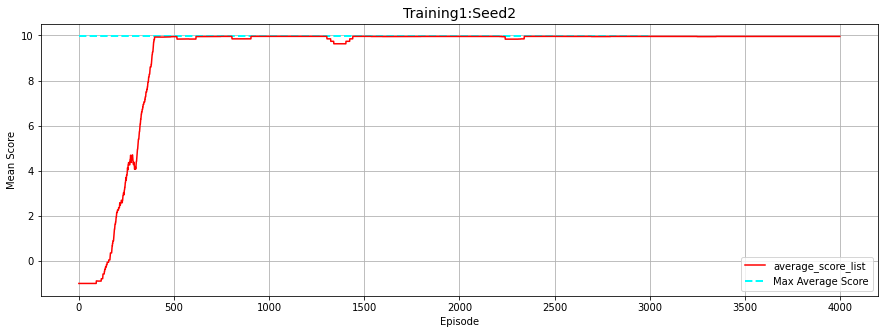

Episode 70	Average Score: -0.999994,	Average Step: 499.0Task solved in step: 266
Score: [9.4668]
Episode 120	Average Score: -0.895326,	Average Step: 496.6746464646466Task solved in step: 455
Score: [9.089605]
Episode 130	Average Score: -0.794430,	Average Step: 496.23Task solved in step: 468
Score: [9.0630045]
Episode 131	Average Score: -0.693800,	Average Step: 495.92Task solved in step: 137
Score: [9.724999]
Episode 155	Average Score: -0.586550,	Average Step: 492.3Task solved in step: 149
Score: [9.701799]
Episode 172	Average Score: -0.584200,	Average Step: 491.13Task solved in step: 180
Score: [9.6382]
Episode 178	Average Score: -0.477818,	Average Step: 487.94Task solved in step: 347
Score: [9.305402]
Episode 180	Average Score: -0.374764,	Average Step: 486.42Task solved in step: 207
Score: [9.584399]
Episode 181	Average Score: -0.268920,	Average Step: 483.5Task solved in step: 178
Score: [9.6434]
Episode 185	Average Score: -0.162487,	Average Step: 480.29Task solved in step: 169
Score:

Episode 656	Average Score: 0.296417,	Average Step: 450.86Task solved in step: 52
Score: [9.8942]
Episode 661	Average Score: 0.296053,	Average Step: 451.04Task solved in step: 47
Score: [9.904201]
Episode 664	Average Score: 0.297001,	Average Step: 450.56Task solved in step: 79
Score: [9.8414]
Episode 666	Average Score: 0.405415,	Average Step: 446.36Task solved in step: 49
Score: [9.901601]
Episode 683	Average Score: 0.303483,	Average Step: 447.32Task solved in step: 128
Score: [9.7434]
Episode 688	Average Score: 0.410917,	Average Step: 443.61Task solved in step: 55
Score: [9.8884]
Episode 690	Average Score: 0.519801,	Average Step: 439.17Task solved in step: 467
Score: [9.0644045]
Episode 693	Average Score: 0.620445,	Average Step: 438.85Task solved in step: 372
Score: [9.255002]
Episode 700	Average Score: 0.722995,	Average Step: 437.58Task solved in step: 207
Score: [9.585199]
Episode 702	Average Score: 0.828847,	Average Step: 434.66Task solved in step: 199
Score: [9.6016]
Episode 714	Av

Episode 969	Average Score: 8.626246,	Average Step: 86.19Task solved in step: 34
Score: [9.9318]
Episode 970	Average Score: 8.625973,	Average Step: 86.33Task solved in step: 23
Score: [9.953199]
Episode 971	Average Score: 8.625912,	Average Step: 86.36Task solved in step: 24
Score: [9.9512]
Episode 972	Average Score: 8.625890,	Average Step: 86.37Task solved in step: 24
Score: [9.9512]
Episode 973	Average Score: 8.625940,	Average Step: 86.35Task solved in step: 157
Score: [9.684999]
Episode 974	Average Score: 8.623324,	Average Step: 87.66Task solved in step: 28
Score: [9.943601]
Episode 975	Average Score: 8.732760,	Average Step: 82.95Task solved in step: 21
Score: [9.9564]
Episode 976	Average Score: 8.732786,	Average Step: 82.93Task solved in step: 28
Score: [9.9428005]
Episode 978	Average Score: 8.623363,	Average Step: 87.64Task solved in step: 23
Score: [9.9534]
Episode 980	Average Score: 8.513785,	Average Step: 92.43Task solved in step: 20
Score: [9.9592]
Episode 981	Average Score: 8.5

Episode 1060	Average Score: 9.060565,	Average Step: 69.16Task solved in step: 20
Score: [9.9592]
Episode 1061	Average Score: 9.060583,	Average Step: 69.15Task solved in step: 20
Score: [9.9592]
Episode 1062	Average Score: 9.170176,	Average Step: 64.36Task solved in step: 20
Score: [9.9592]
Episode 1063	Average Score: 9.170219,	Average Step: 64.34Task solved in step: 21
Score: [9.9568]
Episode 1064	Average Score: 9.279786,	Average Step: 59.56Task solved in step: 21
Score: [9.956]
Episode 1065	Average Score: 9.279755,	Average Step: 59.57Task solved in step: 20
Score: [9.9592]
Episode 1066	Average Score: 9.279913,	Average Step: 59.49Task solved in step: 20
Score: [9.9592]
Episode 1067	Average Score: 9.280333,	Average Step: 59.28Task solved in step: 20
Score: [9.9592]
Episode 1068	Average Score: 9.280573,	Average Step: 59.16Task solved in step: 20
Score: [9.9592]
Episode 1069	Average Score: 9.280625,	Average Step: 59.14Task solved in step: 20
Score: [9.9592]
Episode 1070	Average Score: 9.2

Episode 1147	Average Score: 9.730225,	Average Step: 34.37Task solved in step: 20
Score: [9.9592]
Episode 1148	Average Score: 9.730225,	Average Step: 34.37Task solved in step: 20
Score: [9.9592]
Episode 1149	Average Score: 9.730252,	Average Step: 34.36Task solved in step: 20
Score: [9.9592]
Episode 1150	Average Score: 9.730281,	Average Step: 34.35Task solved in step: 20
Score: [9.9592]
Episode 1151	Average Score: 9.730281,	Average Step: 34.35Task solved in step: 21
Score: [9.9564]
Episode 1152	Average Score: 9.730252,	Average Step: 34.36Task solved in step: 21
Score: [9.9564]
Episode 1153	Average Score: 9.730225,	Average Step: 34.37Task solved in step: 20
Score: [9.9592]
Episode 1154	Average Score: 9.730225,	Average Step: 34.37Task solved in step: 20
Score: [9.9592]
Episode 1155	Average Score: 9.730248,	Average Step: 34.36Task solved in step: 20
Score: [9.9592]
Episode 1156	Average Score: 9.730281,	Average Step: 34.35Task solved in step: 20
Score: [9.9592]
Episode 1157	Average Score: 9.

Episode 1315	Average Score: 9.955952,	Average Step: 21.62Task solved in step: 20
Score: [9.9592]
Episode 1316	Average Score: 9.955952,	Average Step: 21.62Task solved in step: 20
Score: [9.9592]
Episode 1317	Average Score: 9.955952,	Average Step: 21.62Task solved in step: 20
Score: [9.9592]
Episode 1318	Average Score: 9.955952,	Average Step: 21.62Task solved in step: 32
Score: [9.9354]
Episode 1319	Average Score: 9.955714,	Average Step: 21.74Task solved in step: 20
Score: [9.9592]
Episode 1320	Average Score: 9.955733,	Average Step: 21.73Task solved in step: 20
Score: [9.9592]
Episode 1321	Average Score: 9.955733,	Average Step: 21.73Task solved in step: 218
Score: [9.562999]
Episode 1322	Average Score: 9.951771,	Average Step: 23.71Task solved in step: 20
Score: [9.9592]
Episode 1323	Average Score: 9.951772,	Average Step: 23.71Task solved in step: 20
Score: [9.9592]
Episode 1324	Average Score: 9.951771,	Average Step: 23.71Task solved in step: 20
Score: [9.9592]
Episode 1325	Average Score:

Episode 1400	Average Score: 9.951198,	Average Step: 23.99Task solved in step: 25
Score: [9.9496]
Episode 1401	Average Score: 9.951101,	Average Step: 24.04Task solved in step: 378
Score: [9.243202]
Episode 1402	Average Score: 9.943942,	Average Step: 27.62Task solved in step: 20
Score: [9.9592]
Episode 1403	Average Score: 9.943941,	Average Step: 27.62Task solved in step: 20
Score: [9.9592]
Episode 1404	Average Score: 9.943941,	Average Step: 27.62Task solved in step: 20
Score: [9.9592]
Episode 1405	Average Score: 9.943962,	Average Step: 27.61Task solved in step: 20
Score: [9.9592]
Episode 1406	Average Score: 9.943962,	Average Step: 27.61Task solved in step: 20
Score: [9.9592]
Episode 1407	Average Score: 9.943962,	Average Step: 27.61Task solved in step: 20
Score: [9.9592]
Episode 1408	Average Score: 9.943962,	Average Step: 27.61Task solved in step: 20
Score: [9.9592]
Episode 1409	Average Score: 9.943962,	Average Step: 27.61Task solved in step: 20
Score: [9.9592]
Episode 1410	Average Score:

Episode 1487	Average Score: 9.720762,	Average Step: 39.21Task solved in step: 20
Score: [9.9592]
Episode 1488	Average Score: 9.720762,	Average Step: 39.21Task solved in step: 26
Score: [9.946]
Episode 1489	Average Score: 9.720630,	Average Step: 39.27Task solved in step: 20
Score: [9.9592]
Episode 1490	Average Score: 9.720630,	Average Step: 39.27Task solved in step: 20
Score: [9.9592]
Episode 1491	Average Score: 9.720630,	Average Step: 39.27Task solved in step: 20
Score: [9.9592]
Episode 1492	Average Score: 9.720630,	Average Step: 39.27Task solved in step: 20
Score: [9.9592]
Episode 1493	Average Score: 9.721964,	Average Step: 38.6Task solved in step: 20
Score: [9.9592]
Episode 1494	Average Score: 9.721964,	Average Step: 38.6Task solved in step: 20
Score: [9.9592]
Episode 1495	Average Score: 9.721964,	Average Step: 38.6Task solved in step: 42
Score: [9.914201]
Episode 1496	Average Score: 9.721514,	Average Step: 38.82Task solved in step: 20
Score: [9.9592]
Episode 1497	Average Score: 9.72

Episode 1658	Average Score: 9.847038,	Average Step: 26.06Task solved in step: 20
Score: [9.9592]
Episode 1659	Average Score: 9.847038,	Average Step: 26.06Task solved in step: 20
Score: [9.9592]
Episode 1660	Average Score: 9.847038,	Average Step: 26.06Task solved in step: 20
Score: [9.9592]
Episode 1661	Average Score: 9.847038,	Average Step: 26.06Task solved in step: 20
Score: [9.9592]
Episode 1662	Average Score: 9.847038,	Average Step: 26.06Task solved in step: 20
Score: [9.9592]
Episode 1663	Average Score: 9.847038,	Average Step: 26.06Task solved in step: 20
Score: [9.9592]
Episode 1664	Average Score: 9.847038,	Average Step: 26.06Task solved in step: 20
Score: [9.9592]
Episode 1665	Average Score: 9.847038,	Average Step: 26.06Task solved in step: 20
Score: [9.9592]
Episode 1666	Average Score: 9.847038,	Average Step: 26.06Task solved in step: 20
Score: [9.9592]
Episode 1667	Average Score: 9.847038,	Average Step: 26.06Task solved in step: 20
Score: [9.9592]
Episode 1668	Average Score: 9.

Episode 1830	Average Score: 9.732948,	Average Step: 33.09Task solved in step: 20
Score: [9.9592]
Episode 1831	Average Score: 9.732948,	Average Step: 33.09Task solved in step: 21
Score: [9.9572]
Episode 1832	Average Score: 9.732928,	Average Step: 33.1Task solved in step: 20
Score: [9.9592]
Episode 1833	Average Score: 9.732928,	Average Step: 33.1Task solved in step: 20
Score: [9.9592]
Episode 1834	Average Score: 9.732928,	Average Step: 33.1Task solved in step: 20
Score: [9.9592]
Episode 1835	Average Score: 9.732928,	Average Step: 33.1Task solved in step: 20
Score: [9.9592]
Episode 1836	Average Score: 9.732928,	Average Step: 33.1Task solved in step: 20
Score: [9.9592]
Episode 1837	Average Score: 9.732928,	Average Step: 33.1Task solved in step: 20
Score: [9.9592]
Episode 1838	Average Score: 9.733001,	Average Step: 33.07Task solved in step: 20
Score: [9.9592]
Episode 1839	Average Score: 9.733001,	Average Step: 33.07Task solved in step: 20
Score: [9.9592]
Episode 1840	Average Score: 9.733001

Episode 2002	Average Score: 9.737580,	Average Step: 30.78Task solved in step: 20
Score: [9.9592]
Episode 2003	Average Score: 9.737580,	Average Step: 30.78Task solved in step: 20
Score: [9.9592]
Episode 2004	Average Score: 9.737580,	Average Step: 30.78Task solved in step: 20
Score: [9.9592]
Episode 2005	Average Score: 9.737580,	Average Step: 30.78Task solved in step: 20
Score: [9.9592]
Episode 2006	Average Score: 9.737580,	Average Step: 30.78Task solved in step: 20
Score: [9.9592]
Episode 2007	Average Score: 9.737580,	Average Step: 30.78Task solved in step: 28
Score: [9.942]
Episode 2008	Average Score: 9.737409,	Average Step: 30.86Task solved in step: 20
Score: [9.9592]
Episode 2009	Average Score: 9.737409,	Average Step: 30.86Task solved in step: 20
Score: [9.9592]
Episode 2010	Average Score: 9.737568,	Average Step: 30.78Task solved in step: 20
Score: [9.9592]
Episode 2011	Average Score: 9.737568,	Average Step: 30.78Task solved in step: 20
Score: [9.9592]
Episode 2012	Average Score: 9.7

Episode 2090	Average Score: 9.621278,	Average Step: 38.93Task solved in step: 20
Score: [9.9592]
Episode 2091	Average Score: 9.621278,	Average Step: 38.93Task solved in step: 20
Score: [9.9592]
Episode 2092	Average Score: 9.621337,	Average Step: 38.9Task solved in step: 20
Score: [9.9592]
Episode 2093	Average Score: 9.621337,	Average Step: 38.9Task solved in step: 20
Score: [9.9592]
Episode 2094	Average Score: 9.621337,	Average Step: 38.9Task solved in step: 20
Score: [9.9592]
Episode 2095	Average Score: 9.621337,	Average Step: 38.9Task solved in step: 20
Score: [9.9592]
Episode 2096	Average Score: 9.621337,	Average Step: 38.9Task solved in step: 20
Score: [9.9592]
Episode 2097	Average Score: 9.621337,	Average Step: 38.9Task solved in step: 20
Score: [9.9592]
Episode 2098	Average Score: 9.621337,	Average Step: 38.9Task solved in step: 20
Score: [9.9592]
Episode 2099	Average Score: 9.621337,	Average Step: 38.9Task solved in step: 20
Score: [9.9592]
Episode 2100	Average Score: 9.621337,	

Episode 2260	Average Score: 9.957558,	Average Step: 20.81Task solved in step: 20
Score: [9.9592]
Episode 2261	Average Score: 9.957558,	Average Step: 20.81Task solved in step: 20
Score: [9.9592]
Episode 2262	Average Score: 9.957558,	Average Step: 20.81Task solved in step: 20
Score: [9.9592]
Episode 2263	Average Score: 9.957559,	Average Step: 20.81Task solved in step: 20
Score: [9.9592]
Episode 2264	Average Score: 9.957558,	Average Step: 20.81Task solved in step: 20
Score: [9.9592]
Episode 2265	Average Score: 9.957559,	Average Step: 20.81Task solved in step: 20
Score: [9.9592]
Episode 2266	Average Score: 9.957558,	Average Step: 20.81Task solved in step: 20
Score: [9.9592]
Episode 2267	Average Score: 9.957559,	Average Step: 20.81Task solved in step: 20
Score: [9.9592]
Episode 2268	Average Score: 9.957558,	Average Step: 20.81Task solved in step: 20
Score: [9.9592]
Episode 2269	Average Score: 9.957559,	Average Step: 20.81Task solved in step: 20
Score: [9.9592]
Episode 2270	Average Score: 9.

Episode 2346	Average Score: 9.848228,	Average Step: 25.47Task solved in step: 20
Score: [9.9592]
Episode 2347	Average Score: 9.848228,	Average Step: 25.47Task solved in step: 20
Score: [9.9592]
Episode 2348	Average Score: 9.848228,	Average Step: 25.47Task solved in step: 22
Score: [9.954801]
Episode 2349	Average Score: 9.848184,	Average Step: 25.49Task solved in step: 20
Score: [9.9592]
Episode 2350	Average Score: 9.848185,	Average Step: 25.49Task solved in step: 20
Score: [9.9592]
Episode 2351	Average Score: 9.848184,	Average Step: 25.49Task solved in step: 20
Score: [9.9592]
Episode 2352	Average Score: 9.848185,	Average Step: 25.49Task solved in step: 75
Score: [9.848201]
Episode 2353	Average Score: 9.847074,	Average Step: 26.04Task solved in step: 20
Score: [9.9592]
Episode 2354	Average Score: 9.847075,	Average Step: 26.04Task solved in step: 20
Score: [9.9592]
Episode 2355	Average Score: 9.847074,	Average Step: 26.04Task solved in step: 20
Score: [9.9592]
Episode 2356	Average Score

Episode 2431	Average Score: 9.846399,	Average Step: 26.39Task solved in step: 53
Score: [9.8932]
Episode 2432	Average Score: 9.955330,	Average Step: 21.93Task solved in step: 20
Score: [9.9592]
Episode 2433	Average Score: 9.955388,	Average Step: 21.9Task solved in step: 20
Score: [9.9592]
Episode 2434	Average Score: 9.955388,	Average Step: 21.9Task solved in step: 20
Score: [9.9592]
Episode 2435	Average Score: 9.955534,	Average Step: 21.83Task solved in step: 20
Score: [9.9592]
Episode 2436	Average Score: 9.955534,	Average Step: 21.83Task solved in step: 20
Score: [9.9592]
Episode 2437	Average Score: 9.955534,	Average Step: 21.83Task solved in step: 20
Score: [9.9592]
Episode 2438	Average Score: 9.955534,	Average Step: 21.83Task solved in step: 20
Score: [9.9592]
Episode 2439	Average Score: 9.955534,	Average Step: 21.83Task solved in step: 20
Score: [9.9592]
Episode 2440	Average Score: 9.955534,	Average Step: 21.83Task solved in step: 20
Score: [9.9592]
Episode 2441	Average Score: 9.95

Episode 2522	Average Score: 9.282393,	Average Step: 58.33Task solved in step: 20
Score: [9.9592]
Episode 2523	Average Score: 9.282393,	Average Step: 58.33Task solved in step: 20
Score: [9.9592]
Episode 2524	Average Score: 9.282393,	Average Step: 58.33Task solved in step: 20
Score: [9.9592]
Episode 2525	Average Score: 9.282393,	Average Step: 58.33Task solved in step: 20
Score: [9.9592]
Episode 2526	Average Score: 9.282393,	Average Step: 58.33Task solved in step: 20
Score: [9.9592]
Episode 2527	Average Score: 9.282393,	Average Step: 58.33Task solved in step: 25
Score: [9.9488]
Episode 2528	Average Score: 9.282290,	Average Step: 58.38Task solved in step: 22
Score: [9.954201]
Episode 2529	Average Score: 9.282239,	Average Step: 58.4Task solved in step: 20
Score: [9.9592]
Episode 2530	Average Score: 9.282239,	Average Step: 58.4Task solved in step: 45
Score: [9.9092]
Episode 2531	Average Score: 9.281738,	Average Step: 58.65Task solved in step: 20
Score: [9.9592]
Episode 2532	Average Score: 9.

Episode 2610	Average Score: 9.071041,	Average Step: 63.99Task solved in step: 20
Score: [9.9592]
Episode 2611	Average Score: 9.180633,	Average Step: 59.2Task solved in step: 20
Score: [9.9592]
Episode 2612	Average Score: 9.290225,	Average Step: 54.41Task solved in step: 21
Score: [9.956201]
Episode 2613	Average Score: 9.399786,	Average Step: 49.63Task solved in step: 20
Score: [9.9592]
Episode 2614	Average Score: 9.399816,	Average Step: 49.62Task solved in step: 20
Score: [9.9592]
Episode 2615	Average Score: 9.405568,	Average Step: 46.75Task solved in step: 20
Score: [9.9592]
Episode 2616	Average Score: 9.515160,	Average Step: 41.96Task solved in step: 20
Score: [9.9592]
Episode 2617	Average Score: 9.624752,	Average Step: 37.17Task solved in step: 20
Score: [9.9592]
Episode 2618	Average Score: 9.624752,	Average Step: 37.17Task solved in step: 363
Score: [9.272402]
Episode 2619	Average Score: 9.617943,	Average Step: 40.57Task solved in step: 20
Score: [9.9592]
Episode 2620	Average Score

Episode 2696	Average Score: 9.840230,	Average Step: 29.46Task solved in step: 20
Score: [9.9592]
Episode 2697	Average Score: 9.840230,	Average Step: 29.46Task solved in step: 20
Score: [9.9592]
Episode 2698	Average Score: 9.840230,	Average Step: 29.46Task solved in step: 23
Score: [9.9534]
Episode 2699	Average Score: 9.840172,	Average Step: 29.49Task solved in step: 20
Score: [9.9592]
Episode 2700	Average Score: 9.840172,	Average Step: 29.49Task solved in step: 20
Score: [9.9592]
Episode 2701	Average Score: 9.840257,	Average Step: 29.45Task solved in step: 20
Score: [9.9592]
Episode 2702	Average Score: 9.840255,	Average Step: 29.45Task solved in step: 20
Score: [9.9592]
Episode 2703	Average Score: 9.840257,	Average Step: 29.45Task solved in step: 20
Score: [9.9592]
Episode 2704	Average Score: 9.840257,	Average Step: 29.45Task solved in step: 20
Score: [9.9592]
Episode 2705	Average Score: 9.840257,	Average Step: 29.45Task solved in step: 20
Score: [9.9592]
Episode 2706	Average Score: 9.

Episode 2784	Average Score: 9.512224,	Average Step: 43.42Task solved in step: 20
Score: [9.9592]
Episode 2785	Average Score: 9.512225,	Average Step: 43.42Task solved in step: 20
Score: [9.9592]
Episode 2786	Average Score: 9.512225,	Average Step: 43.42Task solved in step: 20
Score: [9.9592]
Episode 2787	Average Score: 9.621817,	Average Step: 38.63Task solved in step: 20
Score: [9.9592]
Episode 2788	Average Score: 9.621836,	Average Step: 38.62Task solved in step: 20
Score: [9.9592]
Episode 2789	Average Score: 9.621837,	Average Step: 38.62Task solved in step: 20
Score: [9.9592]
Episode 2790	Average Score: 9.621837,	Average Step: 38.62Task solved in step: 20
Score: [9.9592]
Episode 2791	Average Score: 9.621839,	Average Step: 38.62Task solved in step: 20
Score: [9.9592]
Episode 2792	Average Score: 9.621839,	Average Step: 38.62Task solved in step: 20
Score: [9.9592]
Episode 2793	Average Score: 9.621839,	Average Step: 38.62Task solved in step: 20
Score: [9.9592]
Episode 2794	Average Score: 9.

Episode 2954	Average Score: 9.725620,	Average Step: 36.74Task solved in step: 20
Score: [9.9592]
Episode 2955	Average Score: 9.725620,	Average Step: 36.74Task solved in step: 20
Score: [9.9592]
Episode 2956	Average Score: 9.725620,	Average Step: 36.74Task solved in step: 20
Score: [9.9592]
Episode 2957	Average Score: 9.725713,	Average Step: 36.7Task solved in step: 23
Score: [9.9534]
Episode 2958	Average Score: 9.731166,	Average Step: 33.98Task solved in step: 20
Score: [9.9592]
Episode 2959	Average Score: 9.731867,	Average Step: 33.63Task solved in step: 20
Score: [9.9592]
Episode 2960	Average Score: 9.731867,	Average Step: 33.63Task solved in step: 20
Score: [9.9592]
Episode 2961	Average Score: 9.731867,	Average Step: 33.63Task solved in step: 20
Score: [9.9592]
Episode 2962	Average Score: 9.731945,	Average Step: 33.59Task solved in step: 20
Score: [9.9592]
Episode 2963	Average Score: 9.731945,	Average Step: 33.59Task solved in step: 20
Score: [9.9592]
Episode 2964	Average Score: 9.7

Episode 3039	Average Score: 9.954763,	Average Step: 22.2Task solved in step: 38
Score: [9.9236]
Episode 3040	Average Score: 9.954407,	Average Step: 22.38Task solved in step: 37
Score: [9.924999]
Episode 3041	Average Score: 9.954201,	Average Step: 22.48Task solved in step: 20
Score: [9.9592]
Episode 3042	Average Score: 9.954645,	Average Step: 22.26Task solved in step: 20
Score: [9.9592]
Episode 3043	Average Score: 9.954649,	Average Step: 22.26Task solved in step: 20
Score: [9.9592]
Episode 3044	Average Score: 9.954650,	Average Step: 22.26Task solved in step: 20
Score: [9.9592]
Episode 3045	Average Score: 9.954650,	Average Step: 22.26Task solved in step: 20
Score: [9.9592]
Episode 3046	Average Score: 9.954650,	Average Step: 22.26Task solved in step: 20
Score: [9.9592]
Episode 3047	Average Score: 9.954650,	Average Step: 22.26Task solved in step: 20
Score: [9.9592]
Episode 3048	Average Score: 9.954650,	Average Step: 22.26Task solved in step: 20
Score: [9.9592]
Episode 3049	Average Score: 9

Episode 3125	Average Score: 9.842011,	Average Step: 28.57Task solved in step: 20
Score: [9.9592]
Episode 3127	Average Score: 9.732419,	Average Step: 33.36Task solved in step: 54
Score: [9.8904]
Episode 3128	Average Score: 9.731731,	Average Step: 33.7Task solved in step: 102
Score: [9.7948]
Episode 3129	Average Score: 9.730087,	Average Step: 34.52Task solved in step: 20
Score: [9.9592]
Episode 3130	Average Score: 9.730087,	Average Step: 34.52Task solved in step: 20
Score: [9.9592]
Episode 3131	Average Score: 9.730634,	Average Step: 34.25Task solved in step: 20
Score: [9.9592]
Episode 3132	Average Score: 9.730764,	Average Step: 34.19Task solved in step: 20
Score: [9.9592]
Episode 3133	Average Score: 9.730764,	Average Step: 34.19Task solved in step: 24
Score: [9.950999]
Episode 3134	Average Score: 9.730681,	Average Step: 34.23Task solved in step: 20
Score: [9.9592]
Episode 3135	Average Score: 9.730681,	Average Step: 34.23Task solved in step: 20
Score: [9.9592]
Episode 3136	Average Score: 

Episode 3213	Average Score: 9.505189,	Average Step: 46.96Task solved in step: 20
Score: [9.9592]
Episode 3214	Average Score: 9.505189,	Average Step: 46.96Task solved in step: 20
Score: [9.9592]
Episode 3215	Average Score: 9.505189,	Average Step: 46.96Task solved in step: 21
Score: [9.9572]
Episode 3216	Average Score: 9.506811,	Average Step: 46.15Task solved in step: 20
Score: [9.9592]
Episode 3217	Average Score: 9.506811,	Average Step: 46.15Task solved in step: 20
Score: [9.9592]
Episode 3218	Average Score: 9.506811,	Average Step: 46.15Task solved in step: 20
Score: [9.9592]
Episode 3219	Average Score: 9.506810,	Average Step: 46.15Task solved in step: 20
Score: [9.9592]
Episode 3220	Average Score: 9.506854,	Average Step: 46.13Task solved in step: 20
Score: [9.9592]
Episode 3221	Average Score: 9.616446,	Average Step: 41.34Task solved in step: 20
Score: [9.9592]
Episode 3223	Average Score: 9.508286,	Average Step: 45.42Task solved in step: 49
Score: [9.901]
Episode 3224	Average Score: 9.5

Episode 3299	Average Score: 9.844170,	Average Step: 27.49Task solved in step: 20
Score: [9.9592]
Episode 3300	Average Score: 9.847294,	Average Step: 25.93Task solved in step: 20
Score: [9.9592]
Episode 3301	Average Score: 9.847294,	Average Step: 25.93Task solved in step: 20
Score: [9.9592]
Episode 3302	Average Score: 9.847294,	Average Step: 25.93Task solved in step: 20
Score: [9.9592]
Episode 3303	Average Score: 9.847294,	Average Step: 25.93Task solved in step: 29
Score: [9.940201]
Episode 3304	Average Score: 9.847162,	Average Step: 25.99Task solved in step: 20
Score: [9.9592]
Episode 3305	Average Score: 9.847162,	Average Step: 25.99Task solved in step: 22
Score: [9.9546]
Episode 3306	Average Score: 9.847116,	Average Step: 26.01Task solved in step: 20
Score: [9.9592]
Episode 3307	Average Score: 9.847241,	Average Step: 25.95Task solved in step: 20
Score: [9.9592]
Episode 3308	Average Score: 9.847242,	Average Step: 25.95Task solved in step: 27
Score: [9.9444]
Episode 3309	Average Score: 

Episode 3469	Average Score: 9.956448,	Average Step: 21.34Task solved in step: 20
Score: [9.9592]
Episode 3470	Average Score: 9.956473,	Average Step: 21.33Task solved in step: 20
Score: [9.9592]
Episode 3471	Average Score: 9.956474,	Average Step: 21.33Task solved in step: 20
Score: [9.9592]
Episode 3472	Average Score: 9.956474,	Average Step: 21.33Task solved in step: 20
Score: [9.9592]
Episode 3473	Average Score: 9.956474,	Average Step: 21.33Task solved in step: 20
Score: [9.9592]
Episode 3474	Average Score: 9.956474,	Average Step: 21.33Task solved in step: 20
Score: [9.9592]
Episode 3475	Average Score: 9.956476,	Average Step: 21.33Task solved in step: 20
Score: [9.9592]
Episode 3476	Average Score: 9.956476,	Average Step: 21.33Task solved in step: 20
Score: [9.9592]
Episode 3477	Average Score: 9.956516,	Average Step: 21.31Task solved in step: 20
Score: [9.9592]
Episode 3478	Average Score: 9.956516,	Average Step: 21.31Task solved in step: 21
Score: [9.9572]
Episode 3479	Average Score: 9.

Episode 3554	Average Score: 9.952366,	Average Step: 23.37Task solved in step: 20
Score: [9.9592]
Episode 3555	Average Score: 9.952366,	Average Step: 23.37Task solved in step: 20
Score: [9.9592]
Episode 3556	Average Score: 9.952366,	Average Step: 23.37Task solved in step: 20
Score: [9.9592]
Episode 3557	Average Score: 9.952366,	Average Step: 23.37Task solved in step: 20
Score: [9.9592]
Episode 3558	Average Score: 9.952366,	Average Step: 23.37Task solved in step: 31
Score: [9.9374]
Episode 3559	Average Score: 9.952178,	Average Step: 23.47Task solved in step: 21
Score: [9.9572]
Episode 3560	Average Score: 9.952160,	Average Step: 23.48Task solved in step: 23
Score: [9.9534]
Episode 3561	Average Score: 9.952102,	Average Step: 23.51Task solved in step: 20
Score: [9.9592]
Episode 3562	Average Score: 9.952101,	Average Step: 23.51Task solved in step: 20
Score: [9.9592]
Episode 3563	Average Score: 9.952160,	Average Step: 23.48Task solved in step: 20
Score: [9.9592]
Episode 3564	Average Score: 9.

Episode 3639	Average Score: 9.950726,	Average Step: 24.18Task solved in step: 21
Score: [9.9572]
Episode 3640	Average Score: 9.950705,	Average Step: 24.19Task solved in step: 21
Score: [9.9572]
Episode 3641	Average Score: 9.950706,	Average Step: 24.19Task solved in step: 21
Score: [9.9572]
Episode 3642	Average Score: 9.950686,	Average Step: 24.2Task solved in step: 21
Score: [9.9572]
Episode 3643	Average Score: 9.950665,	Average Step: 24.21Task solved in step: 21
Score: [9.9572]
Episode 3644	Average Score: 9.950645,	Average Step: 24.22Task solved in step: 80
Score: [9.8392]
Episode 3645	Average Score: 9.949445,	Average Step: 24.82Task solved in step: 21
Score: [9.956201]
Episode 3646	Average Score: 9.949461,	Average Step: 24.81Task solved in step: 21
Score: [9.9572]
Episode 3647	Average Score: 9.949461,	Average Step: 24.81Task solved in step: 21
Score: [9.957601]
Episode 3648	Average Score: 9.953444,	Average Step: 22.82Task solved in step: 21
Score: [9.956201]
Episode 3649	Average Scor

Episode 3725	Average Score: 9.840420,	Average Step: 29.26Task solved in step: 23
Score: [9.952801]
Episode 3726	Average Score: 9.840376,	Average Step: 29.28Task solved in step: 26
Score: [9.9478]
Episode 3727	Average Score: 9.840282,	Average Step: 29.33Task solved in step: 50
Score: [9.898]
Episode 3728	Average Score: 9.839690,	Average Step: 29.62Task solved in step: 45
Score: [9.9084]
Episode 3729	Average Score: 9.839202,	Average Step: 29.86Task solved in step: 25
Score: [9.9488]
Episode 3730	Average Score: 9.839426,	Average Step: 29.75Task solved in step: 24
Score: [9.9508]
Episode 3731	Average Score: 9.839362,	Average Step: 29.78Task solved in step: 22
Score: [9.955]
Episode 3732	Average Score: 9.839340,	Average Step: 29.79Task solved in step: 22
Score: [9.955]
Episode 3733	Average Score: 9.839318,	Average Step: 29.8Task solved in step: 26
Score: [9.9466]
Episode 3734	Average Score: 9.839191,	Average Step: 29.86Task solved in step: 20
Score: [9.9592]
Episode 3735	Average Score: 9.83

Episode 3907	Average Score: 8.952815,	Average Step: 73.11Task solved in step: 33
Score: [9.9336]
Episode 3908	Average Score: 8.959021,	Average Step: 70.01Task solved in step: 20
Score: [9.9592]
Episode 3909	Average Score: 8.959103,	Average Step: 69.97Task solved in step: 20
Score: [9.9592]
Episode 3910	Average Score: 9.068694,	Average Step: 65.18Task solved in step: 20
Score: [9.9592]
Episode 3911	Average Score: 9.178287,	Average Step: 60.39Task solved in step: 20
Score: [9.9592]
Episode 3912	Average Score: 9.180005,	Average Step: 59.53Task solved in step: 20
Score: [9.9592]
Episode 3913	Average Score: 9.180005,	Average Step: 59.53Task solved in step: 40
Score: [9.9182005]
Episode 3914	Average Score: 9.179595,	Average Step: 59.73Task solved in step: 20
Score: [9.9592]
Episode 3915	Average Score: 9.289186,	Average Step: 54.94Task solved in step: 20
Score: [9.9592]
Episode 3916	Average Score: 9.398778,	Average Step: 50.15Task solved in step: 20
Score: [9.9592]
Episode 3917	Average Score:

Episode 3992	Average Score: 9.956919,	Average Step: 21.11Task solved in step: 20
Score: [9.9592]
Episode 3993	Average Score: 9.957202,	Average Step: 20.97Task solved in step: 20
Score: [9.9592]
Episode 3994	Average Score: 9.957202,	Average Step: 20.97Task solved in step: 20
Score: [9.9592]
Episode 3995	Average Score: 9.957222,	Average Step: 20.96Task solved in step: 20
Score: [9.9592]
Episode 3996	Average Score: 9.957222,	Average Step: 20.96Task solved in step: 20
Score: [9.9592]
Episode 3997	Average Score: 9.957222,	Average Step: 20.96Task solved in step: 20
Score: [9.9592]
Episode 3998	Average Score: 9.957222,	Average Step: 20.96Task solved in step: 20
Score: [9.9592]
Episode 3999	Average Score: 9.957222,	Average Step: 20.96Task solved in step: 20
Score: [9.9592]
Episode 4000	Average Score: 9.957222,	Average Step: 20.96Brain Saved for Train_1 in episode: 4000 in seed 3


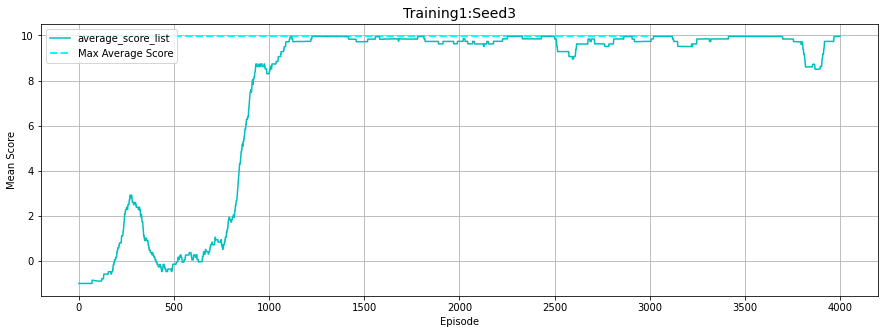

Episode 104	Average Score: -0.999994,	Average Step: 499.0Task solved in step: 171
Score: [9.656]
Episode 124	Average Score: -0.893434,	Average Step: 495.72Task solved in step: 115
Score: [9.768]
Episode 142	Average Score: -0.785754,	Average Step: 491.88Task solved in step: 486
Score: [9.027205]
Episode 147	Average Score: -0.685482,	Average Step: 491.75Task solved in step: 232
Score: [9.535199]
Episode 148	Average Score: -0.580130,	Average Step: 489.08Task solved in step: 482
Score: [9.034605]
Episode 177	Average Score: -0.479784,	Average Step: 488.91Task solved in step: 395
Score: [9.209203]
Episode 182	Average Score: -0.377692,	Average Step: 487.87Task solved in step: 259
Score: [9.480599]
Episode 187	Average Score: -0.272887,	Average Step: 485.47Task solved in step: 181
Score: [9.6374]
Episode 189	Average Score: -0.166513,	Average Step: 482.29Task solved in step: 465
Score: [9.069804]
Episode 196	Average Score: -0.065815,	Average Step: 481.95Task solved in step: 198
Score: [9.602799]

Episode 348	Average Score: 5.619966,	Average Step: 239.3Task solved in step: 128
Score: [9.7436]
Episode 349	Average Score: 5.727402,	Average Step: 235.59Task solved in step: 26
Score: [9.9474]
Episode 350	Average Score: 5.836875,	Average Step: 230.86Task solved in step: 22
Score: [9.955601]
Episode 351	Average Score: 5.946432,	Average Step: 226.09Task solved in step: 60
Score: [9.878201]
Episode 352	Average Score: 6.055213,	Average Step: 221.7Task solved in step: 22
Score: [9.9554]
Episode 353	Average Score: 6.059332,	Average Step: 219.64Task solved in step: 33
Score: [9.933]
Episode 354	Average Score: 6.168662,	Average Step: 214.98Task solved in step: 83
Score: [9.832]
Episode 355	Average Score: 6.276981,	Average Step: 210.82Task solved in step: 27
Score: [9.945]
Episode 356	Average Score: 6.386431,	Average Step: 206.1Task solved in step: 53
Score: [9.8932]
Episode 357	Average Score: 6.386523,	Average Step: 206.06Task solved in step: 27
Score: [9.9458]
Episode 358	Average Score: 6.49

Episode 436	Average Score: 9.362004,	Average Step: 68.43Task solved in step: 26
Score: [9.946]
Episode 437	Average Score: 9.362314,	Average Step: 68.27Task solved in step: 25
Score: [9.9498]
Episode 438	Average Score: 9.471813,	Average Step: 63.53Task solved in step: 26
Score: [9.947]
Episode 439	Average Score: 9.471761,	Average Step: 63.56Task solved in step: 26
Score: [9.9468]
Episode 440	Average Score: 9.472342,	Average Step: 63.27Task solved in step: 21
Score: [9.956]
Episode 441	Average Score: 9.474829,	Average Step: 62.02Task solved in step: 29
Score: [9.9406]
Episode 442	Average Score: 9.475385,	Average Step: 61.74Task solved in step: 25
Score: [9.9496]
Episode 443	Average Score: 9.475456,	Average Step: 61.71Task solved in step: 22
Score: [9.9554]
Episode 444	Average Score: 9.476814,	Average Step: 61.03Task solved in step: 21
Score: [9.9568]
Episode 445	Average Score: 9.586382,	Average Step: 56.25Task solved in step: 28
Score: [9.9432]
Episode 446	Average Score: 9.586348,	Averag

Episode 522	Average Score: 9.839289,	Average Step: 29.83Task solved in step: 21
Score: [9.9572]
Episode 523	Average Score: 9.839451,	Average Step: 29.75Task solved in step: 22
Score: [9.954]
Episode 524	Average Score: 9.839413,	Average Step: 29.76Task solved in step: 21
Score: [9.9564]
Episode 525	Average Score: 9.948977,	Average Step: 24.98Task solved in step: 26
Score: [9.9472]
Episode 526	Average Score: 9.948940,	Average Step: 25.0Task solved in step: 24
Score: [9.9506]
Episode 527	Average Score: 9.948917,	Average Step: 25.01Task solved in step: 21
Score: [9.956]
Episode 528	Average Score: 9.949020,	Average Step: 24.95Task solved in step: 21
Score: [9.9578]
Episode 529	Average Score: 9.949201,	Average Step: 24.86Task solved in step: 20
Score: [9.9592]
Episode 530	Average Score: 9.949270,	Average Step: 24.83Task solved in step: 21
Score: [9.9574]
Episode 531	Average Score: 9.949336,	Average Step: 24.8Task solved in step: 31
Score: [9.937799]
Episode 532	Average Score: 9.949141,	Avera

Episode 608	Average Score: 9.952161,	Average Step: 23.49Task solved in step: 23
Score: [9.9522]
Episode 609	Average Score: 9.952294,	Average Step: 23.42Task solved in step: 20
Score: [9.9592]
Episode 610	Average Score: 9.952431,	Average Step: 23.35Task solved in step: 22
Score: [9.954801]
Episode 611	Average Score: 9.952453,	Average Step: 23.34Task solved in step: 22
Score: [9.955]
Episode 612	Average Score: 9.952411,	Average Step: 23.36Task solved in step: 22
Score: [9.954801]
Episode 613	Average Score: 9.952380,	Average Step: 23.37Task solved in step: 21
Score: [9.9578]
Episode 614	Average Score: 9.952394,	Average Step: 23.37Task solved in step: 21
Score: [9.9578]
Episode 615	Average Score: 9.952475,	Average Step: 23.33Task solved in step: 23
Score: [9.952801]
Episode 616	Average Score: 9.952411,	Average Step: 23.36Task solved in step: 21
Score: [9.9578]
Episode 617	Average Score: 9.952451,	Average Step: 23.34Task solved in step: 22
Score: [9.9546]
Episode 618	Average Score: 9.952469

Episode 694	Average Score: 9.955489,	Average Step: 21.93Task solved in step: 22
Score: [9.9558]
Episode 695	Average Score: 9.955469,	Average Step: 21.94Task solved in step: 23
Score: [9.9522]
Episode 696	Average Score: 9.955413,	Average Step: 21.96Task solved in step: 23
Score: [9.952801]
Episode 697	Average Score: 9.955362,	Average Step: 21.98Task solved in step: 21
Score: [9.9578]
Episode 698	Average Score: 9.955417,	Average Step: 21.96Task solved in step: 24
Score: [9.9508]
Episode 699	Average Score: 9.955371,	Average Step: 21.98Task solved in step: 21
Score: [9.9578]
Episode 700	Average Score: 9.955395,	Average Step: 21.97Task solved in step: 21
Score: [9.9578]
Episode 701	Average Score: 9.955605,	Average Step: 21.87Task solved in step: 25
Score: [9.9498]
Episode 702	Average Score: 9.955587,	Average Step: 21.88Task solved in step: 23
Score: [9.952801]
Episode 703	Average Score: 9.955577,	Average Step: 21.88Task solved in step: 22
Score: [9.9552]
Episode 704	Average Score: 9.955619,

Episode 864	Average Score: 9.956615,	Average Step: 21.39Task solved in step: 29
Score: [9.941601]
Episode 865	Average Score: 9.956452,	Average Step: 21.47Task solved in step: 20
Score: [9.9592]
Episode 866	Average Score: 9.956453,	Average Step: 21.47Task solved in step: 23
Score: [9.9534]
Episode 867	Average Score: 9.956409,	Average Step: 21.49Task solved in step: 21
Score: [9.9578]
Episode 868	Average Score: 9.956466,	Average Step: 21.47Task solved in step: 21
Score: [9.9578]
Episode 869	Average Score: 9.956465,	Average Step: 21.47Task solved in step: 23
Score: [9.952801]
Episode 870	Average Score: 9.956415,	Average Step: 21.49Task solved in step: 21
Score: [9.9578]
Episode 871	Average Score: 9.956459,	Average Step: 21.47Task solved in step: 21
Score: [9.9578]
Episode 872	Average Score: 9.956459,	Average Step: 21.47Task solved in step: 21
Score: [9.9578]
Episode 873	Average Score: 9.956460,	Average Step: 21.47Task solved in step: 21
Score: [9.9578]
Episode 874	Average Score: 9.956459,

Episode 950	Average Score: 9.957392,	Average Step: 21.12Task solved in step: 21
Score: [9.9578]
Episode 951	Average Score: 9.957392,	Average Step: 21.12Task solved in step: 21
Score: [9.9578]
Episode 952	Average Score: 9.957392,	Average Step: 21.12Task solved in step: 416
Score: [9.167004]
Episode 953	Average Score: 9.949483,	Average Step: 25.07Task solved in step: 21
Score: [9.9578]
Episode 954	Average Score: 9.949470,	Average Step: 25.08Task solved in step: 21
Score: [9.9578]
Episode 955	Average Score: 9.949488,	Average Step: 25.08Task solved in step: 21
Score: [9.9578]
Episode 956	Average Score: 9.949488,	Average Step: 25.08Task solved in step: 21
Score: [9.9578]
Episode 957	Average Score: 9.949488,	Average Step: 25.08Task solved in step: 21
Score: [9.9578]
Episode 958	Average Score: 9.949488,	Average Step: 25.08Task solved in step: 21
Score: [9.9578]
Episode 959	Average Score: 9.949488,	Average Step: 25.08Task solved in step: 21
Score: [9.9578]
Episode 960	Average Score: 9.949489,	

Episode 1118	Average Score: 9.957231,	Average Step: 21.22Task solved in step: 21
Score: [9.9578]
Episode 1119	Average Score: 9.957231,	Average Step: 21.22Task solved in step: 21
Score: [9.9578]
Episode 1120	Average Score: 9.957231,	Average Step: 21.22Task solved in step: 21
Score: [9.9578]
Episode 1121	Average Score: 9.957231,	Average Step: 21.22Task solved in step: 21
Score: [9.9578]
Episode 1122	Average Score: 9.957231,	Average Step: 21.22Task solved in step: 21
Score: [9.9578]
Episode 1123	Average Score: 9.957231,	Average Step: 21.22Task solved in step: 21
Score: [9.9578]
Episode 1124	Average Score: 9.957274,	Average Step: 21.2Task solved in step: 21
Score: [9.9578]
Episode 1125	Average Score: 9.957274,	Average Step: 21.2Task solved in step: 21
Score: [9.9574]
Episode 1126	Average Score: 9.957270,	Average Step: 21.2Task solved in step: 21
Score: [9.9578]
Episode 1127	Average Score: 9.957270,	Average Step: 21.2Task solved in step: 29
Score: [9.940201]
Episode 1128	Average Score: 9.95

Episode 1203	Average Score: 9.956918,	Average Step: 21.35Task solved in step: 21
Score: [9.9578]
Episode 1204	Average Score: 9.956918,	Average Step: 21.35Task solved in step: 21
Score: [9.9578]
Episode 1205	Average Score: 9.956918,	Average Step: 21.35Task solved in step: 21
Score: [9.9578]
Episode 1206	Average Score: 9.956918,	Average Step: 21.35Task solved in step: 21
Score: [9.9578]
Episode 1207	Average Score: 9.956918,	Average Step: 21.35Task solved in step: 21
Score: [9.9578]
Episode 1208	Average Score: 9.956918,	Average Step: 21.35Task solved in step: 21
Score: [9.9578]
Episode 1209	Average Score: 9.956918,	Average Step: 21.35Task solved in step: 21
Score: [9.9578]
Episode 1210	Average Score: 9.956918,	Average Step: 21.35Task solved in step: 21
Score: [9.9578]
Episode 1211	Average Score: 9.956918,	Average Step: 21.35Task solved in step: 23
Score: [9.9534]
Episode 1212	Average Score: 9.956874,	Average Step: 21.37Task solved in step: 21
Score: [9.9578]
Episode 1213	Average Score: 9.

Episode 1288	Average Score: 9.955686,	Average Step: 21.98Task solved in step: 23
Score: [9.952801]
Episode 1289	Average Score: 9.955636,	Average Step: 22.0Task solved in step: 21
Score: [9.9578]
Episode 1290	Average Score: 9.955636,	Average Step: 22.0Task solved in step: 21
Score: [9.9578]
Episode 1291	Average Score: 9.955636,	Average Step: 22.0Task solved in step: 21
Score: [9.9578]
Episode 1292	Average Score: 9.955635,	Average Step: 22.0Task solved in step: 21
Score: [9.9578]
Episode 1293	Average Score: 9.955636,	Average Step: 22.0Task solved in step: 21
Score: [9.9578]
Episode 1294	Average Score: 9.955696,	Average Step: 21.97Task solved in step: 21
Score: [9.9578]
Episode 1295	Average Score: 9.955696,	Average Step: 21.97Task solved in step: 48
Score: [9.9026]
Episode 1296	Average Score: 9.955143,	Average Step: 22.24Task solved in step: 25
Score: [9.9482]
Episode 1297	Average Score: 9.955047,	Average Step: 22.28Task solved in step: 29
Score: [9.9418]
Episode 1298	Average Score: 9.954

Episode 1383	Average Score: 8.703932,	Average Step: 97.61Task solved in step: 40
Score: [9.918]
Episode 1384	Average Score: 8.703533,	Average Step: 97.8Task solved in step: 36
Score: [9.9278]
Episode 1385	Average Score: 8.703234,	Average Step: 97.95Task solved in step: 84
Score: [9.8302]
Episode 1386	Average Score: 8.701958,	Average Step: 98.58Task solved in step: 29
Score: [9.9412]
Episode 1387	Average Score: 8.701792,	Average Step: 98.66Task solved in step: 95
Score: [9.808001]
Episode 1388	Average Score: 8.700293,	Average Step: 99.4Task solved in step: 66
Score: [9.866]
Episode 1389	Average Score: 8.699425,	Average Step: 99.83Task solved in step: 27
Score: [9.9442005]
Episode 1390	Average Score: 8.699289,	Average Step: 99.89Task solved in step: 43
Score: [9.913401]
Episode 1391	Average Score: 8.698845,	Average Step: 100.11Task solved in step: 27
Score: [9.9442005]
Episode 1392	Average Score: 8.698709,	Average Step: 100.17Task solved in step: 56
Score: [9.8866005]
Episode 1393	Averag

Episode 1558	Average Score: 9.599941,	Average Step: 49.59Task solved in step: 20
Score: [9.9592]
Episode 1559	Average Score: 9.599941,	Average Step: 49.59Task solved in step: 21
Score: [9.9578]
Episode 1560	Average Score: 9.599985,	Average Step: 49.57Task solved in step: 21
Score: [9.9572]
Episode 1561	Average Score: 9.599964,	Average Step: 49.58Task solved in step: 20
Score: [9.9592]
Episode 1562	Average Score: 9.599964,	Average Step: 49.58Task solved in step: 77
Score: [9.8456]
Episode 1563	Average Score: 9.598861,	Average Step: 50.14Task solved in step: 20
Score: [9.9592]
Episode 1565	Average Score: 9.489858,	Average Step: 54.64Task solved in step: 20
Score: [9.9592]
Episode 1566	Average Score: 9.489859,	Average Step: 54.64Task solved in step: 21
Score: [9.9578]
Episode 1567	Average Score: 9.489879,	Average Step: 54.63Task solved in step: 21
Score: [9.9578]
Episode 1568	Average Score: 9.489904,	Average Step: 54.62Task solved in step: 20
Score: [9.9592]
Episode 1569	Average Score: 9.

Episode 1732	Average Score: 9.951729,	Average Step: 23.87Task solved in step: 21
Score: [9.9578]
Episode 1733	Average Score: 9.951729,	Average Step: 23.87Task solved in step: 21
Score: [9.9578]
Episode 1734	Average Score: 9.951715,	Average Step: 23.88Task solved in step: 21
Score: [9.9578]
Episode 1735	Average Score: 9.951701,	Average Step: 23.89Task solved in step: 21
Score: [9.9578]
Episode 1736	Average Score: 9.951687,	Average Step: 23.9Task solved in step: 21
Score: [9.9578]
Episode 1737	Average Score: 9.951687,	Average Step: 23.9Task solved in step: 21
Score: [9.9572]
Episode 1738	Average Score: 9.951668,	Average Step: 23.91Task solved in step: 21
Score: [9.9578]
Episode 1739	Average Score: 9.951668,	Average Step: 23.91Task solved in step: 21
Score: [9.9578]
Episode 1740	Average Score: 9.951668,	Average Step: 23.91Task solved in step: 21
Score: [9.9578]
Episode 1741	Average Score: 9.951668,	Average Step: 23.91Task solved in step: 21
Score: [9.9578]
Episode 1742	Average Score: 9.95

Episode 1901	Average Score: 9.956511,	Average Step: 21.54Task solved in step: 21
Score: [9.9578]
Episode 1902	Average Score: 9.956511,	Average Step: 21.54Task solved in step: 21
Score: [9.9578]
Episode 1903	Average Score: 9.956568,	Average Step: 21.52Task solved in step: 21
Score: [9.9578]
Episode 1904	Average Score: 9.956568,	Average Step: 21.52Task solved in step: 21
Score: [9.9578]
Episode 1905	Average Score: 9.956568,	Average Step: 21.52Task solved in step: 23
Score: [9.953199]
Episode 1906	Average Score: 9.956521,	Average Step: 21.54Task solved in step: 21
Score: [9.9578]
Episode 1907	Average Score: 9.956548,	Average Step: 21.53Task solved in step: 21
Score: [9.9578]
Episode 1908	Average Score: 9.956661,	Average Step: 21.48Task solved in step: 27
Score: [9.9448]
Episode 1909	Average Score: 9.956532,	Average Step: 21.54Task solved in step: 21
Score: [9.9578]
Episode 1910	Average Score: 9.956577,	Average Step: 21.52Task solved in step: 21
Score: [9.9578]
Episode 1911	Average Score: 

Episode 1986	Average Score: 9.956878,	Average Step: 21.37Task solved in step: 21
Score: [9.9578]
Episode 1987	Average Score: 9.956878,	Average Step: 21.37Task solved in step: 21
Score: [9.9578]
Episode 1988	Average Score: 9.957043,	Average Step: 21.29Task solved in step: 21
Score: [9.9578]
Episode 1989	Average Score: 9.957043,	Average Step: 21.29Task solved in step: 21
Score: [9.9578]
Episode 1990	Average Score: 9.957043,	Average Step: 21.29Task solved in step: 21
Score: [9.9578]
Episode 1991	Average Score: 9.957042,	Average Step: 21.29Task solved in step: 21
Score: [9.9578]
Episode 1992	Average Score: 9.957043,	Average Step: 21.29Task solved in step: 21
Score: [9.9578]
Episode 1993	Average Score: 9.957043,	Average Step: 21.29Task solved in step: 22
Score: [9.9552]
Episode 1994	Average Score: 9.957016,	Average Step: 21.3Task solved in step: 21
Score: [9.9578]
Episode 1995	Average Score: 9.957015,	Average Step: 21.3Task solved in step: 21
Score: [9.9578]
Episode 1996	Average Score: 9.95

Episode 2071	Average Score: 9.957102,	Average Step: 21.27Task solved in step: 21
Score: [9.9578]
Episode 2072	Average Score: 9.957102,	Average Step: 21.27Task solved in step: 21
Score: [9.9578]
Episode 2073	Average Score: 9.957102,	Average Step: 21.27Task solved in step: 21
Score: [9.9578]
Episode 2074	Average Score: 9.957102,	Average Step: 21.27Task solved in step: 21
Score: [9.9578]
Episode 2075	Average Score: 9.957102,	Average Step: 21.27Task solved in step: 21
Score: [9.9578]
Episode 2076	Average Score: 9.957102,	Average Step: 21.27Task solved in step: 21
Score: [9.9578]
Episode 2077	Average Score: 9.957102,	Average Step: 21.27Task solved in step: 23
Score: [9.952801]
Episode 2078	Average Score: 9.957089,	Average Step: 21.28Task solved in step: 22
Score: [9.955]
Episode 2079	Average Score: 9.957062,	Average Step: 21.29Task solved in step: 21
Score: [9.9578]
Episode 2080	Average Score: 9.957062,	Average Step: 21.29Task solved in step: 21
Score: [9.9578]
Episode 2081	Average Score: 9

Episode 2240	Average Score: 9.953982,	Average Step: 22.81Task solved in step: 28
Score: [9.942201]
Episode 2241	Average Score: 9.953826,	Average Step: 22.88Task solved in step: 21
Score: [9.9578]
Episode 2242	Average Score: 9.953826,	Average Step: 22.88Task solved in step: 21
Score: [9.9578]
Episode 2243	Average Score: 9.953826,	Average Step: 22.88Task solved in step: 21
Score: [9.9578]
Episode 2244	Average Score: 9.953826,	Average Step: 22.88Task solved in step: 21
Score: [9.9578]
Episode 2245	Average Score: 9.953826,	Average Step: 22.88Task solved in step: 21
Score: [9.9578]
Episode 2246	Average Score: 9.953826,	Average Step: 22.88Task solved in step: 21
Score: [9.9578]
Episode 2247	Average Score: 9.953826,	Average Step: 22.88Task solved in step: 21
Score: [9.9578]
Episode 2248	Average Score: 9.953826,	Average Step: 22.88Task solved in step: 21
Score: [9.9578]
Episode 2249	Average Score: 9.953876,	Average Step: 22.86Task solved in step: 21
Score: [9.9578]
Episode 2250	Average Score: 

Episode 2326	Average Score: 9.844460,	Average Step: 27.55Task solved in step: 21
Score: [9.956]
Episode 2327	Average Score: 9.844441,	Average Step: 27.55Task solved in step: 21
Score: [9.9578]
Episode 2328	Average Score: 9.844441,	Average Step: 27.55Task solved in step: 21
Score: [9.9578]
Episode 2329	Average Score: 9.844441,	Average Step: 27.55Task solved in step: 21
Score: [9.9578]
Episode 2330	Average Score: 9.844442,	Average Step: 27.55Task solved in step: 21
Score: [9.9578]
Episode 2331	Average Score: 9.844442,	Average Step: 27.55Task solved in step: 22
Score: [9.9552]
Episode 2332	Average Score: 9.844416,	Average Step: 27.56Task solved in step: 21
Score: [9.9578]
Episode 2333	Average Score: 9.844416,	Average Step: 27.56Task solved in step: 21
Score: [9.9578]
Episode 2334	Average Score: 9.844450,	Average Step: 27.55Task solved in step: 21
Score: [9.9578]
Episode 2335	Average Score: 9.844450,	Average Step: 27.55Task solved in step: 22
Score: [9.954]
Episode 2336	Average Score: 9.84

Episode 2494	Average Score: 9.946628,	Average Step: 26.47Task solved in step: 21
Score: [9.9578]
Episode 2495	Average Score: 9.946628,	Average Step: 26.47Task solved in step: 21
Score: [9.9578]
Episode 2496	Average Score: 9.946646,	Average Step: 26.47Task solved in step: 21
Score: [9.9578]
Episode 2497	Average Score: 9.946646,	Average Step: 26.47Task solved in step: 21
Score: [9.957601]
Episode 2498	Average Score: 9.946643,	Average Step: 26.47Task solved in step: 21
Score: [9.9578]
Episode 2499	Average Score: 9.946643,	Average Step: 26.47Task solved in step: 25
Score: [9.9492]
Episode 2500	Average Score: 9.946557,	Average Step: 26.51Task solved in step: 21
Score: [9.9578]
Episode 2501	Average Score: 9.946557,	Average Step: 26.51Task solved in step: 21
Score: [9.9578]
Episode 2502	Average Score: 9.946558,	Average Step: 26.51Task solved in step: 21
Score: [9.9578]
Episode 2503	Average Score: 9.946558,	Average Step: 26.51Task solved in step: 21
Score: [9.9578]
Episode 2504	Average Score: 

Episode 2663	Average Score: 9.947605,	Average Step: 25.97Task solved in step: 20
Score: [9.9592]
Episode 2664	Average Score: 9.947619,	Average Step: 25.96Task solved in step: 21
Score: [9.9578]
Episode 2665	Average Score: 9.947620,	Average Step: 25.96Task solved in step: 21
Score: [9.9578]
Episode 2666	Average Score: 9.947620,	Average Step: 25.96Task solved in step: 21
Score: [9.9578]
Episode 2667	Average Score: 9.947633,	Average Step: 25.96Task solved in step: 21
Score: [9.9578]
Episode 2668	Average Score: 9.947666,	Average Step: 25.95Task solved in step: 21
Score: [9.9578]
Episode 2669	Average Score: 9.947666,	Average Step: 25.95Task solved in step: 21
Score: [9.9578]
Episode 2670	Average Score: 9.947716,	Average Step: 25.93Task solved in step: 21
Score: [9.9578]
Episode 2671	Average Score: 9.947716,	Average Step: 25.93Task solved in step: 21
Score: [9.9578]
Episode 2672	Average Score: 9.947716,	Average Step: 25.93Task solved in step: 21
Score: [9.9578]
Episode 2673	Average Score: 9.

Episode 2832	Average Score: 9.951527,	Average Step: 24.01Task solved in step: 21
Score: [9.957601]
Episode 2833	Average Score: 9.951526,	Average Step: 24.01Task solved in step: 22
Score: [9.9544]
Episode 2834	Average Score: 9.951491,	Average Step: 24.02Task solved in step: 21
Score: [9.9578]
Episode 2835	Average Score: 9.951517,	Average Step: 24.01Task solved in step: 22
Score: [9.9544]
Episode 2836	Average Score: 9.951483,	Average Step: 24.02Task solved in step: 21
Score: [9.9572]
Episode 2837	Average Score: 9.951477,	Average Step: 24.02Task solved in step: 21
Score: [9.9578]
Episode 2838	Average Score: 9.951478,	Average Step: 24.02Task solved in step: 21
Score: [9.9578]
Episode 2839	Average Score: 9.951478,	Average Step: 24.02Task solved in step: 21
Score: [9.9578]
Episode 2840	Average Score: 9.951478,	Average Step: 24.02Task solved in step: 21
Score: [9.9578]
Episode 2841	Average Score: 9.951478,	Average Step: 24.02Task solved in step: 22
Score: [9.9552]
Episode 2842	Average Score: 

Episode 2918	Average Score: 9.955482,	Average Step: 22.03Task solved in step: 21
Score: [9.9578]
Episode 2919	Average Score: 9.955482,	Average Step: 22.03Task solved in step: 23
Score: [9.9538]
Episode 2920	Average Score: 9.955441,	Average Step: 22.05Task solved in step: 21
Score: [9.9578]
Episode 2921	Average Score: 9.955475,	Average Step: 22.04Task solved in step: 21
Score: [9.9578]
Episode 2922	Average Score: 9.955476,	Average Step: 22.04Task solved in step: 21
Score: [9.9578]
Episode 2923	Average Score: 9.955476,	Average Step: 22.04Task solved in step: 21
Score: [9.9578]
Episode 2924	Average Score: 9.955476,	Average Step: 22.04Task solved in step: 21
Score: [9.9578]
Episode 2925	Average Score: 9.955476,	Average Step: 22.04Task solved in step: 21
Score: [9.9578]
Episode 2926	Average Score: 9.955514,	Average Step: 22.03Task solved in step: 21
Score: [9.9578]
Episode 2927	Average Score: 9.955514,	Average Step: 22.03Task solved in step: 21
Score: [9.9578]
Episode 2928	Average Score: 9.

Episode 3002	Average Score: 9.956820,	Average Step: 21.44Task solved in step: 23
Score: [9.952801]
Episode 3003	Average Score: 9.956814,	Average Step: 21.44Task solved in step: 21
Score: [9.9578]
Episode 3004	Average Score: 9.956814,	Average Step: 21.44Task solved in step: 21
Score: [9.9578]
Episode 3005	Average Score: 9.956814,	Average Step: 21.44Task solved in step: 23
Score: [9.9534]
Episode 3006	Average Score: 9.956770,	Average Step: 21.46Task solved in step: 21
Score: [9.9578]
Episode 3007	Average Score: 9.956769,	Average Step: 21.46Task solved in step: 21
Score: [9.9578]
Episode 3008	Average Score: 9.956770,	Average Step: 21.46Task solved in step: 22
Score: [9.9558]
Episode 3009	Average Score: 9.956749,	Average Step: 21.47Task solved in step: 21
Score: [9.9578]
Episode 3010	Average Score: 9.956750,	Average Step: 21.47Task solved in step: 21
Score: [9.9578]
Episode 3011	Average Score: 9.956750,	Average Step: 21.47Task solved in step: 21
Score: [9.9578]
Episode 3012	Average Score: 

Episode 3087	Average Score: 9.956464,	Average Step: 21.55Task solved in step: 22
Score: [9.9544]
Episode 3088	Average Score: 9.956429,	Average Step: 21.56Task solved in step: 21
Score: [9.9578]
Episode 3089	Average Score: 9.956430,	Average Step: 21.56Task solved in step: 21
Score: [9.9578]
Episode 3090	Average Score: 9.956429,	Average Step: 21.56Task solved in step: 22
Score: [9.9544]
Episode 3091	Average Score: 9.956395,	Average Step: 21.57Task solved in step: 21
Score: [9.9578]
Episode 3092	Average Score: 9.956396,	Average Step: 21.57Task solved in step: 21
Score: [9.9578]
Episode 3093	Average Score: 9.956396,	Average Step: 21.57Task solved in step: 21
Score: [9.9578]
Episode 3094	Average Score: 9.956395,	Average Step: 21.57Task solved in step: 22
Score: [9.9544]
Episode 3095	Average Score: 9.956361,	Average Step: 21.58Task solved in step: 21
Score: [9.9578]
Episode 3096	Average Score: 9.956362,	Average Step: 21.58Task solved in step: 21
Score: [9.9578]
Episode 3097	Average Score: 9.

Episode 3172	Average Score: 9.956554,	Average Step: 21.48Task solved in step: 22
Score: [9.9544]
Episode 3173	Average Score: 9.956519,	Average Step: 21.49Task solved in step: 21
Score: [9.9578]
Episode 3174	Average Score: 9.956575,	Average Step: 21.47Task solved in step: 21
Score: [9.9578]
Episode 3175	Average Score: 9.956615,	Average Step: 21.45Task solved in step: 21
Score: [9.9578]
Episode 3176	Average Score: 9.956616,	Average Step: 21.45Task solved in step: 22
Score: [9.9552]
Episode 3177	Average Score: 9.956590,	Average Step: 21.46Task solved in step: 22
Score: [9.954]
Episode 3178	Average Score: 9.956551,	Average Step: 21.47Task solved in step: 21
Score: [9.9578]
Episode 3179	Average Score: 9.956552,	Average Step: 21.47Task solved in step: 21
Score: [9.9578]
Episode 3180	Average Score: 9.956552,	Average Step: 21.47Task solved in step: 21
Score: [9.9578]
Episode 3181	Average Score: 9.956551,	Average Step: 21.47Task solved in step: 21
Score: [9.9578]
Episode 3182	Average Score: 9.9

Episode 3258	Average Score: 9.845916,	Average Step: 26.77Task solved in step: 21
Score: [9.9578]
Episode 3259	Average Score: 9.845916,	Average Step: 26.77Task solved in step: 21
Score: [9.9578]
Episode 3260	Average Score: 9.845916,	Average Step: 26.77Task solved in step: 22
Score: [9.955601]
Episode 3261	Average Score: 9.845894,	Average Step: 26.78Task solved in step: 21
Score: [9.9578]
Episode 3262	Average Score: 9.845972,	Average Step: 26.75Task solved in step: 23
Score: [9.952801]
Episode 3263	Average Score: 9.845948,	Average Step: 26.76Task solved in step: 21
Score: [9.9578]
Episode 3264	Average Score: 9.846012,	Average Step: 26.73Task solved in step: 21
Score: [9.9578]
Episode 3265	Average Score: 9.846012,	Average Step: 26.73Task solved in step: 21
Score: [9.9578]
Episode 3266	Average Score: 9.846012,	Average Step: 26.73Task solved in step: 21
Score: [9.9578]
Episode 3267	Average Score: 9.846012,	Average Step: 26.73Task solved in step: 21
Score: [9.9578]
Episode 3268	Average Score

Episode 3427	Average Score: 9.948849,	Average Step: 25.35Task solved in step: 21
Score: [9.9578]
Episode 3428	Average Score: 9.948850,	Average Step: 25.35Task solved in step: 21
Score: [9.9578]
Episode 3429	Average Score: 9.948850,	Average Step: 25.35Task solved in step: 21
Score: [9.9578]
Episode 3430	Average Score: 9.948850,	Average Step: 25.35Task solved in step: 21
Score: [9.9578]
Episode 3431	Average Score: 9.948850,	Average Step: 25.35Task solved in step: 21
Score: [9.9578]
Episode 3432	Average Score: 9.948850,	Average Step: 25.35Task solved in step: 21
Score: [9.9578]
Episode 3433	Average Score: 9.948850,	Average Step: 25.35Task solved in step: 21
Score: [9.9578]
Episode 3434	Average Score: 9.948850,	Average Step: 25.35Task solved in step: 21
Score: [9.9578]
Episode 3435	Average Score: 9.948850,	Average Step: 25.35Task solved in step: 21
Score: [9.9578]
Episode 3436	Average Score: 9.948940,	Average Step: 25.31Task solved in step: 21
Score: [9.9578]
Episode 3437	Average Score: 9.

Episode 3595	Average Score: 9.956736,	Average Step: 21.42Task solved in step: 23
Score: [9.952801]
Episode 3596	Average Score: 9.956686,	Average Step: 21.44Task solved in step: 21
Score: [9.9578]
Episode 3597	Average Score: 9.956686,	Average Step: 21.44Task solved in step: 21
Score: [9.9578]
Episode 3598	Average Score: 9.956686,	Average Step: 21.44Task solved in step: 21
Score: [9.9578]
Episode 3599	Average Score: 9.956686,	Average Step: 21.44Task solved in step: 21
Score: [9.9578]
Episode 3600	Average Score: 9.956686,	Average Step: 21.44Task solved in step: 21
Score: [9.9578]
Episode 3601	Average Score: 9.956686,	Average Step: 21.44Task solved in step: 21
Score: [9.9578]
Episode 3602	Average Score: 9.956686,	Average Step: 21.44Task solved in step: 24
Score: [9.951799]
Episode 3603	Average Score: 9.956625,	Average Step: 21.47Task solved in step: 22
Score: [9.9544]
Episode 3604	Average Score: 9.956592,	Average Step: 21.48Task solved in step: 23
Score: [9.952999]
Episode 3605	Average Sco

Episode 3680	Average Score: 9.952651,	Average Step: 23.48Task solved in step: 21
Score: [9.9578]
Episode 3681	Average Score: 9.952651,	Average Step: 23.48Task solved in step: 21
Score: [9.9578]
Episode 3682	Average Score: 9.952652,	Average Step: 23.48Task solved in step: 25
Score: [9.9496]
Episode 3683	Average Score: 9.952569,	Average Step: 23.52Task solved in step: 21
Score: [9.9578]
Episode 3684	Average Score: 9.952625,	Average Step: 23.5Task solved in step: 21
Score: [9.9578]
Episode 3685	Average Score: 9.952625,	Average Step: 23.5Task solved in step: 21
Score: [9.9578]
Episode 3686	Average Score: 9.952625,	Average Step: 23.5Task solved in step: 21
Score: [9.9578]
Episode 3687	Average Score: 9.952625,	Average Step: 23.5Task solved in step: 21
Score: [9.9578]
Episode 3688	Average Score: 9.952625,	Average Step: 23.5Task solved in step: 22
Score: [9.9558]
Episode 3689	Average Score: 9.952605,	Average Step: 23.51Task solved in step: 21
Score: [9.9578]
Episode 3690	Average Score: 9.95260

Episode 3766	Average Score: 9.956306,	Average Step: 21.66Task solved in step: 21
Score: [9.9578]
Episode 3767	Average Score: 9.956306,	Average Step: 21.66Task solved in step: 21
Score: [9.9578]
Episode 3768	Average Score: 9.956306,	Average Step: 21.66Task solved in step: 22
Score: [9.9544]
Episode 3769	Average Score: 9.956271,	Average Step: 21.67Task solved in step: 21
Score: [9.9578]
Episode 3770	Average Score: 9.956272,	Average Step: 21.67Task solved in step: 21
Score: [9.9578]
Episode 3771	Average Score: 9.956271,	Average Step: 21.67Task solved in step: 22
Score: [9.954201]
Episode 3772	Average Score: 9.956236,	Average Step: 21.68Task solved in step: 20
Score: [9.9586]
Episode 3773	Average Score: 9.956448,	Average Step: 21.57Task solved in step: 21
Score: [9.9578]
Episode 3774	Average Score: 9.956448,	Average Step: 21.57Task solved in step: 27
Score: [9.944]
Episode 3775	Average Score: 9.956310,	Average Step: 21.63Task solved in step: 21
Score: [9.9578]
Episode 3776	Average Score: 9

Episode 3934	Average Score: 9.928552,	Average Step: 35.49Task solved in step: 21
Score: [9.9578]
Episode 3935	Average Score: 9.928551,	Average Step: 35.49Task solved in step: 21
Score: [9.9578]
Episode 3936	Average Score: 9.928577,	Average Step: 35.48Task solved in step: 21
Score: [9.9578]
Episode 3937	Average Score: 9.928577,	Average Step: 35.48Task solved in step: 23
Score: [9.952801]
Episode 3938	Average Score: 9.928528,	Average Step: 35.5Task solved in step: 21
Score: [9.9566]
Episode 3939	Average Score: 9.928535,	Average Step: 35.49Task solved in step: 21
Score: [9.9578]
Episode 3940	Average Score: 9.928535,	Average Step: 35.49Task solved in step: 21
Score: [9.9578]
Episode 3941	Average Score: 9.928585,	Average Step: 35.47Task solved in step: 23
Score: [9.953199]
Episode 3942	Average Score: 9.928539,	Average Step: 35.49Task solved in step: 22
Score: [9.9554]
Episode 3943	Average Score: 9.928515,	Average Step: 35.5Task solved in step: 21
Score: [9.9578]
Episode 3944	Average Score: 

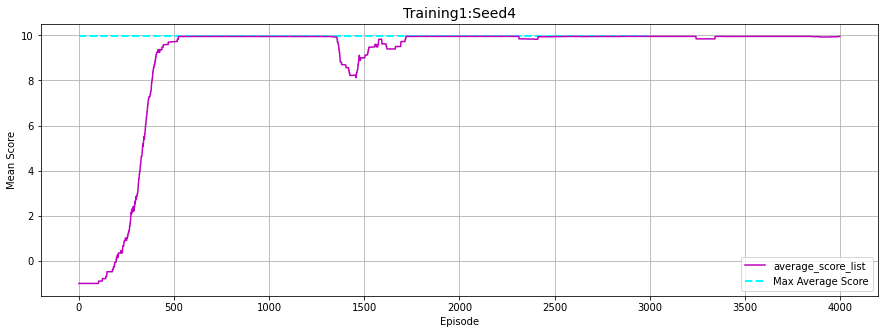

CPU times: user 2h 54min 46s, sys: 9h 40min 38s, total: 12h 35min 24s
Wall time: 3h 23min 36s


In [7]:
%%time

#Experiment done in 5 different seeds:
seed_number=5

for seed in range(seed_number):

    #Logged values


    scores = []
    step=[] 
    average_score_list=[]                                           #Saves last 100 average scores
    average_step_list=[]   
    scores_window = deque(maxlen=100)                               # Saves last 100 avarage solved steps
    step_window = deque(maxlen=100)                                 # last 100 scores

    #Hyperparamaters:

    n_episodes=4000
    max_t=500
    eps_start=1.0
    eps=eps_start
    eps_end=0.01 
    eps_decay=0.995
    #BETA = 0.025 For comparable experiment with DQN Beta bonus values is not used


    #Call SR function
    agent = SR_Agent(state_size, action_size, seed)
    env.reset()
    for episode in range(1,n_episodes+1):

        dones=np.asarray([False])
        #Reset environment for each episode:
        env.reset()
        #Get information from reset environment:
        decision_steps, terminal_steps = env.get_steps(behavior_name)
        # get initial state of the unity environment
        state = decision_steps.obs[0]
        #Score list containing scores from each episode:
        score = 0
        mean_score=[]
        for i in range(max_t):


            action,r_int = agent.parallel_act(state, eps)        #action as numpy.int64
            action_fixed=np.array([action])
            action_tuple = ActionTuple()
            action_tuple.add_discrete(action_fixed)

            #Set action information
            env.set_actions(behavior_name,action_tuple)
            # Move the simulation forward
            env.step()
            # Get the new simulation results
            decision_steps, terminal_steps = env.get_steps(behavior_name)
            # get the next states for each unity agent in the environment
            next_state = decision_steps.obs[0]

            # get the rewards for each unity agent in the environment
            rewards = decision_steps.reward
            
            #Adjust r
            #r = np.asarray(rewards) + BETA * np.asarray(r_int)

            #If episode dones:
            if(len(terminal_steps.reward)!=0):

                        dones= np.asarray([True])
                        rewards= terminal_steps.reward
                        r = np.asarray(rewards) + BETA * np.asarray(r_int)
                        next_state = terminal_steps.obs[0]




            #Send (S, A, R, S') info to the training agent for replay buffer (memory) and network updates
            agent.step(state, action, rewards, next_state,dones)

            #New state is the next state:
            state = next_state

            #Iterate rewards on score
            score += rewards


            if rewards > 0:
                print("Task solved in step:",i)
                print("Score:",score)


            if dones== np.asarray([True]):

                break


        #Decrease epsilon parameter step by step:
        eps = max(eps_end, eps_decay*eps) 

        #Save last step
        step.append(i)
        # save last steps for window for average 100:        
        step_window.append(i)
        #Create list for avarge 100 scores
        average_step_list.append(np.mean(step_window))

        # save most recent score:
        scores.append(score)
        # save most recent score for window for average 100:        
        scores_window.append(score)  
        #Create list for avarge 100 scores
        average_score_list.append(np.mean(scores_window))



        print('\rEpisode {}\tAverage Score: {:.6f},\tAverage Step: {}'.format(episode, np.mean(scores_window),np.mean(step_window)), end="")
       
       
        if episode % 1000 == 0:
    
            if seed == 0:
                print("Brain Saved for Train_1 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train1_Seed0.pth')
            if seed == 1:
                print("Brain Saved for Train_1 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train1_Seed1.pth')
            if seed == 2:
                print("Brain Saved for Train_1 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train1_Seed2.pth')
            if seed == 3:
                print("Brain Saved for Train_1 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train1_Seed3.pth')

            if seed == 4:
                print("Brain Saved for Train_1 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train1_Seed4.pth')
                
                
                

    #Save datas per each seed
    score_shape=len(scores)
    df= pd.DataFrame(list(zip(np.array(scores).reshape(score_shape).tolist(), average_score_list, step,average_step_list)), columns= ['Scores','Mean_Scores','Completed_Steps','MeanCompleted_Steps'])
    df.to_csv('Train_1_Seed_'+str(seed)+'.csv')
    
    #Plot mean reward:
    color=["b","g","r","c","m"]
    plt.rcParams['figure.figsize'] = [15,5]
    plt.plot(np.arange(len(average_score_list)), average_score_list,label="average_score_list",color=color[seed])
    plt.hlines(y=max(average_score_list), xmin=0, xmax=3000, colors='aqua', linestyles='--', lw=2, label='Max Average Score')
    plt.xlabel('Episode', fontsize=10)
    plt.ylabel('Mean Score', fontsize=10)
    plt.title("Training1:Seed{}".format(seed),fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.savefig("Training1:Seed{}.png".format(seed))
    plt.show()
    
    



# Second training:Alternative 

In [8]:
env.close()

In [9]:
default_file="HER_3_no.app"
alternative_file="HER_3_no_alternate.app"
default_logged="HER_3_no_log.app"
channel = EngineConfigurationChannel()
env = UnityEnvironment(file_name=alternative_file,worker_id=0,side_channels=[channel])
channel.set_configuration_parameters(time_scale = 100.0)
# get the behavior:
env.reset()
behavior_name = list(env.behavior_specs)[0]
print(behavior_name)
spec = env.behavior_specs[behavior_name]
# reset the environment
env.reset()
decision_steps, terminal_steps = env.get_steps(behavior_name)

for action, branch_size in enumerate(spec.action_spec.discrete_branches):
    print(f"Action number {action} has {branch_size} different options")
    
action_size=branch_size    
print('Number of actions:', action_size)

# examine the state space 
state=decision_steps.obs[0][0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)
print('States have length:', type(state))
env.reset()

HERTask_2?team=0
Action number 0 has 5 different options
Number of actions: 5
States look like: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.         0.         0.         0.
 0.         0.         0.         0.46935856 0.         1.
 0.         0.         0.         0.         0.         0.52897596
 0.         1.         0.         0.         0.         0.
 0.         0.5289759  0.         1.         0.         0.
 0.         0.         0.         0.707789   0.         1.
 0.        

Brain Saved for Training 2 in seed 4
Episode 27	Average Score: -0.999994,	Average Step: 499.0Task solved in step: 342
Score: [9.314802]
Episode 32	Average Score: -0.677657,	Average Step: 494.09375387096774Task solved in step: 379
Score: [9.241802]
Episode 42	Average Score: -0.510552,	Average Step: 492.40476190476194Task solved in step: 447
Score: [9.105205]
Episode 47	Average Score: -0.347616,	Average Step: 492.04782608695657Task solved in step: 340
Score: [9.319001]
Episode 65	Average Score: -0.369521,	Average Step: 491.49230769230775Task solved in step: 358
Score: [9.282002]
Episode 66	Average Score: -0.223285,	Average Step: 489.469696969697Task solved in step: 138
Score: [9.7232]
Episode 67	Average Score: -0.074830,	Average Step: 484.2238805970149Task solved in step: 487
Score: [9.024206]
Episode 72	Average Score: 0.000147,	Average Step: 485.08333333333335Task solved in step: 473
Score: [9.053405]
Episode 74	Average Score: 0.108973,	Average Step: 485.1081081081081Task solved in step

Episode 395	Average Score: 3.816697,	Average Step: 340.85Task solved in step: 355
Score: [9.289202]
Episode 396	Average Score: 3.919589,	Average Step: 339.41Task solved in step: 499
Score: [9.000206]
Episode 401	Average Score: 3.915633,	Average Step: 341.38Task solved in step: 142
Score: [9.7148]
Episode 407	Average Score: 3.699231,	Average Step: 349.57Task solved in step: 104
Score: [9.7918]
Episode 408	Average Score: 3.702908,	Average Step: 347.74Task solved in step: 97
Score: [9.804]
Episode 410	Average Score: 3.703677,	Average Step: 347.35Task solved in step: 144
Score: [9.7106]
Episode 411	Average Score: 3.703115,	Average Step: 347.63Task solved in step: 190
Score: [9.6194]
Episode 413	Average Score: 3.809309,	Average Step: 344.54Task solved in step: 131
Score: [9.7368]
Episode 416	Average Score: 3.807731,	Average Step: 345.33Task solved in step: 23
Score: [9.953199]
Episode 417	Average Score: 3.917263,	Average Step: 340.57Task solved in step: 55
Score: [9.8894005]
Episode 418	Ave

Episode 592	Average Score: 2.230584,	Average Step: 383.86Task solved in step: 22
Score: [9.9546]
Episode 593	Average Score: 2.230880,	Average Step: 383.71Task solved in step: 32
Score: [9.9346]
Episode 601	Average Score: 2.133468,	Average Step: 382.41Task solved in step: 47
Score: [9.9054]
Episode 604	Average Score: 2.132950,	Average Step: 382.67Task solved in step: 24
Score: [9.950399]
Episode 606	Average Score: 2.133178,	Average Step: 382.55Task solved in step: 201
Score: [9.596999]
Episode 608	Average Score: 2.239148,	Average Step: 379.57Task solved in step: 129
Score: [9.74]
Episode 609	Average Score: 2.346548,	Average Step: 375.87Task solved in step: 161
Score: [9.6774]
Episode 610	Average Score: 2.453322,	Average Step: 372.49Task solved in step: 47
Score: [9.905]
Episode 611	Average Score: 2.453376,	Average Step: 372.46Task solved in step: 27
Score: [9.9448]
Episode 612	Average Score: 2.562824,	Average Step: 367.74Task solved in step: 23
Score: [9.9536]
Episode 613	Average Score:

Episode 699	Average Score: 8.015821,	Average Step: 141.44Task solved in step: 19
Score: [9.9604]
Episode 700	Average Score: 8.125424,	Average Step: 136.64Task solved in step: 247
Score: [9.505799]
Episode 701	Average Score: 8.230483,	Average Step: 134.12Task solved in step: 21
Score: [9.9564]
Episode 702	Average Score: 8.230993,	Average Step: 133.86Task solved in step: 29
Score: [9.940001]
Episode 703	Average Score: 8.340393,	Average Step: 129.16Task solved in step: 18
Score: [9.9622]
Episode 705	Average Score: 8.340511,	Average Step: 129.1Task solved in step: 26
Score: [9.9464]
Episode 706	Average Score: 8.449976,	Average Step: 124.37Task solved in step: 24
Score: [9.950399]
Episode 708	Average Score: 8.453509,	Average Step: 122.6Task solved in step: 44
Score: [9.9108]
Episode 709	Average Score: 8.455217,	Average Step: 121.75Task solved in step: 81
Score: [9.836801]
Episode 710	Average Score: 8.456811,	Average Step: 120.95Task solved in step: 22
Score: [9.955601]
Episode 711	Average S

Episode 840	Average Score: 5.322102,	Average Step: 238.13Task solved in step: 18
Score: [9.9622]
Episode 841	Average Score: 5.431723,	Average Step: 233.32Task solved in step: 27
Score: [9.9456005]
Episode 842	Average Score: 5.432391,	Average Step: 232.99Task solved in step: 22
Score: [9.955601]
Episode 843	Average Score: 5.437325,	Average Step: 230.53Task solved in step: 18
Score: [9.9622]
Episode 844	Average Score: 5.546947,	Average Step: 225.72Task solved in step: 18
Score: [9.9622]
Episode 845	Average Score: 5.656569,	Average Step: 220.91Task solved in step: 18
Score: [9.9622]
Episode 846	Average Score: 5.656623,	Average Step: 220.88Task solved in step: 33
Score: [9.9326]
Episode 847	Average Score: 5.656328,	Average Step: 221.03Task solved in step: 33
Score: [9.9324]
Episode 848	Average Score: 5.656087,	Average Step: 221.15Task solved in step: 18
Score: [9.9622]
Episode 849	Average Score: 5.656163,	Average Step: 221.11Task solved in step: 21
Score: [9.9564]
Episode 850	Average Score

Episode 925	Average Score: 9.734989,	Average Step: 31.74Task solved in step: 18
Score: [9.9622]
Episode 926	Average Score: 9.734989,	Average Step: 31.74Task solved in step: 18
Score: [9.9622]
Episode 927	Average Score: 9.735136,	Average Step: 31.66Task solved in step: 18
Score: [9.9622]
Episode 928	Average Score: 9.844758,	Average Step: 26.85Task solved in step: 40
Score: [9.9194]
Episode 929	Average Score: 9.953952,	Average Step: 22.26Task solved in step: 18
Score: [9.9622]
Episode 930	Average Score: 9.953952,	Average Step: 22.26Task solved in step: 18
Score: [9.9622]
Episode 941	Average Score: 8.860373,	Average Step: 69.02Task solved in step: 21
Score: [9.957601]
Episode 942	Average Score: 8.860493,	Average Step: 68.96Task solved in step: 21
Score: [9.957601]
Episode 943	Average Score: 8.860513,	Average Step: 68.95Task solved in step: 18
Score: [9.9622]
Episode 944	Average Score: 8.860514,	Average Step: 68.95Task solved in step: 21
Score: [9.957601]
Episode 945	Average Score: 8.86046

Episode 1023	Average Score: 8.534798,	Average Step: 81.86Task solved in step: 18
Score: [9.9622]
Episode 1024	Average Score: 8.534799,	Average Step: 81.86Task solved in step: 18
Score: [9.9622]
Episode 1025	Average Score: 8.534856,	Average Step: 81.83Task solved in step: 21
Score: [9.9566]
Episode 1026	Average Score: 8.534800,	Average Step: 81.86Task solved in step: 20
Score: [9.9582]
Episode 1027	Average Score: 8.534760,	Average Step: 81.88Task solved in step: 18
Score: [9.9622]
Episode 1028	Average Score: 8.534760,	Average Step: 81.88Task solved in step: 18
Score: [9.9622]
Episode 1029	Average Score: 8.535188,	Average Step: 81.66Task solved in step: 18
Score: [9.9622]
Episode 1030	Average Score: 8.535188,	Average Step: 81.66Task solved in step: 21
Score: [9.9578]
Episode 1031	Average Score: 8.535144,	Average Step: 81.69Task solved in step: 319
Score: [9.361201]
Episode 1032	Average Score: 8.638756,	Average Step: 79.89Task solved in step: 31
Score: [9.9366]
Episode 1033	Average Score:

Episode 1109	Average Score: 9.836218,	Average Step: 31.11Task solved in step: 18
Score: [9.9622]
Episode 1110	Average Score: 9.836218,	Average Step: 31.11Task solved in step: 22
Score: [9.955601]
Episode 1111	Average Score: 9.836151,	Average Step: 31.15Task solved in step: 18
Score: [9.9622]
Episode 1112	Average Score: 9.836151,	Average Step: 31.15Task solved in step: 18
Score: [9.9622]
Episode 1113	Average Score: 9.836198,	Average Step: 31.12Task solved in step: 20
Score: [9.9592]
Episode 1114	Average Score: 9.836167,	Average Step: 31.14Task solved in step: 18
Score: [9.9622]
Episode 1115	Average Score: 9.836167,	Average Step: 31.14Task solved in step: 18
Score: [9.9622]
Episode 1116	Average Score: 9.836167,	Average Step: 31.14Task solved in step: 18
Score: [9.9622]
Episode 1117	Average Score: 9.836167,	Average Step: 31.14Task solved in step: 18
Score: [9.9622]
Episode 1118	Average Score: 9.836167,	Average Step: 31.14Task solved in step: 18
Score: [9.9622]
Episode 1119	Average Score: 

Episode 1279	Average Score: 9.851653,	Average Step: 23.33Task solved in step: 18
Score: [9.9622]
Episode 1280	Average Score: 9.851654,	Average Step: 23.33Task solved in step: 21
Score: [9.9572]
Episode 1281	Average Score: 9.851604,	Average Step: 23.36Task solved in step: 18
Score: [9.9623995]
Episode 1282	Average Score: 9.851605,	Average Step: 23.36Task solved in step: 18
Score: [9.9622]
Episode 1283	Average Score: 9.851605,	Average Step: 23.36Task solved in step: 18
Score: [9.9622]
Episode 1284	Average Score: 9.851605,	Average Step: 23.36Task solved in step: 18
Score: [9.9622]
Episode 1285	Average Score: 9.851605,	Average Step: 23.36Task solved in step: 18
Score: [9.9622]
Episode 1286	Average Score: 9.851605,	Average Step: 23.36Task solved in step: 18
Score: [9.9622]
Episode 1287	Average Score: 9.851605,	Average Step: 23.36Task solved in step: 18
Score: [9.9623995]
Episode 1288	Average Score: 9.851607,	Average Step: 23.36Task solved in step: 18
Score: [9.9622]
Episode 1289	Average Sco

Episode 1448	Average Score: 9.961648,	Average Step: 18.32Task solved in step: 18
Score: [9.9622]
Episode 1449	Average Score: 9.961648,	Average Step: 18.32Task solved in step: 18
Score: [9.9623995]
Episode 1450	Average Score: 9.961690,	Average Step: 18.3Task solved in step: 18
Score: [9.9622]
Episode 1451	Average Score: 9.961690,	Average Step: 18.3Task solved in step: 21
Score: [9.957]
Episode 1452	Average Score: 9.961637,	Average Step: 18.33Task solved in step: 18
Score: [9.9623995]
Episode 1453	Average Score: 9.961638,	Average Step: 18.33Task solved in step: 18
Score: [9.9622]
Episode 1454	Average Score: 9.961637,	Average Step: 18.33Task solved in step: 18
Score: [9.9623995]
Episode 1455	Average Score: 9.961639,	Average Step: 18.33Task solved in step: 18
Score: [9.9622]
Episode 1456	Average Score: 9.961639,	Average Step: 18.33Task solved in step: 18
Score: [9.9622]
Episode 1457	Average Score: 9.961639,	Average Step: 18.33Task solved in step: 18
Score: [9.9622]
Episode 1458	Average Sco

Episode 1533	Average Score: 9.957075,	Average Step: 20.62Task solved in step: 18
Score: [9.9622]
Episode 1534	Average Score: 9.957076,	Average Step: 20.62Task solved in step: 18
Score: [9.9622]
Episode 1535	Average Score: 9.957075,	Average Step: 20.62Task solved in step: 18
Score: [9.9622]
Episode 1536	Average Score: 9.957076,	Average Step: 20.62Task solved in step: 18
Score: [9.9622]
Episode 1537	Average Score: 9.957128,	Average Step: 20.59Task solved in step: 18
Score: [9.9622]
Episode 1538	Average Score: 9.957128,	Average Step: 20.59Task solved in step: 18
Score: [9.9622]
Episode 1539	Average Score: 9.957128,	Average Step: 20.59Task solved in step: 18
Score: [9.9622]
Episode 1540	Average Score: 9.957187,	Average Step: 20.56Task solved in step: 18
Score: [9.9622]
Episode 1541	Average Score: 9.957186,	Average Step: 20.56Task solved in step: 18
Score: [9.9622]
Episode 1542	Average Score: 9.957186,	Average Step: 20.56Task solved in step: 18
Score: [9.9622]
Episode 1543	Average Score: 9.

Episode 1618	Average Score: 9.955602,	Average Step: 21.33Task solved in step: 18
Score: [9.9622]
Episode 1619	Average Score: 9.955602,	Average Step: 21.33Task solved in step: 20
Score: [9.9592]
Episode 1620	Average Score: 9.955572,	Average Step: 21.35Task solved in step: 18
Score: [9.9622]
Episode 1621	Average Score: 9.955625,	Average Step: 21.32Task solved in step: 151
Score: [9.6962]
Episode 1622	Average Score: 9.952965,	Average Step: 22.65Task solved in step: 18
Score: [9.9622]
Episode 1623	Average Score: 9.952964,	Average Step: 22.65Task solved in step: 18
Score: [9.9622]
Episode 1624	Average Score: 9.952964,	Average Step: 22.65Task solved in step: 18
Score: [9.9622]
Episode 1625	Average Score: 9.952964,	Average Step: 22.65Task solved in step: 18
Score: [9.9622]
Episode 1626	Average Score: 9.952964,	Average Step: 22.65Task solved in step: 18
Score: [9.9622]
Episode 1627	Average Score: 9.952964,	Average Step: 22.65Task solved in step: 18
Score: [9.9622]
Episode 1628	Average Score: 9

Episode 1788	Average Score: 9.850090,	Average Step: 24.09Task solved in step: 20
Score: [9.9598]
Episode 1789	Average Score: 9.850096,	Average Step: 24.09Task solved in step: 21
Score: [9.9564]
Episode 1790	Average Score: 9.850065,	Average Step: 24.1Task solved in step: 18
Score: [9.9622]
Episode 1791	Average Score: 9.850065,	Average Step: 24.1Task solved in step: 18
Score: [9.9622]
Episode 1792	Average Score: 9.850065,	Average Step: 24.1Task solved in step: 18
Score: [9.9622]
Episode 1793	Average Score: 9.850066,	Average Step: 24.1Task solved in step: 18
Score: [9.9622]
Episode 1794	Average Score: 9.959687,	Average Step: 19.29Task solved in step: 18
Score: [9.9622]
Episode 1795	Average Score: 9.959723,	Average Step: 19.27Task solved in step: 21
Score: [9.9572]
Episode 1796	Average Score: 9.959674,	Average Step: 19.3Task solved in step: 18
Score: [9.9622]
Episode 1797	Average Score: 9.959674,	Average Step: 19.3Task solved in step: 21
Score: [9.9578]
Episode 1798	Average Score: 9.959629

Episode 1956	Average Score: 9.960522,	Average Step: 18.9Task solved in step: 18
Score: [9.9622]
Episode 1957	Average Score: 9.960522,	Average Step: 18.9Task solved in step: 18
Score: [9.9622]
Episode 1958	Average Score: 9.960522,	Average Step: 18.9Task solved in step: 18
Score: [9.9622]
Episode 1959	Average Score: 9.961159,	Average Step: 18.58Task solved in step: 18
Score: [9.9622]
Episode 1960	Average Score: 9.961159,	Average Step: 18.58Task solved in step: 18
Score: [9.9622]
Episode 1961	Average Score: 9.961158,	Average Step: 18.58Task solved in step: 18
Score: [9.9622]
Episode 1962	Average Score: 9.961158,	Average Step: 18.58Task solved in step: 18
Score: [9.9622]
Episode 1963	Average Score: 9.961159,	Average Step: 18.58Task solved in step: 18
Score: [9.9622]
Episode 1964	Average Score: 9.961159,	Average Step: 18.58Task solved in step: 18
Score: [9.9622]
Episode 1965	Average Score: 9.961158,	Average Step: 18.58Task solved in step: 18
Score: [9.9622]
Episode 1966	Average Score: 9.961

Episode 2042	Average Score: 9.851678,	Average Step: 23.31Task solved in step: 18
Score: [9.9622]
Episode 2043	Average Score: 9.851678,	Average Step: 23.31Task solved in step: 18
Score: [9.9622]
Episode 2044	Average Score: 9.851679,	Average Step: 23.31Task solved in step: 18
Score: [9.9622]
Episode 2045	Average Score: 9.851749,	Average Step: 23.27Task solved in step: 18
Score: [9.9622]
Episode 2046	Average Score: 9.851749,	Average Step: 23.27Task solved in step: 18
Score: [9.9622]
Episode 2047	Average Score: 9.851750,	Average Step: 23.27Task solved in step: 18
Score: [9.9622]
Episode 2048	Average Score: 9.851749,	Average Step: 23.27Task solved in step: 18
Score: [9.9622]
Episode 2049	Average Score: 9.851749,	Average Step: 23.27Task solved in step: 18
Score: [9.9622]
Episode 2050	Average Score: 9.851749,	Average Step: 23.27Task solved in step: 18
Score: [9.9622]
Episode 2051	Average Score: 9.851750,	Average Step: 23.27Task solved in step: 18
Score: [9.9622]
Episode 2052	Average Score: 9.

Episode 2127	Average Score: 9.947373,	Average Step: 25.46Task solved in step: 20
Score: [9.9582]
Episode 2128	Average Score: 9.947333,	Average Step: 25.48Task solved in step: 18
Score: [9.9622]
Episode 2129	Average Score: 9.947333,	Average Step: 25.48Task solved in step: 18
Score: [9.9622]
Episode 2130	Average Score: 9.947333,	Average Step: 25.48Task solved in step: 18
Score: [9.9622]
Episode 2131	Average Score: 9.947333,	Average Step: 25.48Task solved in step: 18
Score: [9.9622]
Episode 2132	Average Score: 9.947333,	Average Step: 25.48Task solved in step: 18
Score: [9.9622]
Episode 2133	Average Score: 9.947334,	Average Step: 25.48Task solved in step: 18
Score: [9.9622]
Episode 2134	Average Score: 9.947334,	Average Step: 25.48Task solved in step: 18
Score: [9.9622]
Episode 2135	Average Score: 9.947334,	Average Step: 25.48Task solved in step: 21
Score: [9.9566]
Episode 2136	Average Score: 9.947278,	Average Step: 25.51Task solved in step: 18
Score: [9.9622]
Episode 2137	Average Score: 9.

Episode 2297	Average Score: 9.852154,	Average Step: 23.06Task solved in step: 18
Score: [9.9622]
Episode 2298	Average Score: 9.852154,	Average Step: 23.06Task solved in step: 18
Score: [9.9622]
Episode 2299	Average Score: 9.852154,	Average Step: 23.06Task solved in step: 18
Score: [9.9622]
Episode 2300	Average Score: 9.852154,	Average Step: 23.06Task solved in step: 18
Score: [9.9622]
Episode 2301	Average Score: 9.852154,	Average Step: 23.06Task solved in step: 18
Score: [9.9622]
Episode 2302	Average Score: 9.852154,	Average Step: 23.06Task solved in step: 238
Score: [9.521999]
Episode 2303	Average Score: 9.847752,	Average Step: 25.26Task solved in step: 18
Score: [9.9622]
Episode 2304	Average Score: 9.847752,	Average Step: 25.26Task solved in step: 18
Score: [9.9622]
Episode 2305	Average Score: 9.847752,	Average Step: 25.26Task solved in step: 18
Score: [9.9622]
Episode 2306	Average Score: 9.847752,	Average Step: 25.26Task solved in step: 18
Score: [9.9622]
Episode 2307	Average Score:

Episode 2466	Average Score: 9.956991,	Average Step: 20.68Task solved in step: 18
Score: [9.9622]
Episode 2467	Average Score: 9.956992,	Average Step: 20.68Task solved in step: 18
Score: [9.9622]
Episode 2468	Average Score: 9.956992,	Average Step: 20.68Task solved in step: 18
Score: [9.9622]
Episode 2469	Average Score: 9.957048,	Average Step: 20.65Task solved in step: 18
Score: [9.9622]
Episode 2470	Average Score: 9.957428,	Average Step: 20.46Task solved in step: 21
Score: [9.9574]
Episode 2471	Average Score: 9.957379,	Average Step: 20.49Task solved in step: 18
Score: [9.9622]
Episode 2472	Average Score: 9.957379,	Average Step: 20.49Task solved in step: 18
Score: [9.9622]
Episode 2473	Average Score: 9.957379,	Average Step: 20.49Task solved in step: 18
Score: [9.9622]
Episode 2475	Average Score: 9.847788,	Average Step: 25.28Task solved in step: 18
Score: [9.9622]
Episode 2476	Average Score: 9.847788,	Average Step: 25.28Task solved in step: 18
Score: [9.9622]
Episode 2477	Average Score: 9.

Episode 2637	Average Score: 9.851894,	Average Step: 23.2Task solved in step: 18
Score: [9.9622]
Episode 2638	Average Score: 9.851894,	Average Step: 23.2Task solved in step: 18
Score: [9.9622]
Episode 2639	Average Score: 9.851894,	Average Step: 23.2Task solved in step: 19
Score: [9.9604]
Episode 2640	Average Score: 9.851875,	Average Step: 23.21Task solved in step: 18
Score: [9.9622]
Episode 2641	Average Score: 9.851875,	Average Step: 23.21Task solved in step: 18
Score: [9.9622]
Episode 2642	Average Score: 9.851876,	Average Step: 23.21Task solved in step: 18
Score: [9.9622]
Episode 2643	Average Score: 9.851876,	Average Step: 23.21Task solved in step: 18
Score: [9.9622]
Episode 2644	Average Score: 9.851924,	Average Step: 23.18Task solved in step: 18
Score: [9.9622]
Episode 2645	Average Score: 9.851925,	Average Step: 23.18Task solved in step: 18
Score: [9.9622]
Episode 2646	Average Score: 9.851980,	Average Step: 23.15Task solved in step: 18
Score: [9.9622]
Episode 2647	Average Score: 9.851

Episode 2723	Average Score: 9.851773,	Average Step: 23.25Task solved in step: 18
Score: [9.9622]
Episode 2724	Average Score: 9.851773,	Average Step: 23.25Task solved in step: 18
Score: [9.9622]
Episode 2725	Average Score: 9.851773,	Average Step: 23.25Task solved in step: 18
Score: [9.9622]
Episode 2726	Average Score: 9.851773,	Average Step: 23.25Task solved in step: 18
Score: [9.9622]
Episode 2727	Average Score: 9.851773,	Average Step: 23.25Task solved in step: 18
Score: [9.9622]
Episode 2728	Average Score: 9.851773,	Average Step: 23.25Task solved in step: 18
Score: [9.9622]
Episode 2729	Average Score: 9.851773,	Average Step: 23.25Task solved in step: 18
Score: [9.9622]
Episode 2730	Average Score: 9.851773,	Average Step: 23.25Task solved in step: 27
Score: [9.9452]
Episode 2731	Average Score: 9.851604,	Average Step: 23.34Task solved in step: 18
Score: [9.9622]
Episode 2732	Average Score: 9.851604,	Average Step: 23.34Task solved in step: 18
Score: [9.9622]
Episode 2733	Average Score: 9.

Episode 2896	Average Score: 9.741784,	Average Step: 28.27Task solved in step: 18
Score: [9.9622]
Episode 2897	Average Score: 9.741874,	Average Step: 28.22Task solved in step: 18
Score: [9.9622]
Episode 2898	Average Score: 9.741874,	Average Step: 28.22Task solved in step: 18
Score: [9.9622]
Episode 2899	Average Score: 9.741928,	Average Step: 28.19Task solved in step: 18
Score: [9.9622]
Episode 2900	Average Score: 9.741927,	Average Step: 28.19Task solved in step: 20
Score: [9.9588]
Episode 2901	Average Score: 9.741952,	Average Step: 28.18Task solved in step: 18
Score: [9.9622]
Episode 2902	Average Score: 9.741971,	Average Step: 28.17Task solved in step: 18
Score: [9.9622]
Episode 2903	Average Score: 9.741971,	Average Step: 28.17Task solved in step: 18
Score: [9.9622]
Episode 2904	Average Score: 9.741971,	Average Step: 28.17Task solved in step: 18
Score: [9.9622]
Episode 2905	Average Score: 9.741971,	Average Step: 28.17Task solved in step: 18
Score: [9.9622]
Episode 2906	Average Score: 9.

Episode 3068	Average Score: 9.741384,	Average Step: 28.44Task solved in step: 18
Score: [9.9622]
Episode 3069	Average Score: 9.741385,	Average Step: 28.44Task solved in step: 18
Score: [9.9622]
Episode 3070	Average Score: 9.741384,	Average Step: 28.44Task solved in step: 18
Score: [9.9622]
Episode 3071	Average Score: 9.741384,	Average Step: 28.44Task solved in step: 21
Score: [9.9566]
Episode 3072	Average Score: 9.741328,	Average Step: 28.47Task solved in step: 18
Score: [9.9622]
Episode 3073	Average Score: 9.741328,	Average Step: 28.47Task solved in step: 18
Score: [9.9622]
Episode 3074	Average Score: 9.741328,	Average Step: 28.47Task solved in step: 18
Score: [9.9622]
Episode 3075	Average Score: 9.741328,	Average Step: 28.47Task solved in step: 18
Score: [9.9622]
Episode 3076	Average Score: 9.741328,	Average Step: 28.47Task solved in step: 18
Score: [9.9622]
Episode 3077	Average Score: 9.741385,	Average Step: 28.44Task solved in step: 18
Score: [9.9622]
Episode 3078	Average Score: 9.

Episode 3153	Average Score: 9.958358,	Average Step: 19.96Task solved in step: 18
Score: [9.9622]
Episode 3154	Average Score: 9.958358,	Average Step: 19.96Task solved in step: 18
Score: [9.9622]
Episode 3155	Average Score: 9.958358,	Average Step: 19.96Task solved in step: 18
Score: [9.9622]
Episode 3156	Average Score: 9.958358,	Average Step: 19.96Task solved in step: 18
Score: [9.9622]
Episode 3157	Average Score: 9.958358,	Average Step: 19.96Task solved in step: 18
Score: [9.9622]
Episode 3158	Average Score: 9.958358,	Average Step: 19.96Task solved in step: 18
Score: [9.9622]
Episode 3159	Average Score: 9.958358,	Average Step: 19.96Task solved in step: 18
Score: [9.9622]
Episode 3160	Average Score: 9.958358,	Average Step: 19.96Task solved in step: 18
Score: [9.9622]
Episode 3161	Average Score: 9.958358,	Average Step: 19.96Task solved in step: 18
Score: [9.9622]
Episode 3162	Average Score: 9.958358,	Average Step: 19.96Task solved in step: 18
Score: [9.9622]
Episode 3163	Average Score: 9.

Episode 3238	Average Score: 9.958678,	Average Step: 19.8Task solved in step: 18
Score: [9.9622]
Episode 3239	Average Score: 9.958678,	Average Step: 19.8Task solved in step: 18
Score: [9.9622]
Episode 3240	Average Score: 9.958678,	Average Step: 19.8Task solved in step: 18
Score: [9.9622]
Episode 3241	Average Score: 9.958678,	Average Step: 19.8Task solved in step: 19
Score: [9.9602]
Episode 3242	Average Score: 9.958657,	Average Step: 19.81Task solved in step: 18
Score: [9.9622]
Episode 3243	Average Score: 9.958658,	Average Step: 19.81Task solved in step: 18
Score: [9.9622]
Episode 3244	Average Score: 9.958658,	Average Step: 19.81Task solved in step: 18
Score: [9.9622]
Episode 3245	Average Score: 9.958658,	Average Step: 19.81Task solved in step: 18
Score: [9.9622]
Episode 3246	Average Score: 9.958657,	Average Step: 19.81Task solved in step: 18
Score: [9.9622]
Episode 3247	Average Score: 9.958658,	Average Step: 19.81Task solved in step: 20
Score: [9.9582]
Episode 3248	Average Score: 9.9586

Episode 3326	Average Score: 9.742328,	Average Step: 27.97Task solved in step: 18
Score: [9.9622]
Episode 3327	Average Score: 9.742328,	Average Step: 27.97Task solved in step: 18
Score: [9.9622]
Episode 3328	Average Score: 9.742356,	Average Step: 27.95Task solved in step: 18
Score: [9.9622]
Episode 3329	Average Score: 9.742356,	Average Step: 27.95Task solved in step: 18
Score: [9.9622]
Episode 3330	Average Score: 9.742414,	Average Step: 27.92Task solved in step: 18
Score: [9.9622]
Episode 3331	Average Score: 9.742414,	Average Step: 27.92Task solved in step: 18
Score: [9.9622]
Episode 3332	Average Score: 9.742414,	Average Step: 27.92Task solved in step: 18
Score: [9.9622]
Episode 3333	Average Score: 9.742414,	Average Step: 27.92Task solved in step: 18
Score: [9.9622]
Episode 3334	Average Score: 9.742414,	Average Step: 27.92Task solved in step: 18
Score: [9.9622]
Episode 3335	Average Score: 9.742444,	Average Step: 27.9Task solved in step: 18
Score: [9.9622]
Episode 3336	Average Score: 9.7

Episode 3496	Average Score: 9.742502,	Average Step: 27.9Task solved in step: 18
Score: [9.9622]
Episode 3497	Average Score: 9.742502,	Average Step: 27.9Task solved in step: 18
Score: [9.9622]
Episode 3498	Average Score: 9.742502,	Average Step: 27.9Task solved in step: 18
Score: [9.9622]
Episode 3499	Average Score: 9.742502,	Average Step: 27.9Task solved in step: 18
Score: [9.9622]
Episode 3500	Average Score: 9.742502,	Average Step: 27.9Task solved in step: 18
Score: [9.9622]
Episode 3501	Average Score: 9.742502,	Average Step: 27.9Task solved in step: 18
Score: [9.9622]
Episode 3502	Average Score: 9.742502,	Average Step: 27.9Task solved in step: 18
Score: [9.9622]
Episode 3503	Average Score: 9.742502,	Average Step: 27.9Task solved in step: 18
Score: [9.9622]
Episode 3504	Average Score: 9.742502,	Average Step: 27.9Task solved in step: 18
Score: [9.9622]
Episode 3505	Average Score: 9.742502,	Average Step: 27.9Task solved in step: 18
Score: [9.9622]
Episode 3506	Average Score: 9.742502,	Av

Episode 3582	Average Score: 9.961850,	Average Step: 18.2Task solved in step: 18
Score: [9.9622]
Episode 3583	Average Score: 9.961850,	Average Step: 18.2Task solved in step: 18
Score: [9.9622]
Episode 3584	Average Score: 9.961850,	Average Step: 18.2Task solved in step: 18
Score: [9.9622]
Episode 3585	Average Score: 9.961850,	Average Step: 18.2Task solved in step: 18
Score: [9.9622]
Episode 3586	Average Score: 9.961850,	Average Step: 18.2Task solved in step: 18
Score: [9.9622]
Episode 3587	Average Score: 9.961850,	Average Step: 18.2Task solved in step: 18
Score: [9.9622]
Episode 3588	Average Score: 9.961850,	Average Step: 18.2Task solved in step: 18
Score: [9.9622]
Episode 3589	Average Score: 9.961850,	Average Step: 18.2Task solved in step: 18
Score: [9.9622]
Episode 3590	Average Score: 9.961850,	Average Step: 18.2Task solved in step: 18
Score: [9.9622]
Episode 3591	Average Score: 9.961850,	Average Step: 18.2Task solved in step: 20
Score: [9.9586]
Episode 3592	Average Score: 9.961815,	Av

Episode 3668	Average Score: 9.852082,	Average Step: 23.09Task solved in step: 18
Score: [9.9622]
Episode 3669	Average Score: 9.852081,	Average Step: 23.09Task solved in step: 18
Score: [9.9622]
Episode 3670	Average Score: 9.852081,	Average Step: 23.09Task solved in step: 19
Score: [9.9616]
Episode 3671	Average Score: 9.852076,	Average Step: 23.1Task solved in step: 18
Score: [9.9622]
Episode 3672	Average Score: 9.852076,	Average Step: 23.1Task solved in step: 18
Score: [9.9622]
Episode 3673	Average Score: 9.852076,	Average Step: 23.1Task solved in step: 18
Score: [9.9622]
Episode 3674	Average Score: 9.852076,	Average Step: 23.1Task solved in step: 18
Score: [9.9622]
Episode 3675	Average Score: 9.852076,	Average Step: 23.1Task solved in step: 18
Score: [9.9622]
Episode 3676	Average Score: 9.852076,	Average Step: 23.1Task solved in step: 18
Score: [9.9622]
Episode 3677	Average Score: 9.852076,	Average Step: 23.1Task solved in step: 21
Score: [9.9564]
Episode 3678	Average Score: 9.852018,

Episode 3754	Average Score: 9.961020,	Average Step: 18.64Task solved in step: 18
Score: [9.9622]
Episode 3755	Average Score: 9.961020,	Average Step: 18.64Task solved in step: 21
Score: [9.9564]
Episode 3756	Average Score: 9.960961,	Average Step: 18.67Task solved in step: 18
Score: [9.9622]
Episode 3757	Average Score: 9.960961,	Average Step: 18.67Task solved in step: 18
Score: [9.9622]
Episode 3758	Average Score: 9.961041,	Average Step: 18.63Task solved in step: 18
Score: [9.9622]
Episode 3759	Average Score: 9.961041,	Average Step: 18.63Task solved in step: 18
Score: [9.9622]
Episode 3760	Average Score: 9.961041,	Average Step: 18.63Task solved in step: 18
Score: [9.9622]
Episode 3761	Average Score: 9.961041,	Average Step: 18.63Task solved in step: 18
Score: [9.9622]
Episode 3762	Average Score: 9.961041,	Average Step: 18.63Task solved in step: 18
Score: [9.9622]
Episode 3763	Average Score: 9.961065,	Average Step: 18.61Task solved in step: 18
Score: [9.9622]
Episode 3764	Average Score: 9.

Episode 3839	Average Score: 9.961537,	Average Step: 18.39Task solved in step: 18
Score: [9.9622]
Episode 3840	Average Score: 9.961537,	Average Step: 18.39Task solved in step: 18
Score: [9.9622]
Episode 3841	Average Score: 9.961538,	Average Step: 18.39Task solved in step: 18
Score: [9.9622]
Episode 3842	Average Score: 9.961537,	Average Step: 18.39Task solved in step: 18
Score: [9.9622]
Episode 3843	Average Score: 9.961537,	Average Step: 18.39Task solved in step: 18
Score: [9.9622]
Episode 3844	Average Score: 9.961537,	Average Step: 18.39Task solved in step: 18
Score: [9.9622]
Episode 3845	Average Score: 9.961538,	Average Step: 18.39Task solved in step: 18
Score: [9.9622]
Episode 3846	Average Score: 9.961537,	Average Step: 18.39Task solved in step: 18
Score: [9.9622]
Episode 3847	Average Score: 9.961537,	Average Step: 18.39Task solved in step: 18
Score: [9.9622]
Episode 3848	Average Score: 9.961537,	Average Step: 18.39Task solved in step: 18
Score: [9.9622]
Episode 3849	Average Score: 9.

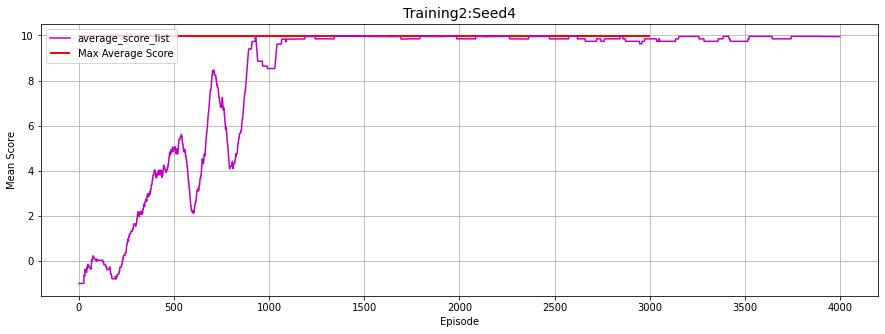

CPU times: user 38min 49s, sys: 2h 17min 12s, total: 2h 56min 2s
Wall time: 45min 10s


In [12]:
%%time

seed_number=5

for seed in range(seed_number):
    

                
    #Logged values


    scores = []
    step=[] 
    average_score_list=[]                                           #Saves last 100 average scores
    average_step_list=[]   
    scores_window = deque(maxlen=100)                               # Saves last 100 avarage solved steps
    step_window = deque(maxlen=100)                                 # last 100 scores

    #Hyperparamaters:

    n_episodes=4000
    max_t=500
    eps_start=1.0
    eps=eps_start
    eps_end=0.01 
    eps_decay=0.995
    #BETA = 0.025 For comparable experiment with DQN Beta bonus values is not used


    #Call SR function
    agent = SR_Agent(state_size, action_size, seed)
     
    #Load weights:    
    if seed == 0:
        print("Brain Loaded for Train_2 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train1_Seed0.pth'))
    if seed == 1:
        print("Brain Loaded for Train_2 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train1_Seed1.pth'))
    if seed == 2:
        print("Brain Loaded for Training 2 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train1_Seed2.pth'))
    if seed == 3:
        print("Brain Loaded for Training 2 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train1_Seed3.pth'))
    if seed == 4:
        print("Brain Saved for Training 2 in seed",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train1_Seed4.pth'))


    env.reset()
    
    for episode in range(1,n_episodes+1):

        dones=np.asarray([False])
        #Reset environment for each episode:
        env.reset()
        #Get information from reset environment:
        decision_steps, terminal_steps = env.get_steps(behavior_name)
        # get initial state of the unity environment
        state = decision_steps.obs[0]
        #Score list containing scores from each episode:
        score = 0
        mean_score=[]
        for i in range(max_t):


            action,r_int = agent.parallel_act(state, eps)        #action as numpy.int64
            action_fixed=np.array([action])
            action_tuple = ActionTuple()
            action_tuple.add_discrete(action_fixed)

            #Set action information
            env.set_actions(behavior_name,action_tuple)
            # Move the simulation forward
            env.step()
            # Get the new simulation results
            decision_steps, terminal_steps = env.get_steps(behavior_name)
            # get the next states for each unity agent in the environment
            next_state = decision_steps.obs[0]

            # get the rewards for each unity agent in the environment
            rewards = decision_steps.reward
            
            #Adjust r
            #r = np.asarray(rewards) + BETA * np.asarray(r_int)

            #If episode dones:
            if(len(terminal_steps.reward)!=0):

                        dones= np.asarray([True])
                        rewards= terminal_steps.reward
                        r = np.asarray(rewards) + BETA * np.asarray(r_int)
                        next_state = terminal_steps.obs[0]




            #Send (S, A, R, S') info to the training agent for replay buffer (memory) and network updates
            agent.step(state, action, rewards, next_state,dones)

            #New state is the next state:
            state = next_state

            #Iterate rewards on score
            score += rewards


            if rewards > 0:
                print("Task solved in step:",i)
                print("Score:",score)


            if dones== np.asarray([True]):

                break


        #Decrease epsilon parameter step by step:
        eps = max(eps_end, eps_decay*eps) 

        #Save last step
        step.append(i)
        # save last steps for window for average 100:        
        step_window.append(i)
        #Create list for avarge 100 scores
        average_step_list.append(np.mean(step_window))

        # save most recent score:
        scores.append(score)
        # save most recent score for window for average 100:        
        scores_window.append(score)  
        #Create list for avarge 100 scores
        average_score_list.append(np.mean(scores_window))



        print('\rEpisode {}\tAverage Score: {:.6f},\tAverage Step: {}'.format(episode, np.mean(scores_window),np.mean(step_window)), end="")
       
        if episode % 1000 == 0:
    
            if seed == 0:
                print("Brain Saved for Train_2 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train2_Seed0.pth')
            if seed == 1:
                print("Brain Saved for Train_2 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train2_Seed1.pth')
            if seed == 2:
                print("Brain Saved for Train_2 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train2_Seed2.pth')
            if seed == 3:
                print("Brain Saved for Train_1 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train2_Seed3.pth')

            if seed == 4:
                print("Brain Saved for Train_1 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train2_Seed4.pth')
                
                
                

    #Save datas per each seed
    score_shape=len(scores)
    df= pd.DataFrame(list(zip(np.array(scores).reshape(score_shape).tolist(), average_score_list, step,average_step_list)), columns= ['Scores','Mean_Scores','Completed_Steps','MeanCompleted_Steps'])
    df.to_csv('Train_2_Seed_'+str(seed)+'.csv')
    
    #Plot mean reward:
    color=["b","g","r","c","m"]
    plt.rcParams['figure.figsize'] = [15,5]
    plt.plot(np.arange(len(average_score_list)), average_score_list,label="average_score_list",color=color[seed])
    plt.hlines(y=max(average_score_list), xmin=0, xmax=3000, colors='red', linestyles='-', lw=2, label='Max Average Score')
    plt.xlabel('Episode', fontsize=10)
    plt.ylabel('Mean Score', fontsize=10)
    plt.title("Training2:Seed{}".format(seed),fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.savefig("Training2:Seed{}.png".format(seed))
    plt.show()
    
    



# Third training:Default

In [13]:
env.close()

In [14]:
default_file="HER_3_no.app"
alternative_file="HER_3_no_alternate.app"
default_logged="HER_3_no_log.app"
channel = EngineConfigurationChannel()
env = UnityEnvironment(file_name=default_file,worker_id=0,side_channels=[channel])
channel.set_configuration_parameters(time_scale = 100.0)
# get the behavior:
env.reset()
behavior_name = list(env.behavior_specs)[0]
print(behavior_name)
spec = env.behavior_specs[behavior_name]
# reset the environment
env.reset()
decision_steps, terminal_steps = env.get_steps(behavior_name)

for action, branch_size in enumerate(spec.action_spec.discrete_branches):
    print(f"Action number {action} has {branch_size} different options")
    
action_size=branch_size    
print('Number of actions:', action_size)

# examine the state space 
state=decision_steps.obs[0][0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)
print('States have length:', type(state))
env.reset()

HERTask_2?team=0
Action number 0 has 5 different options
Number of actions: 5
States look like: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.         0.         0.         0.
 0.         0.         0.         0.46935856 0.         1.
 0.         0.         0.         0.         0.         0.52897596
 0.         1.         0.         0.         0.         0.
 0.         0.52897596 0.         1.         0.         0.
 0.         0.         0.         0.7077888  0.         1.
 0.        

Brain Saved for Training 3 in seed 4
Episode 16	Average Score: -0.998194,	Average Step: 499.0Task solved in step: 429
Score: [9.141804]
Episode 18	Average Score: -0.434861,	Average Step: 495.11111111111116Task solved in step: 344
Score: [9.312402]
Episode 89	Average Score: -0.768412,	Average Step: 496.47191011235956Task solved in step: 482
Score: [9.036205]
Episode 96	Average Score: -0.680642,	Average Step: 496.47916666666677Task solved in step: 308
Score: [9.384401]
Episode 105	Average Score: -0.589518,	Average Step: 494.6726262626264Task solved in step: 328
Score: [9.344801]
Episode 106	Average Score: -0.486088,	Average Step: 492.96Task solved in step: 447
Score: [9.106804]
Episode 115	Average Score: -0.385038,	Average Step: 492.44Task solved in step: 249
Score: [9.502399]
Episode 117	Average Score: -0.381432,	Average Step: 490.64Task solved in step: 346
Score: [9.308802]
Episode 121	Average Score: -0.381468,	Average Step: 490.66Task solved in step: 275
Score: [9.4512005]
Episode 130

Episode 419	Average Score: 3.115608,	Average Step: 392.27Task solved in step: 62
Score: [9.8776]
Episode 422	Average Score: 3.018742,	Average Step: 390.73Task solved in step: 126
Score: [9.7478]
Episode 424	Average Score: 3.126202,	Average Step: 386.97Task solved in step: 175
Score: [9.65]
Episode 426	Average Score: 3.018470,	Average Step: 390.83Task solved in step: 85
Score: [9.829801]
Episode 427	Average Score: 3.126750,	Average Step: 386.69Task solved in step: 150
Score: [9.700999]
Episode 428	Average Score: 3.128642,	Average Step: 385.75Task solved in step: 251
Score: [9.4994]
Episode 429	Average Score: 3.233618,	Average Step: 383.27Task solved in step: 353
Score: [9.294003]
Episode 430	Average Score: 3.336540,	Average Step: 381.81Task solved in step: 224
Score: [9.552199]
Episode 431	Average Score: 3.442043,	Average Step: 379.06Task solved in step: 117
Score: [9.766001]
Episode 433	Average Score: 3.549685,	Average Step: 375.24Task solved in step: 419
Score: [9.162404]
Episode 434	

Episode 585	Average Score: 3.987181,	Average Step: 356.55Task solved in step: 161
Score: [9.6782]
Episode 587	Average Score: 4.093945,	Average Step: 353.17Task solved in step: 86
Score: [9.828]
Episode 589	Average Score: 4.095801,	Average Step: 352.24Task solved in step: 246
Score: [9.508799]
Episode 590	Average Score: 4.094605,	Average Step: 352.84Task solved in step: 178
Score: [9.6446]
Episode 591	Average Score: 4.098455,	Average Step: 350.91Task solved in step: 88
Score: [9.8248]
Episode 593	Average Score: 4.100807,	Average Step: 349.73Task solved in step: 69
Score: [9.863]
Episode 594	Average Score: 4.209419,	Average Step: 345.43Task solved in step: 84
Score: [9.8322]
Episode 597	Average Score: 4.213195,	Average Step: 343.54Task solved in step: 139
Score: [9.7218]
Episode 600	Average Score: 4.215715,	Average Step: 342.28Task solved in step: 157
Score: [9.6872]
Episode 601	Average Score: 4.214723,	Average Step: 342.78Task solved in step: 209
Score: [9.582]
Episode 602	Average Score

Episode 882	Average Score: 5.773511,	Average Step: 263.4Task solved in step: 80
Score: [9.8414]
Episode 883	Average Score: 5.881907,	Average Step: 259.21Task solved in step: 45
Score: [9.910001]
Episode 887	Average Score: 5.775352,	Average Step: 262.48Task solved in step: 260
Score: [9.480799]
Episode 889	Average Score: 5.775210,	Average Step: 262.55Task solved in step: 67
Score: [9.8661995]
Episode 890	Average Score: 5.775676,	Average Step: 262.31Task solved in step: 461
Score: [9.078404]
Episode 892	Average Score: 5.773157,	Average Step: 263.57Task solved in step: 115
Score: [9.7706]
Episode 893	Average Score: 5.880846,	Average Step: 259.73Task solved in step: 250
Score: [9.5004]
Episode 894	Average Score: 5.985831,	Average Step: 257.24Task solved in step: 48
Score: [9.9038]
Episode 895	Average Score: 6.094851,	Average Step: 252.73Task solved in step: 56
Score: [9.8886]
Episode 898	Average Score: 5.989697,	Average Step: 255.35Task solved in step: 440
Score: [9.119804]
Episode 899	Ave

Episode 1022	Average Score: 5.707376,	Average Step: 246.49Task solved in step: 84
Score: [9.832001]
Episode 1023	Average Score: 5.706682,	Average Step: 246.83Task solved in step: 84
Score: [9.833]
Episode 1024	Average Score: 5.706355,	Average Step: 247.0Task solved in step: 291
Score: [9.418001]
Episode 1025	Average Score: 5.810517,	Average Step: 244.92Task solved in step: 80
Score: [9.8404]
Episode 1026	Average Score: 5.918902,	Average Step: 240.73Task solved in step: 146
Score: [9.7084]
Episode 1027	Average Score: 6.025968,	Average Step: 237.2Task solved in step: 168
Score: [9.6656]
Episode 1028	Average Score: 6.023472,	Average Step: 238.45Task solved in step: 56
Score: [9.8880005]
Episode 1029	Average Score: 6.023384,	Average Step: 238.49Task solved in step: 31
Score: [9.938601]
Episode 1030	Average Score: 6.024586,	Average Step: 237.89Task solved in step: 84
Score: [9.8336]
Episode 1031	Average Score: 6.132904,	Average Step: 233.74Task solved in step: 132
Score: [9.7369995]
Episode

Episode 1151	Average Score: 5.515567,	Average Step: 242.4Task solved in step: 132
Score: [9.737599]
Episode 1153	Average Score: 5.513489,	Average Step: 243.44Task solved in step: 27
Score: [9.9458]
Episode 1154	Average Score: 5.514265,	Average Step: 243.05Task solved in step: 34
Score: [9.9326]
Episode 1155	Average Score: 5.623572,	Average Step: 238.4Task solved in step: 48
Score: [9.904]
Episode 1156	Average Score: 5.732594,	Average Step: 233.89Task solved in step: 24
Score: [9.9532]
Episode 1157	Average Score: 5.842108,	Average Step: 229.14Task solved in step: 24
Score: [9.9532]
Episode 1158	Average Score: 5.951622,	Average Step: 224.39Task solved in step: 45
Score: [9.911]
Episode 1161	Average Score: 5.952522,	Average Step: 223.94Task solved in step: 26
Score: [9.9494]
Episode 1162	Average Score: 6.061999,	Average Step: 219.21Task solved in step: 34
Score: [9.933]
Episode 1163	Average Score: 6.171310,	Average Step: 214.56Task solved in step: 34
Score: [9.9324]
Episode 1164	Average S

Episode 1356	Average Score: 7.996655,	Average Step: 151.92Task solved in step: 54
Score: [9.893]
Episode 1357	Average Score: 7.996525,	Average Step: 151.99Task solved in step: 25
Score: [9.9502]
Episode 1358	Average Score: 7.996572,	Average Step: 151.96Task solved in step: 58
Score: [9.8844]
Episode 1359	Average Score: 7.996031,	Average Step: 152.23Task solved in step: 79
Score: [9.8434]
Episode 1360	Average Score: 7.996571,	Average Step: 151.96Task solved in step: 68
Score: [9.8656]
Episode 1362	Average Score: 7.996232,	Average Step: 152.13Task solved in step: 95
Score: [9.8098]
Episode 1363	Average Score: 7.994932,	Average Step: 152.78Task solved in step: 25
Score: [9.9502]
Episode 1364	Average Score: 7.995035,	Average Step: 152.73Task solved in step: 273
Score: [9.4552]
Episode 1365	Average Score: 7.992357,	Average Step: 154.07Task solved in step: 62
Score: [9.8772]
Episode 1366	Average Score: 7.995747,	Average Step: 152.38Task solved in step: 66
Score: [9.8692]
Episode 1367	Average

Episode 1550	Average Score: 8.469667,	Average Step: 115.47Task solved in step: 37
Score: [9.9262]
Episode 1551	Average Score: 8.578911,	Average Step: 110.85Task solved in step: 37
Score: [9.927401]
Episode 1552	Average Score: 8.579043,	Average Step: 110.79Task solved in step: 68
Score: [9.8646]
Episode 1553	Average Score: 8.687672,	Average Step: 106.48Task solved in step: 47
Score: [9.9064]
Episode 1554	Average Score: 8.687421,	Average Step: 106.6Task solved in step: 58
Score: [9.8838005]
Episode 1555	Average Score: 8.687122,	Average Step: 106.74Task solved in step: 24
Score: [9.9518]
Episode 1556	Average Score: 8.687494,	Average Step: 106.55Task solved in step: 23
Score: [9.955]
Episode 1558	Average Score: 8.578253,	Average Step: 111.17Task solved in step: 68
Score: [9.8647995]
Episode 1559	Average Score: 8.686884,	Average Step: 106.86Task solved in step: 57
Score: [9.887]
Episode 1560	Average Score: 8.795735,	Average Step: 102.44Task solved in step: 26
Score: [9.949599]
Episode 1561	

Episode 1776	Average Score: 6.510174,	Average Step: 195.12Task solved in step: 70
Score: [9.861401]
Episode 1778	Average Score: 6.402670,	Average Step: 198.87Task solved in step: 43
Score: [9.9138]
Episode 1779	Average Score: 6.402309,	Average Step: 199.05Task solved in step: 35
Score: [9.9306]
Episode 1780	Average Score: 6.402121,	Average Step: 199.14Task solved in step: 68
Score: [9.8644]
Episode 1781	Average Score: 6.401384,	Average Step: 199.51Task solved in step: 56
Score: [9.8894005]
Episode 1784	Average Score: 6.292725,	Average Step: 203.84Task solved in step: 26
Score: [9.949599]
Episode 1785	Average Score: 6.292952,	Average Step: 203.73Task solved in step: 102
Score: [9.7974]
Episode 1787	Average Score: 6.184828,	Average Step: 207.79Task solved in step: 56
Score: [9.8880005]
Episode 1788	Average Score: 6.184647,	Average Step: 207.88Task solved in step: 47
Score: [9.9066]
Episode 1789	Average Score: 6.184945,	Average Step: 207.73Task solved in step: 68
Score: [9.8656]
Episode 1

Episode 1974	Average Score: 8.039423,	Average Step: 130.58Task solved in step: 22
Score: [9.9567995]
Episode 1975	Average Score: 8.039927,	Average Step: 130.33Task solved in step: 41
Score: [9.919]
Episode 1976	Average Score: 8.040035,	Average Step: 130.28Task solved in step: 30
Score: [9.9408]
Episode 1978	Average Score: 7.931876,	Average Step: 134.35Task solved in step: 111
Score: [9.7778]
Episode 1979	Average Score: 7.933121,	Average Step: 133.72Task solved in step: 31
Score: [9.939]
Episode 1980	Average Score: 7.934339,	Average Step: 133.11Task solved in step: 35
Score: [9.93]
Episode 1981	Average Score: 7.934969,	Average Step: 132.79Task solved in step: 87
Score: [9.8272]
Episode 1982	Average Score: 7.934265,	Average Step: 133.14Task solved in step: 26
Score: [9.949599]
Episode 1983	Average Score: 7.934465,	Average Step: 133.04Task solved in step: 42
Score: [9.9158]
Episode 1984	Average Score: 7.934302,	Average Step: 133.12Task solved in step: 30
Score: [9.9412]
Episode 1989	Avera

Episode 2183	Average Score: 7.702981,	Average Step: 148.76Task solved in step: 59
Score: [9.883]
Episode 2184	Average Score: 7.702975,	Average Step: 148.76Task solved in step: 55
Score: [9.891]
Episode 2185	Average Score: 7.702897,	Average Step: 148.8Task solved in step: 116
Score: [9.7686]
Episode 2186	Average Score: 7.701191,	Average Step: 149.65Task solved in step: 267
Score: [9.4668]
Episode 2187	Average Score: 7.805841,	Average Step: 147.33Task solved in step: 25
Score: [9.950601]
Episode 2189	Average Score: 7.806222,	Average Step: 147.14Task solved in step: 51
Score: [9.8996]
Episode 2190	Average Score: 7.915200,	Average Step: 142.66Task solved in step: 60
Score: [9.88]
Episode 2191	Average Score: 8.023981,	Average Step: 138.27Task solved in step: 35
Score: [9.9307995]
Episode 2193	Average Score: 7.915715,	Average Step: 142.4Task solved in step: 41
Score: [9.9186]
Episode 2194	Average Score: 7.915881,	Average Step: 142.32Task solved in step: 104
Score: [9.7928]
Episode 2195	Avera

Episode 2371	Average Score: 9.242232,	Average Step: 79.19Task solved in step: 25
Score: [9.950601]
Episode 2372	Average Score: 9.242402,	Average Step: 79.1Task solved in step: 48
Score: [9.9042]
Episode 2373	Average Score: 9.243582,	Average Step: 78.51Task solved in step: 25
Score: [9.951]
Episode 2374	Average Score: 9.243738,	Average Step: 78.43Task solved in step: 32
Score: [9.9376]
Episode 2375	Average Score: 9.244031,	Average Step: 78.29Task solved in step: 32
Score: [9.9376]
Episode 2376	Average Score: 9.244141,	Average Step: 78.24Task solved in step: 41
Score: [9.918799]
Episode 2377	Average Score: 9.244348,	Average Step: 78.14Task solved in step: 34
Score: [9.9332]
Episode 2378	Average Score: 9.244431,	Average Step: 78.1Task solved in step: 26
Score: [9.949599]
Episode 2379	Average Score: 9.244687,	Average Step: 77.98Task solved in step: 77
Score: [9.846601]
Episode 2380	Average Score: 9.243643,	Average Step: 78.5Task solved in step: 38
Score: [9.9252]
Episode 2381	Average Score

Episode 2556	Average Score: 8.785110,	Average Step: 107.73Task solved in step: 64
Score: [9.8724]
Episode 2557	Average Score: 8.784400,	Average Step: 108.08Task solved in step: 59
Score: [9.883401]
Episode 2559	Average Score: 8.675685,	Average Step: 112.43Task solved in step: 63
Score: [9.8746]
Episode 2560	Average Score: 8.784412,	Average Step: 108.07Task solved in step: 69
Score: [9.8626]
Episode 2561	Average Score: 8.784009,	Average Step: 108.27Task solved in step: 49
Score: [9.9028]
Episode 2562	Average Score: 8.893018,	Average Step: 103.77Task solved in step: 25
Score: [9.951]
Episode 2563	Average Score: 8.893083,	Average Step: 103.74Task solved in step: 53
Score: [9.895599]
Episode 2564	Average Score: 8.892919,	Average Step: 103.83Task solved in step: 45
Score: [9.911]
Episode 2566	Average Score: 8.783375,	Average Step: 108.67Task solved in step: 51
Score: [9.8996]
Episode 2567	Average Score: 8.783624,	Average Step: 108.48Task solved in step: 43
Score: [9.9152]
Episode 2568	Avera

Episode 2742	Average Score: 8.919004,	Average Step: 90.78Task solved in step: 160
Score: [9.6804]
Episode 2743	Average Score: 9.025791,	Average Step: 87.39Task solved in step: 122
Score: [9.7576]
Episode 2744	Average Score: 9.024015,	Average Step: 88.28Task solved in step: 63
Score: [9.8748]
Episode 2745	Average Score: 9.023365,	Average Step: 88.61Task solved in step: 25
Score: [9.951]
Episode 2746	Average Score: 9.023793,	Average Step: 88.4Task solved in step: 42
Score: [9.9162]
Episode 2747	Average Score: 9.023404,	Average Step: 88.59Task solved in step: 31
Score: [9.938601]
Episode 2748	Average Score: 9.025066,	Average Step: 87.76Task solved in step: 30
Score: [9.9398]
Episode 2749	Average Score: 9.028234,	Average Step: 86.17Task solved in step: 26
Score: [9.949599]
Episode 2751	Average Score: 9.028484,	Average Step: 86.05Task solved in step: 25
Score: [9.951]
Episode 2752	Average Score: 9.028787,	Average Step: 85.9Task solved in step: 48
Score: [9.905]
Episode 2753	Average Score: 9

Episode 2929	Average Score: 8.264342,	Average Step: 118.16Task solved in step: 103
Score: [9.7956]
Episode 2930	Average Score: 8.270205,	Average Step: 115.23Task solved in step: 38
Score: [9.9252]
Episode 2931	Average Score: 8.270741,	Average Step: 114.96Task solved in step: 27
Score: [9.9458]
Episode 2932	Average Score: 8.270697,	Average Step: 114.98Task solved in step: 59
Score: [9.8824005]
Episode 2933	Average Score: 8.270044,	Average Step: 115.3Task solved in step: 38
Score: [9.9252]
Episode 2934	Average Score: 8.269786,	Average Step: 115.43Task solved in step: 38
Score: [9.9252]
Episode 2935	Average Score: 8.269535,	Average Step: 115.56Task solved in step: 35
Score: [9.9307995]
Episode 2936	Average Score: 8.269334,	Average Step: 115.66Task solved in step: 42
Score: [9.9158]
Episode 2937	Average Score: 8.269015,	Average Step: 115.81Task solved in step: 31
Score: [9.939]
Episode 2938	Average Score: 8.269702,	Average Step: 115.47Task solved in step: 27
Score: [9.9474]
Episode 2939	Av

Episode 3112	Average Score: 8.726040,	Average Step: 87.32Task solved in step: 27
Score: [9.947599]
Episode 3113	Average Score: 8.726006,	Average Step: 87.34Task solved in step: 26
Score: [9.949599]
Episode 3114	Average Score: 8.725992,	Average Step: 87.35Task solved in step: 102
Score: [9.7964]
Episode 3115	Average Score: 8.724638,	Average Step: 88.03Task solved in step: 26
Score: [9.949599]
Episode 3116	Average Score: 8.724624,	Average Step: 88.04Task solved in step: 25
Score: [9.951]
Episode 3117	Average Score: 8.834116,	Average Step: 83.3Task solved in step: 27
Score: [9.947599]
Episode 3118	Average Score: 8.834095,	Average Step: 83.31Task solved in step: 27
Score: [9.947599]
Episode 3119	Average Score: 8.834075,	Average Step: 83.32Task solved in step: 27
Score: [9.947599]
Episode 3120	Average Score: 8.834055,	Average Step: 83.33Task solved in step: 32
Score: [9.936601]
Episode 3121	Average Score: 8.833941,	Average Step: 83.39Task solved in step: 25
Score: [9.951]
Episode 3122	Avera

Episode 3202	Average Score: 9.057166,	Average Step: 71.78Task solved in step: 36
Score: [9.9286]
Episode 3203	Average Score: 9.057060,	Average Step: 71.83Task solved in step: 25
Score: [9.951]
Episode 3204	Average Score: 9.057226,	Average Step: 71.75Task solved in step: 34
Score: [9.932799]
Episode 3205	Average Score: 9.166535,	Average Step: 67.1Task solved in step: 35
Score: [9.9316]
Episode 3206	Average Score: 9.166950,	Average Step: 66.9Task solved in step: 33
Score: [9.934999]
Episode 3207	Average Score: 9.166834,	Average Step: 66.96Task solved in step: 38
Score: [9.9252]
Episode 3208	Average Score: 9.166584,	Average Step: 67.09Task solved in step: 34
Score: [9.932799]
Episode 3209	Average Score: 9.275894,	Average Step: 62.44Task solved in step: 34
Score: [9.932799]
Episode 3210	Average Score: 9.275732,	Average Step: 62.52Task solved in step: 26
Score: [9.948199]
Episode 3211	Average Score: 9.275738,	Average Step: 62.51Task solved in step: 26
Score: [9.948199]
Episode 3212	Average 

Episode 3373	Average Score: 9.714348,	Average Step: 43.18Task solved in step: 25
Score: [9.951]
Episode 3374	Average Score: 9.714348,	Average Step: 43.18Task solved in step: 25
Score: [9.951]
Episode 3375	Average Score: 9.714627,	Average Step: 43.04Task solved in step: 32
Score: [9.936001]
Episode 3376	Average Score: 9.714486,	Average Step: 43.11Task solved in step: 25
Score: [9.951]
Episode 3377	Average Score: 9.714547,	Average Step: 43.08Task solved in step: 37
Score: [9.9276]
Episode 3378	Average Score: 9.823806,	Average Step: 38.46Task solved in step: 25
Score: [9.951]
Episode 3379	Average Score: 9.824096,	Average Step: 38.32Task solved in step: 26
Score: [9.949599]
Episode 3380	Average Score: 9.824185,	Average Step: 38.28Task solved in step: 29
Score: [9.9422]
Episode 3381	Average Score: 9.824106,	Average Step: 38.32Task solved in step: 42
Score: [9.9166]
Episode 3382	Average Score: 9.823970,	Average Step: 38.39Task solved in step: 30
Score: [9.9406]
Episode 3383	Average Score: 9.

Episode 3545	Average Score: 9.716959,	Average Step: 41.97Task solved in step: 31
Score: [9.9378]
Episode 3546	Average Score: 9.716907,	Average Step: 41.99Task solved in step: 41
Score: [9.919]
Episode 3547	Average Score: 9.716652,	Average Step: 42.12Task solved in step: 26
Score: [9.948]
Episode 3548	Average Score: 9.716681,	Average Step: 42.1Task solved in step: 26
Score: [9.948]
Episode 3549	Average Score: 9.716671,	Average Step: 42.1Task solved in step: 44
Score: [9.9122]
Episode 3550	Average Score: 9.716303,	Average Step: 42.28Task solved in step: 25
Score: [9.951]
Episode 3551	Average Score: 9.716303,	Average Step: 42.28Task solved in step: 36
Score: [9.9284]
Episode 3552	Average Score: 9.716126,	Average Step: 42.37Task solved in step: 79
Score: [9.842799]
Episode 3553	Average Score: 9.715082,	Average Step: 42.89Task solved in step: 46
Score: [9.908]
Episode 3554	Average Score: 9.714838,	Average Step: 43.01Task solved in step: 41
Score: [9.919]
Episode 3555	Average Score: 9.714763

Episode 3632	Average Score: 9.603115,	Average Step: 48.91Task solved in step: 25
Score: [9.951]
Episode 3633	Average Score: 9.603116,	Average Step: 48.91Task solved in step: 29
Score: [9.9424]
Episode 3634	Average Score: 9.603030,	Average Step: 48.95Task solved in step: 24
Score: [9.9524]
Episode 3635	Average Score: 9.603044,	Average Step: 48.94Task solved in step: 25
Score: [9.951]
Episode 3636	Average Score: 9.603044,	Average Step: 48.94Task solved in step: 25
Score: [9.951]
Episode 3637	Average Score: 9.603044,	Average Step: 48.94Task solved in step: 25
Score: [9.951]
Episode 3638	Average Score: 9.603044,	Average Step: 48.94Task solved in step: 26
Score: [9.949599]
Episode 3639	Average Score: 9.603029,	Average Step: 48.95Task solved in step: 26
Score: [9.949599]
Episode 3640	Average Score: 9.712507,	Average Step: 44.22Task solved in step: 26
Score: [9.949599]
Episode 3641	Average Score: 9.712508,	Average Step: 44.22Task solved in step: 51
Score: [9.8982]
Episode 3642	Average Score: 

Episode 3802	Average Score: 9.815351,	Average Step: 42.67Task solved in step: 28
Score: [9.9438]
Episode 3803	Average Score: 9.815338,	Average Step: 42.67Task solved in step: 31
Score: [9.9396]
Episode 3804	Average Score: 9.815281,	Average Step: 42.7Task solved in step: 41
Score: [9.9192]
Episode 3805	Average Score: 9.815198,	Average Step: 42.74Task solved in step: 47
Score: [9.907]
Episode 3806	Average Score: 9.814771,	Average Step: 42.95Task solved in step: 36
Score: [9.928]
Episode 3807	Average Score: 9.815251,	Average Step: 42.71Task solved in step: 27
Score: [9.9474]
Episode 3808	Average Score: 9.815229,	Average Step: 42.72Task solved in step: 25
Score: [9.9502]
Episode 3809	Average Score: 9.815213,	Average Step: 42.73Task solved in step: 27
Score: [9.946199]
Episode 3810	Average Score: 9.815158,	Average Step: 42.76Task solved in step: 25
Score: [9.9502]
Episode 3811	Average Score: 9.815165,	Average Step: 42.75Task solved in step: 25
Score: [9.9502]
Episode 3812	Average Score: 9.8

Episode 3975	Average Score: 9.587880,	Average Step: 56.39Task solved in step: 49
Score: [9.902]
Episode 3976	Average Score: 9.587390,	Average Step: 56.63Task solved in step: 28
Score: [9.9438]
Episode 3977	Average Score: 9.587318,	Average Step: 56.66Task solved in step: 94
Score: [9.8118]
Episode 3978	Average Score: 9.585926,	Average Step: 57.35Task solved in step: 44
Score: [9.9118]
Episode 3979	Average Score: 9.585771,	Average Step: 57.42Task solved in step: 26
Score: [9.948999]
Episode 3980	Average Score: 9.585736,	Average Step: 57.44Task solved in step: 64
Score: [9.8718]
Episode 3981	Average Score: 9.584945,	Average Step: 57.83Task solved in step: 25
Score: [9.951]
Episode 3982	Average Score: 9.584945,	Average Step: 57.83Task solved in step: 53
Score: [9.8949995]
Episode 3983	Average Score: 9.584385,	Average Step: 58.11Task solved in step: 54
Score: [9.8934]
Episode 3984	Average Score: 9.583809,	Average Step: 58.4Task solved in step: 199
Score: [9.6032]
Episode 3985	Average Score:

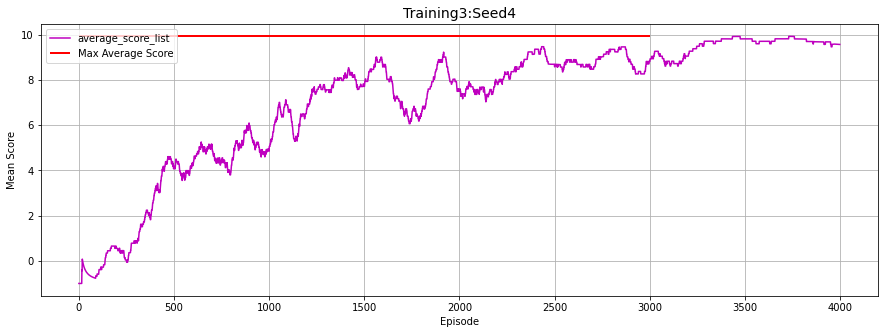

CPU times: user 1h 13min 41s, sys: 3h 32min 19s, total: 4h 46min
Wall time: 1h 14min 27s


In [23]:
%%time

seed_number=5

for seed in range(seed_number):
    

                
    #Logged values


    scores = []
    step=[] 
    average_score_list=[]                                           #Saves last 100 average scores
    average_step_list=[]   
    scores_window = deque(maxlen=100)                               # Saves last 100 avarage solved steps
    step_window = deque(maxlen=100)                                 # last 100 scores

    #Hyperparamaters:

    n_episodes=4000
    max_t=500
    eps_start=1.0
    eps=eps_start
    eps_end=0.01 
    eps_decay=0.995
    #BETA = 0.025 For comparable experiment with DQN Beta bonus values is not used


    #Call SR function
    agent = SR_Agent(state_size, action_size, seed)
     
    #Load weights:    
    if seed == 0:
        print("Brain Loaded for Train_3 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train2_Seed0.pth'))
    if seed == 1:
        print("Brain Loaded for Train_3 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train2_Seed1.pth'))
    if seed == 2:
        print("Brain Loaded for Training 3 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train2_Seed2.pth'))
    if seed == 3:
        print("Brain Loaded for Training 3 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train2_Seed3.pth'))
    if seed == 4:
        print("Brain Saved for Training 3 in seed",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train2_Seed4.pth'))


    env.reset()
    for episode in range(1,n_episodes+1):

        dones=np.asarray([False])
        #Reset environment for each episode:
        env.reset()
        #Get information from reset environment:
        decision_steps, terminal_steps = env.get_steps(behavior_name)
        # get initial state of the unity environment
        state = decision_steps.obs[0]
        #Score list containing scores from each episode:
        score = 0
        mean_score=[]
        for i in range(max_t):


            action,r_int = agent.parallel_act(state, eps)        #action as numpy.int64
            action_fixed=np.array([action])
            action_tuple = ActionTuple()
            action_tuple.add_discrete(action_fixed)

            #Set action information
            env.set_actions(behavior_name,action_tuple)
            # Move the simulation forward
            env.step()
            # Get the new simulation results
            decision_steps, terminal_steps = env.get_steps(behavior_name)
            # get the next states for each unity agent in the environment
            next_state = decision_steps.obs[0]

            # get the rewards for each unity agent in the environment
            rewards = decision_steps.reward
            
            #Adjust r
            #r = np.asarray(rewards) + BETA * np.asarray(r_int)

            #If episode dones:
            if(len(terminal_steps.reward)!=0):

                        dones= np.asarray([True])
                        rewards= terminal_steps.reward
                        r = np.asarray(rewards) + BETA * np.asarray(r_int)
                        next_state = terminal_steps.obs[0]




            #Send (S, A, R, S') info to the training agent for replay buffer (memory) and network updates
            agent.step(state, action, rewards, next_state,dones)

            #New state is the next state:
            state = next_state

            #Iterate rewards on score
            score += rewards


            if rewards > 0:
                print("Task solved in step:",i)
                print("Score:",score)


            if dones== np.asarray([True]):

                break


        #Decrease epsilon parameter step by step:
        eps = max(eps_end, eps_decay*eps) 

        #Save last step
        step.append(i)
        # save last steps for window for average 100:        
        step_window.append(i)
        #Create list for avarge 100 scores
        average_step_list.append(np.mean(step_window))

        # save most recent score:
        scores.append(score)
        # save most recent score for window for average 100:        
        scores_window.append(score)  
        #Create list for avarge 100 scores
        average_score_list.append(np.mean(scores_window))



        print('\rEpisode {}\tAverage Score: {:.6f},\tAverage Step: {}'.format(episode, np.mean(scores_window),np.mean(step_window)), end="")
       
        if episode % 1000 == 0:
    
            if seed == 0:
                print("Brain Saved for Training 3 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train3_Seed0.pth')
            if seed == 1:
                print("Brain Saved for Training 3 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train3_Seed1.pth')
            if seed == 2:
                print("Brain Saved for Training 3 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train3_Seed2.pth')
            if seed == 3:
                print("Brain Saved for Training 3 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train3_Seed3.pth')

            if seed == 4:
                print("Brain Saved for Training 3 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train3_Seed4.pth')
                
                
                

    #Save datas per each seed
    score_shape=len(scores)
    df= pd.DataFrame(list(zip(np.array(scores).reshape(score_shape).tolist(), average_score_list, step,average_step_list)), columns= ['Scores','Mean_Scores','Completed_Steps','MeanCompleted_Steps'])
    df.to_csv('Train_3_Seed_'+str(seed)+'.csv')
    
    #Plot mean reward:
    color=["b","g","r","c","m"]
    plt.rcParams['figure.figsize'] = [15,5]
    plt.plot(np.arange(len(average_score_list)), average_score_list,label="average_score_list",color=color[seed])
    plt.hlines(y=max(average_score_list), xmin=0, xmax=3000, colors='red', linestyles='-', lw=2, label='Max Average Score')
    plt.xlabel('Episode', fontsize=10)
    plt.ylabel('Mean Score', fontsize=10)
    plt.title("Training3:Seed{}".format(seed),fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.savefig("Training3:Seed{}.png".format(seed))
    plt.show()
    
    




# 4-) Fourth training:Alternative Door

In [24]:
env.close()

In [25]:
default_file="HER_3_no.app"
alternative_file="HER_3_no_alternate.app"
default_logged="HER_3_no_log.app"
channel = EngineConfigurationChannel()
env = UnityEnvironment(file_name=alternative_file,worker_id=0,side_channels=[channel])
channel.set_configuration_parameters(time_scale = 100.0)
# get the behavior:
env.reset()
behavior_name = list(env.behavior_specs)[0]
print(behavior_name)
spec = env.behavior_specs[behavior_name]
# reset the environment
env.reset()
decision_steps, terminal_steps = env.get_steps(behavior_name)

for action, branch_size in enumerate(spec.action_spec.discrete_branches):
    print(f"Action number {action} has {branch_size} different options")
    
action_size=branch_size    
print('Number of actions:', action_size)

# examine the state space 
state=decision_steps.obs[0][0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)
print('States have length:', type(state))
env.reset()

HERTask_2?team=0
Action number 0 has 5 different options
Number of actions: 5
States look like: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.         0.         0.         0.
 0.         0.         0.         0.46935856 0.         1.
 0.         0.         0.         0.         0.         0.52897596
 0.         1.         0.         0.         0.         0.
 0.         0.5289759  0.         1.         0.         0.
 0.         0.         0.         0.707789   0.         1.
 0.        

Brain Loaded for Training 4 in seed: 2
Episode 58	Average Score: -0.998194,	Average Step: 499.0Task solved in step: 387
Score: [9.226004]
Episode 104	Average Score: -0.895952,	Average Step: 497.8868686868693Task solved in step: 177
Score: [9.646199]
Episode 120	Average Score: -0.789508,	Average Step: 494.66Task solved in step: 356
Score: [9.288603]
Episode 126	Average Score: -0.686640,	Average Step: 493.23Task solved in step: 359
Score: [9.282202]
Episode 137	Average Score: -0.583836,	Average Step: 491.83Task solved in step: 210
Score: [9.581599]
Episode 140	Average Score: -0.478038,	Average Step: 488.94Task solved in step: 414
Score: [9.172203]
Episode 143	Average Score: -0.376334,	Average Step: 488.09Task solved in step: 417
Score: [9.165804]
Episode 144	Average Score: -0.274694,	Average Step: 487.27Task solved in step: 304
Score: [9.392601]
Episode 150	Average Score: -0.170786,	Average Step: 485.32Task solved in step: 329
Score: [9.341802]
Episode 151	Average Score: -0.067386,	Avera

Episode 402	Average Score: 2.559568,	Average Step: 420.24Task solved in step: 476
Score: [9.048805]
Episode 404	Average Score: 2.557014,	Average Step: 421.52Task solved in step: 120
Score: [9.7602]
Episode 408	Average Score: 2.455564,	Average Step: 422.24Task solved in step: 177
Score: [9.646999]
Episode 409	Average Score: 2.562016,	Average Step: 419.02Task solved in step: 418
Score: [9.165604]
Episode 413	Average Score: 2.454476,	Average Step: 422.79Task solved in step: 165
Score: [9.6706]
Episode 415	Average Score: 2.457700,	Average Step: 421.18Task solved in step: 381
Score: [9.239002]
Episode 416	Average Score: 2.560072,	Average Step: 420.0Task solved in step: 182
Score: [9.637599]
Episode 422	Average Score: 2.461342,	Average Step: 419.37Task solved in step: 228
Score: [9.545199]
Episode 423	Average Score: 2.566776,	Average Step: 416.66Task solved in step: 244
Score: [9.512799]
Episode 426	Average Score: 2.565854,	Average Step: 417.12Task solved in step: 272
Score: [9.4562]
Episode

Episode 563	Average Score: 4.932433,	Average Step: 333.97Task solved in step: 169
Score: [9.662399]
Episode 565	Average Score: 4.825473,	Average Step: 337.44Task solved in step: 246
Score: [9.508199]
Episode 567	Average Score: 4.930537,	Average Step: 334.91Task solved in step: 74
Score: [9.8534]
Episode 568	Average Score: 4.932810,	Average Step: 333.78Task solved in step: 290
Score: [9.4202]
Episode 569	Average Score: 4.931039,	Average Step: 334.66Task solved in step: 86
Score: [9.828799]
Episode 571	Average Score: 4.824358,	Average Step: 337.99Task solved in step: 78
Score: [9.8448]
Episode 574	Average Score: 4.724199,	Average Step: 338.07Task solved in step: 129
Score: [9.743]
Episode 576	Average Score: 4.616573,	Average Step: 341.88Task solved in step: 34
Score: [9.9321995]
Episode 578	Average Score: 4.509527,	Average Step: 345.46Task solved in step: 97
Score: [9.807401]
Episode 579	Average Score: 4.617583,	Average Step: 341.38Task solved in step: 117
Score: [9.766001]
Episode 581	A

Episode 730	Average Score: 4.367470,	Average Step: 316.41Task solved in step: 51
Score: [9.8996]
Episode 731	Average Score: 4.369235,	Average Step: 315.53Task solved in step: 208
Score: [9.583799]
Episode 732	Average Score: 4.365981,	Average Step: 317.15Task solved in step: 65
Score: [9.870001]
Episode 733	Average Score: 4.474663,	Average Step: 312.81Task solved in step: 252
Score: [9.497599]
Episode 734	Average Score: 4.579621,	Average Step: 310.34Task solved in step: 44
Score: [9.912001]
Episode 735	Average Score: 4.579752,	Average Step: 310.27Task solved in step: 22
Score: [9.9576]
Episode 736	Average Score: 4.579749,	Average Step: 310.28Task solved in step: 113
Score: [9.7754]
Episode 740	Average Score: 4.580191,	Average Step: 310.06Task solved in step: 21
Score: [9.959]
Episode 749	Average Score: 4.473737,	Average Step: 313.28Task solved in step: 83
Score: [9.8352]
Episode 750	Average Score: 4.474743,	Average Step: 312.78Task solved in step: 383
Score: [9.235602]
Episode 753	Avera

Episode 914	Average Score: 3.956781,	Average Step: 321.72Task solved in step: 72
Score: [9.8568]
Episode 916	Average Score: 3.857087,	Average Step: 321.56Task solved in step: 28
Score: [9.9438]
Episode 918	Average Score: 3.751387,	Average Step: 324.45Task solved in step: 32
Score: [9.937]
Episode 919	Average Score: 3.752229,	Average Step: 323.98Task solved in step: 32
Score: [9.937401]
Episode 920	Average Score: 3.752321,	Average Step: 323.94Task solved in step: 66
Score: [9.868]
Episode 925	Average Score: 3.424169,	Average Step: 338.01Task solved in step: 54
Score: [9.893]
Episode 926	Average Score: 3.533081,	Average Step: 333.55Task solved in step: 75
Score: [9.8508]
Episode 927	Average Score: 3.533085,	Average Step: 333.55Task solved in step: 156
Score: [9.689199]
Episode 931	Average Score: 3.424193,	Average Step: 338.0Task solved in step: 54
Score: [9.8921995]
Episode 933	Average Score: 3.424109,	Average Step: 338.04Task solved in step: 36
Score: [9.9296]
Episode 935	Average Score:

Episode 1164	Average Score: 7.312300,	Average Step: 194.04Task solved in step: 199
Score: [9.6026]
Episode 1165	Average Score: 7.308922,	Average Step: 195.73Task solved in step: 233
Score: [9.533799]
Episode 1166	Average Score: 7.311733,	Average Step: 194.32Task solved in step: 29
Score: [9.9434]
Episode 1167	Average Score: 7.311935,	Average Step: 194.22Task solved in step: 25
Score: [9.9498005]
Episode 1169	Average Score: 7.311934,	Average Step: 194.22Task solved in step: 35
Score: [9.931]
Episode 1170	Average Score: 7.421227,	Average Step: 189.58Task solved in step: 35
Score: [9.9306]
Episode 1171	Average Score: 7.530515,	Average Step: 184.94Task solved in step: 57
Score: [9.8872]
Episode 1172	Average Score: 7.530784,	Average Step: 184.81Task solved in step: 197
Score: [9.6074]
Episode 1173	Average Score: 7.528748,	Average Step: 185.83Task solved in step: 322
Score: [9.356401]
Episode 1174	Average Score: 7.526346,	Average Step: 187.03Task solved in step: 20
Score: [9.960199]
Episode 

Episode 1258	Average Score: 8.294293,	Average Step: 153.12Task solved in step: 48
Score: [9.904799]
Episode 1259	Average Score: 8.298097,	Average Step: 151.22Task solved in step: 32
Score: [9.9368]
Episode 1260	Average Score: 8.300695,	Average Step: 149.92Task solved in step: 29
Score: [9.9434]
Episode 1261	Average Score: 8.410111,	Average Step: 145.22Task solved in step: 269
Score: [9.462]
Episode 1263	Average Score: 8.408750,	Average Step: 145.9Task solved in step: 43
Score: [9.9146]
Episode 1264	Average Score: 8.517877,	Average Step: 141.34Task solved in step: 61
Score: [9.878]
Episode 1265	Average Score: 8.520631,	Average Step: 139.96Task solved in step: 82
Score: [9.8374]
Episode 1266	Average Score: 8.523667,	Average Step: 138.45Task solved in step: 36
Score: [9.9286]
Episode 1267	Average Score: 8.523520,	Average Step: 138.52Task solved in step: 313
Score: [9.3754015]
Episode 1268	Average Score: 8.517775,	Average Step: 141.4Task solved in step: 218
Score: [9.5644]
Episode 1269	Ave

Episode 1431	Average Score: 9.801876,	Average Step: 49.46Task solved in step: 31
Score: [9.9382]
Episode 1432	Average Score: 9.802644,	Average Step: 49.07Task solved in step: 30
Score: [9.941401]
Episode 1433	Average Score: 9.803885,	Average Step: 48.45Task solved in step: 58
Score: [9.885401]
Episode 1434	Average Score: 9.803304,	Average Step: 48.74Task solved in step: 19
Score: [9.9622]
Episode 1435	Average Score: 9.803492,	Average Step: 48.64Task solved in step: 19
Score: [9.9622]
Episode 1436	Average Score: 9.803680,	Average Step: 48.54Task solved in step: 48
Score: [9.9054]
Episode 1437	Average Score: 9.803112,	Average Step: 48.83Task solved in step: 48
Score: [9.9044]
Episode 1438	Average Score: 9.802535,	Average Step: 49.12Task solved in step: 19
Score: [9.9622]
Episode 1439	Average Score: 9.803431,	Average Step: 48.67Task solved in step: 19
Score: [9.9622]
Episode 1440	Average Score: 9.803618,	Average Step: 48.57Task solved in step: 19
Score: [9.9622]
Episode 1441	Average Score

Episode 1604	Average Score: 9.698470,	Average Step: 50.98Task solved in step: 22
Score: [9.9567995]
Episode 1605	Average Score: 9.706616,	Average Step: 46.91Task solved in step: 121
Score: [9.7592]
Episode 1606	Average Score: 9.704729,	Average Step: 47.86Task solved in step: 25
Score: [9.9502]
Episode 1607	Average Score: 9.706169,	Average Step: 47.14Task solved in step: 68
Score: [9.8646]
Episode 1608	Average Score: 9.705194,	Average Step: 47.63Task solved in step: 25
Score: [9.9502]
Episode 1609	Average Score: 9.705347,	Average Step: 47.55Task solved in step: 120
Score: [9.761]
Episode 1610	Average Score: 9.703683,	Average Step: 48.38Task solved in step: 33
Score: [9.934]
Episode 1611	Average Score: 9.703402,	Average Step: 48.52Task solved in step: 22
Score: [9.9572]
Episode 1612	Average Score: 9.703351,	Average Step: 48.55Task solved in step: 19
Score: [9.9622]
Episode 1613	Average Score: 9.703351,	Average Step: 48.55Task solved in step: 33
Score: [9.934199]
Episode 1614	Average Scor

Episode 1773	Average Score: 9.782814,	Average Step: 58.89Task solved in step: 39
Score: [9.922001]
Episode 1774	Average Score: 9.782412,	Average Step: 59.09Task solved in step: 24
Score: [9.9526005]
Episode 1775	Average Score: 9.782428,	Average Step: 59.08Task solved in step: 32
Score: [9.9376]
Episode 1776	Average Score: 9.782184,	Average Step: 59.21Task solved in step: 34
Score: [9.9334]
Episode 1777	Average Score: 9.781896,	Average Step: 59.36Task solved in step: 29
Score: [9.9422]
Episode 1778	Average Score: 9.781752,	Average Step: 59.43Task solved in step: 29
Score: [9.9424]
Episode 1779	Average Score: 9.781554,	Average Step: 59.53Task solved in step: 31
Score: [9.938001]
Episode 1781	Average Score: 9.672700,	Average Step: 63.95Task solved in step: 19
Score: [9.9622]
Episode 1782	Average Score: 9.681703,	Average Step: 59.45Task solved in step: 19
Score: [9.9622]
Episode 1783	Average Score: 9.681703,	Average Step: 59.45Task solved in step: 19
Score: [9.9622]
Episode 1784	Average Sc

Episode 1859	Average Score: 9.703700,	Average Step: 48.35Task solved in step: 19
Score: [9.9622]
Episode 1860	Average Score: 9.703898,	Average Step: 48.25Task solved in step: 19
Score: [9.9622]
Episode 1861	Average Score: 9.704096,	Average Step: 48.15Task solved in step: 120
Score: [9.761]
Episode 1862	Average Score: 9.702588,	Average Step: 48.91Task solved in step: 19
Score: [9.9622]
Episode 1863	Average Score: 9.812192,	Average Step: 44.11Task solved in step: 19
Score: [9.9622]
Episode 1864	Average Score: 9.812728,	Average Step: 43.84Task solved in step: 40
Score: [9.9206]
Episode 1865	Average Score: 9.813129,	Average Step: 43.64Task solved in step: 225
Score: [9.5506]
Episode 1866	Average Score: 9.809498,	Average Step: 45.46Task solved in step: 19
Score: [9.9622]
Episode 1867	Average Score: 9.816582,	Average Step: 41.92Task solved in step: 19
Score: [9.9622]
Episode 1868	Average Score: 9.816948,	Average Step: 41.73Task solved in step: 19
Score: [9.9622]
Episode 1869	Average Score: 9

Episode 2028	Average Score: 9.935775,	Average Step: 32.34Task solved in step: 19
Score: [9.9622]
Episode 2029	Average Score: 9.935775,	Average Step: 32.34Task solved in step: 19
Score: [9.9622]
Episode 2030	Average Score: 9.935775,	Average Step: 32.34Task solved in step: 19
Score: [9.9622]
Episode 2031	Average Score: 9.935803,	Average Step: 32.32Task solved in step: 19
Score: [9.9622]
Episode 2032	Average Score: 9.935803,	Average Step: 32.32Task solved in step: 22
Score: [9.9567995]
Episode 2033	Average Score: 9.935749,	Average Step: 32.35Task solved in step: 28
Score: [9.944799]
Episode 2034	Average Score: 9.935575,	Average Step: 32.44Task solved in step: 19
Score: [9.9622]
Episode 2035	Average Score: 9.935575,	Average Step: 32.44Task solved in step: 19
Score: [9.9622]
Episode 2036	Average Score: 9.935575,	Average Step: 32.44Task solved in step: 277
Score: [9.4474]
Episode 2037	Average Score: 9.930428,	Average Step: 35.02Task solved in step: 19
Score: [9.9622]
Episode 2038	Average Sco

Episode 2204	Average Score: 9.667242,	Average Step: 66.63Task solved in step: 282
Score: [9.4364]
Episode 2205	Average Score: 9.662431,	Average Step: 69.03Task solved in step: 47
Score: [9.9066]
Episode 2206	Average Score: 9.661875,	Average Step: 69.31Task solved in step: 236
Score: [9.528399]
Episode 2207	Average Score: 9.657536,	Average Step: 71.48Task solved in step: 75
Score: [9.8502]
Episode 2208	Average Score: 9.656417,	Average Step: 72.04Task solved in step: 137
Score: [9.726399]
Episode 2209	Average Score: 9.654058,	Average Step: 73.22Task solved in step: 42
Score: [9.9162]
Episode 2210	Average Score: 9.653599,	Average Step: 73.45Task solved in step: 45
Score: [9.9104]
Episode 2211	Average Score: 9.655396,	Average Step: 72.55Task solved in step: 454
Score: [9.093405]
Episode 2212	Average Score: 9.647122,	Average Step: 76.69Task solved in step: 19
Score: [9.9622]
Episode 2213	Average Score: 9.656590,	Average Step: 71.95Task solved in step: 19
Score: [9.9622]
Episode 2215	Average

Episode 2381	Average Score: 9.492014,	Average Step: 54.17Task solved in step: 19
Score: [9.9622]
Episode 2382	Average Score: 9.492014,	Average Step: 54.17Task solved in step: 22
Score: [9.957]
Episode 2383	Average Score: 9.491961,	Average Step: 54.2Task solved in step: 45
Score: [9.9104]
Episode 2384	Average Score: 9.491820,	Average Step: 54.27Task solved in step: 19
Score: [9.9622]
Episode 2385	Average Score: 9.491821,	Average Step: 54.27Task solved in step: 19
Score: [9.9622]
Episode 2386	Average Score: 9.491821,	Average Step: 54.27Task solved in step: 19
Score: [9.9622]
Episode 2387	Average Score: 9.491822,	Average Step: 54.27Task solved in step: 40
Score: [9.9198]
Episode 2388	Average Score: 9.491397,	Average Step: 54.48Task solved in step: 35
Score: [9.931]
Episode 2389	Average Score: 9.600690,	Average Step: 49.84Task solved in step: 58
Score: [9.884601]
Episode 2390	Average Score: 9.602275,	Average Step: 49.05Task solved in step: 19
Score: [9.9622]
Episode 2391	Average Score: 9.6

Episode 2466	Average Score: 9.947485,	Average Step: 26.4Task solved in step: 19
Score: [9.9622]
Episode 2467	Average Score: 9.949120,	Average Step: 25.58Task solved in step: 19
Score: [9.9622]
Episode 2468	Average Score: 9.949120,	Average Step: 25.58Task solved in step: 19
Score: [9.9622]
Episode 2469	Average Score: 9.949457,	Average Step: 25.41Task solved in step: 19
Score: [9.9622]
Episode 2470	Average Score: 9.950288,	Average Step: 24.99Task solved in step: 19
Score: [9.9622]
Episode 2471	Average Score: 9.950288,	Average Step: 24.99Task solved in step: 19
Score: [9.9622]
Episode 2472	Average Score: 9.950288,	Average Step: 24.99Task solved in step: 19
Score: [9.9622]
Episode 2473	Average Score: 9.950288,	Average Step: 24.99Task solved in step: 28
Score: [9.944]
Episode 2474	Average Score: 9.950107,	Average Step: 25.08Task solved in step: 19
Score: [9.9622]
Episode 2475	Average Score: 9.950106,	Average Step: 25.08Task solved in step: 19
Score: [9.9622]
Episode 2476	Average Score: 9.95

Episode 2640	Average Score: 9.335108,	Average Step: 82.65Task solved in step: 19
Score: [9.9622]
Episode 2641	Average Score: 9.335969,	Average Step: 82.22Task solved in step: 19
Score: [9.9622]
Episode 2642	Average Score: 9.336138,	Average Step: 82.13Task solved in step: 19
Score: [9.9622]
Episode 2643	Average Score: 9.445742,	Average Step: 77.33Task solved in step: 19
Score: [9.9622]
Episode 2644	Average Score: 9.446322,	Average Step: 77.04Task solved in step: 19
Score: [9.9622]
Episode 2645	Average Score: 9.446920,	Average Step: 76.74Task solved in step: 61
Score: [9.879]
Episode 2646	Average Score: 9.446972,	Average Step: 76.72Task solved in step: 19
Score: [9.9622]
Episode 2647	Average Score: 9.447880,	Average Step: 76.26Task solved in step: 19
Score: [9.9622]
Episode 2648	Average Score: 9.453000,	Average Step: 73.7Task solved in step: 68
Score: [9.865]
Episode 2649	Average Score: 9.455432,	Average Step: 72.49Task solved in step: 19
Score: [9.9622]
Episode 2650	Average Score: 9.455

Episode 2809	Average Score: 9.809407,	Average Step: 45.56Task solved in step: 27
Score: [9.9474]
Episode 2810	Average Score: 9.809259,	Average Step: 45.64Task solved in step: 40
Score: [9.92]
Episode 2811	Average Score: 9.809494,	Average Step: 45.52Task solved in step: 21
Score: [9.9578]
Episode 2812	Average Score: 9.809451,	Average Step: 45.54Task solved in step: 44
Score: [9.9118]
Episode 2813	Average Score: 9.809995,	Average Step: 45.26Task solved in step: 23
Score: [9.9548]
Episode 2814	Average Score: 9.810498,	Average Step: 45.01Task solved in step: 55
Score: [9.8914]
Episode 2815	Average Score: 9.810596,	Average Step: 44.97Task solved in step: 78
Score: [9.844601]
Episode 2816	Average Score: 9.809459,	Average Step: 45.54Task solved in step: 19
Score: [9.961801]
Episode 2817	Average Score: 9.810443,	Average Step: 45.04Task solved in step: 48
Score: [9.904799]
Episode 2818	Average Score: 9.810265,	Average Step: 45.13Task solved in step: 19
Score: [9.961801]
Episode 2819	Average Sco

Episode 2897	Average Score: 9.443604,	Average Step: 78.46Task solved in step: 123
Score: [9.7556]
Episode 2898	Average Score: 9.441791,	Average Step: 79.37Task solved in step: 59
Score: [9.8822]
Episode 2899	Average Score: 9.441054,	Average Step: 79.74Task solved in step: 182
Score: [9.636399]
Episode 2900	Average Score: 9.437944,	Average Step: 81.29Task solved in step: 153
Score: [9.695]
Episode 2901	Average Score: 9.436550,	Average Step: 81.99Task solved in step: 73
Score: [9.854799]
Episode 2902	Average Score: 9.435520,	Average Step: 82.51Task solved in step: 31
Score: [9.9378]
Episode 2903	Average Score: 9.436010,	Average Step: 82.26Task solved in step: 21
Score: [9.9581995]
Episode 2904	Average Score: 9.436220,	Average Step: 82.15Task solved in step: 392
Score: [9.216003]
Episode 2905	Average Score: 9.429012,	Average Step: 85.75Task solved in step: 38
Score: [9.9244]
Episode 2906	Average Score: 9.428782,	Average Step: 85.86Task solved in step: 135
Score: [9.7304]
Episode 2907	Aver

Episode 3076	Average Score: 8.958900,	Average Step: 120.85Task solved in step: 103
Score: [9.7942]
Episode 3077	Average Score: 8.958234,	Average Step: 121.18Task solved in step: 65
Score: [9.8702]
Episode 3078	Average Score: 8.957472,	Average Step: 121.56Task solved in step: 78
Score: [9.844601]
Episode 3079	Average Score: 8.956642,	Average Step: 121.97Task solved in step: 73
Score: [9.855599]
Episode 3080	Average Score: 8.957686,	Average Step: 121.45Task solved in step: 141
Score: [9.7194]
Episode 3081	Average Score: 8.955747,	Average Step: 122.42Task solved in step: 71
Score: [9.859]
Episode 3082	Average Score: 8.955668,	Average Step: 122.46Task solved in step: 103
Score: [9.7956]
Episode 3083	Average Score: 8.954848,	Average Step: 122.87Task solved in step: 26
Score: [9.9484]
Episode 3084	Average Score: 8.957115,	Average Step: 121.74Task solved in step: 45
Score: [9.910001]
Episode 3085	Average Score: 8.956839,	Average Step: 121.87Task solved in step: 74
Score: [9.8518]
Episode 3086

Episode 3174	Average Score: 8.200427,	Average Step: 150.04Task solved in step: 43
Score: [9.915]
Episode 3175	Average Score: 8.200703,	Average Step: 149.9Task solved in step: 102
Score: [9.7968]
Episode 3176	Average Score: 8.199623,	Average Step: 150.44Task solved in step: 128
Score: [9.7446]
Episode 3177	Average Score: 8.199126,	Average Step: 150.69Task solved in step: 123
Score: [9.754601]
Episode 3178	Average Score: 8.197970,	Average Step: 151.27Task solved in step: 43
Score: [9.9156]
Episode 3180	Average Score: 8.090143,	Average Step: 155.18Task solved in step: 37
Score: [9.9276]
Episode 3181	Average Score: 8.092225,	Average Step: 154.14Task solved in step: 19
Score: [9.9622]
Episode 3182	Average Score: 8.093257,	Average Step: 153.62Task solved in step: 34
Score: [9.9318]
Episode 3183	Average Score: 8.094620,	Average Step: 152.93Task solved in step: 31
Score: [9.9388]
Episode 3184	Average Score: 8.094523,	Average Step: 152.98Task solved in step: 19
Score: [9.9622]
Episode 3185	Aver

Episode 3356	Average Score: 8.657810,	Average Step: 121.35Task solved in step: 51
Score: [9.8988]
Episode 3357	Average Score: 8.657627,	Average Step: 121.44Task solved in step: 19
Score: [9.961801]
Episode 3358	Average Score: 8.660137,	Average Step: 120.18Task solved in step: 51
Score: [9.8982]
Episode 3359	Average Score: 8.659815,	Average Step: 120.34Task solved in step: 19
Score: [9.9622]
Episode 3360	Average Score: 8.660229,	Average Step: 120.13Task solved in step: 19
Score: [9.9622]
Episode 3361	Average Score: 8.769833,	Average Step: 115.33Task solved in step: 19
Score: [9.9622]
Episode 3362	Average Score: 8.769834,	Average Step: 115.33Task solved in step: 27
Score: [9.946]
Episode 3363	Average Score: 8.769671,	Average Step: 115.41Task solved in step: 19
Score: [9.961801]
Episode 3364	Average Score: 8.775743,	Average Step: 112.37Task solved in step: 91
Score: [9.8188]
Episode 3365	Average Score: 8.777844,	Average Step: 111.32Task solved in step: 47
Score: [9.907]
Episode 3366	Avera

Episode 3441	Average Score: 9.796698,	Average Step: 51.97Task solved in step: 24
Score: [9.9536]
Episode 3442	Average Score: 9.796972,	Average Step: 51.84Task solved in step: 24
Score: [9.9536]
Episode 3443	Average Score: 9.796891,	Average Step: 51.89Task solved in step: 24
Score: [9.9536]
Episode 3444	Average Score: 9.797695,	Average Step: 51.49Task solved in step: 58
Score: [9.8856]
Episode 3445	Average Score: 9.796933,	Average Step: 51.88Task solved in step: 53
Score: [9.8954]
Episode 3446	Average Score: 9.796691,	Average Step: 52.0Task solved in step: 57
Score: [9.8868]
Episode 3447	Average Score: 9.795940,	Average Step: 52.38Task solved in step: 64
Score: [9.8718]
Episode 3448	Average Score: 9.795399,	Average Step: 52.65Task solved in step: 20
Score: [9.9598]
Episode 3449	Average Score: 9.795736,	Average Step: 52.48Task solved in step: 57
Score: [9.887401]
Episode 3450	Average Score: 9.796136,	Average Step: 52.28Task solved in step: 45
Score: [9.910001]
Episode 3451	Average Score:

Episode 3612	Average Score: 9.651846,	Average Step: 74.41Task solved in step: 56
Score: [9.8880005]
Episode 3613	Average Score: 9.652639,	Average Step: 74.01Task solved in step: 69
Score: [9.8632]
Episode 3614	Average Score: 9.652520,	Average Step: 74.07Task solved in step: 32
Score: [9.936601]
Episode 3615	Average Score: 9.652779,	Average Step: 73.94Task solved in step: 35
Score: [9.9307995]
Episode 3616	Average Score: 9.652833,	Average Step: 73.91Task solved in step: 38
Score: [9.924001]
Episode 3617	Average Score: 9.653134,	Average Step: 73.76Task solved in step: 103
Score: [9.7946005]
Episode 3618	Average Score: 9.652232,	Average Step: 74.21Task solved in step: 62
Score: [9.876]
Episode 3619	Average Score: 9.651508,	Average Step: 74.57Task solved in step: 58
Score: [9.8856]
Episode 3620	Average Score: 9.652726,	Average Step: 73.97Task solved in step: 219
Score: [9.5632]
Episode 3621	Average Score: 9.648973,	Average Step: 75.85Task solved in step: 30
Score: [9.9402]
Episode 3622	Ave

Episode 3786	Average Score: 9.458155,	Average Step: 71.27Task solved in step: 76
Score: [9.8494005]
Episode 3788	Average Score: 9.347467,	Average Step: 76.62Task solved in step: 43
Score: [9.9144]
Episode 3789	Average Score: 9.346989,	Average Step: 76.86Task solved in step: 19
Score: [9.9622]
Episode 3790	Average Score: 9.346989,	Average Step: 76.86Task solved in step: 26
Score: [9.9494]
Episode 3791	Average Score: 9.346989,	Average Step: 76.86Task solved in step: 38
Score: [9.9248]
Episode 3792	Average Score: 9.346744,	Average Step: 76.98Task solved in step: 26
Score: [9.9494]
Episode 3793	Average Score: 9.346615,	Average Step: 77.05Task solved in step: 26
Score: [9.9494]
Episode 3794	Average Score: 9.346486,	Average Step: 77.12Task solved in step: 26
Score: [9.9494]
Episode 3795	Average Score: 9.346526,	Average Step: 77.1Task solved in step: 21
Score: [9.9578]
Episode 3796	Average Score: 9.346622,	Average Step: 77.05Task solved in step: 46
Score: [9.908799]
Episode 3797	Average Score

Episode 3879	Average Score: 8.923703,	Average Step: 88.49Task solved in step: 36
Score: [9.9284]
Episode 3880	Average Score: 9.032969,	Average Step: 83.86Task solved in step: 54
Score: [9.8924]
Episode 3881	Average Score: 9.033085,	Average Step: 83.8Task solved in step: 75
Score: [9.8512]
Episode 3882	Average Score: 9.032803,	Average Step: 83.94Task solved in step: 61
Score: [9.8782]
Episode 3883	Average Score: 9.032351,	Average Step: 84.16Task solved in step: 41
Score: [9.9186]
Episode 3884	Average Score: 9.032273,	Average Step: 84.2Task solved in step: 229
Score: [9.542799]
Episode 3885	Average Score: 9.029620,	Average Step: 85.53Task solved in step: 78
Score: [9.844601]
Episode 3886	Average Score: 9.028588,	Average Step: 86.05Task solved in step: 171
Score: [9.6584]
Episode 3887	Average Score: 9.026678,	Average Step: 87.0Task solved in step: 30
Score: [9.940001]
Episode 3888	Average Score: 9.136060,	Average Step: 82.31Task solved in step: 40
Score: [9.92]
Episode 3890	Average Score:

Episode 3966	Average Score: 9.430290,	Average Step: 85.18Task solved in step: 295
Score: [9.410601]
Episode 3967	Average Score: 9.534378,	Average Step: 83.14Task solved in step: 76
Score: [9.8496]
Episode 3968	Average Score: 9.534824,	Average Step: 82.92Task solved in step: 72
Score: [9.8564005]
Episode 3969	Average Score: 9.535476,	Average Step: 82.59Task solved in step: 53
Score: [9.8949995]
Episode 3970	Average Score: 9.536009,	Average Step: 82.33Task solved in step: 89
Score: [9.8228]
Episode 3971	Average Score: 9.534615,	Average Step: 83.03Task solved in step: 26
Score: [9.9494]
Episode 3972	Average Score: 9.534747,	Average Step: 82.97Task solved in step: 76
Score: [9.8494005]
Episode 3973	Average Score: 9.533995,	Average Step: 83.35Task solved in step: 26
Score: [9.9494]
Episode 3974	Average Score: 9.534293,	Average Step: 83.2Task solved in step: 21
Score: [9.9578]
Episode 3975	Average Score: 9.535207,	Average Step: 82.74Task solved in step: 21
Score: [9.9578]
Episode 3976	Averag

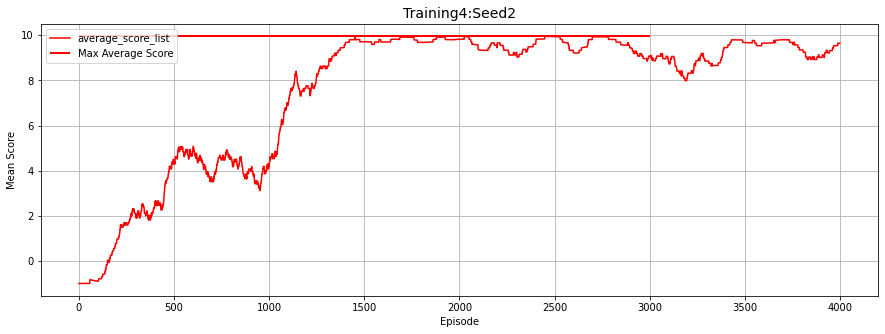

Brain Loaded for Training 4 in seed: 3
Episode 34	Average Score: -0.998194,	Average Step: 499.0Task solved in step: 425
Score: [9.150204]
Episode 48	Average Score: -0.786769,	Average Step: 497.45833333333336Task solved in step: 317
Score: [9.3662]
Episode 73	Average Score: -0.717197,	Average Step: 495.49315068493156Task solved in step: 432
Score: [9.135804]
Episode 88	Average Score: -0.649935,	Average Step: 495.32954545454544Task solved in step: 372
Score: [9.255802]
Episode 94	Average Score: -0.563079,	Average Step: 494.21276595744683Task solved in step: 244
Score: [9.5124]
Episode 111	Average Score: -0.484080,	Average Step: 491.9578787878794Task solved in step: 311
Score: [9.379601]
Episode 115	Average Score: -0.380302,	Average Step: 490.07Task solved in step: 405
Score: [9.189803]
Episode 118	Average Score: -0.278422,	Average Step: 489.13Task solved in step: 246
Score: [9.509399]
Episode 120	Average Score: -0.173346,	Average Step: 486.6Task solved in step: 385
Score: [9.229803]
Epis

Episode 328	Average Score: 3.832325,	Average Step: 383.97Task solved in step: 52
Score: [9.8976]
Episode 329	Average Score: 3.941283,	Average Step: 379.5Task solved in step: 142
Score: [9.7168]
Episode 331	Average Score: 3.943685,	Average Step: 378.33Task solved in step: 489
Score: [9.021806]
Episode 334	Average Score: 3.938311,	Average Step: 380.98Task solved in step: 344
Score: [9.311802]
Episode 335	Average Score: 3.933573,	Average Step: 383.34Task solved in step: 380
Score: [9.241602]
Episode 336	Average Score: 4.035971,	Average Step: 382.15Task solved in step: 109
Score: [9.782001]
Episode 337	Average Score: 4.143773,	Average Step: 378.25Task solved in step: 311
Score: [9.378401]
Episode 338	Average Score: 4.247539,	Average Step: 376.37Task solved in step: 92
Score: [9.8158]
Episode 339	Average Score: 4.355679,	Average Step: 372.3Task solved in step: 312
Score: [9.377401]
Episode 347	Average Score: 4.042049,	Average Step: 379.09Task solved in step: 353
Score: [9.295602]
Episode 34

Episode 689	Average Score: 3.927269,	Average Step: 336.45Task solved in step: 113
Score: [9.774]
Episode 690	Average Score: 3.927527,	Average Step: 336.32Task solved in step: 47
Score: [9.9072]
Episode 691	Average Score: 4.036581,	Average Step: 331.8Task solved in step: 469
Score: [9.062804]
Episode 696	Average Score: 3.921039,	Average Step: 339.56Task solved in step: 40
Score: [9.92]
Episode 704	Average Score: 3.816591,	Average Step: 341.78Task solved in step: 131
Score: [9.7383995]
Episode 707	Average Score: 3.602545,	Average Step: 348.79Task solved in step: 319
Score: [9.362401]
Episode 709	Average Score: 3.706151,	Average Step: 346.99Task solved in step: 91
Score: [9.8188]
Episode 711	Average Score: 3.599269,	Average Step: 350.42Task solved in step: 33
Score: [9.935599]
Episode 712	Average Score: 3.607273,	Average Step: 346.42Task solved in step: 64
Score: [9.8728]
Episode 713	Average Score: 3.715983,	Average Step: 342.07Task solved in step: 216
Score: [9.5694]
Episode 714	Average 

Episode 1136	Average Score: 3.524001,	Average Step: 338.1Task solved in step: 124
Score: [9.752999]
Episode 1139	Average Score: 3.524139,	Average Step: 338.03Task solved in step: 100
Score: [9.8001995]
Episode 1140	Average Score: 3.632123,	Average Step: 334.04Task solved in step: 434
Score: [9.133004]
Episode 1147	Average Score: 3.414777,	Average Step: 342.71Task solved in step: 197
Score: [9.6064]
Episode 1148	Average Score: 3.520823,	Average Step: 339.69Task solved in step: 49
Score: [9.9024]
Episode 1155	Average Score: 3.084991,	Average Step: 357.59Task solved in step: 274
Score: [9.4536]
Episode 1158	Average Score: 2.976279,	Average Step: 361.94Task solved in step: 153
Score: [9.6938]
Episode 1163	Average Score: 2.646168,	Average Step: 376.98Task solved in step: 64
Score: [9.872001]
Episode 1164	Average Score: 2.754870,	Average Step: 372.63Task solved in step: 92
Score: [9.817599]
Episode 1165	Average Score: 2.758324,	Average Step: 370.91Task solved in step: 59
Score: [9.882001]
Ep

Episode 1302	Average Score: 4.684166,	Average Step: 308.05Task solved in step: 184
Score: [9.6324]
Episode 1303	Average Score: 4.681129,	Average Step: 309.57Task solved in step: 111
Score: [9.7794]
Episode 1304	Average Score: 4.679544,	Average Step: 310.37Task solved in step: 64
Score: [9.872001]
Episode 1306	Average Score: 4.679587,	Average Step: 310.35Task solved in step: 176
Score: [9.6477995]
Episode 1307	Average Score: 4.786047,	Average Step: 307.12Task solved in step: 67
Score: [9.8675995]
Episode 1309	Average Score: 4.676773,	Average Step: 311.76Task solved in step: 54
Score: [9.893]
Episode 1310	Average Score: 4.683413,	Average Step: 308.44Task solved in step: 37
Score: [9.926001]
Episode 1311	Average Score: 4.792655,	Average Step: 303.82Task solved in step: 56
Score: [9.8882]
Episode 1312	Average Score: 4.792913,	Average Step: 303.69Task solved in step: 242
Score: [9.516399]
Episode 1314	Average Score: 4.692045,	Average Step: 304.12Task solved in step: 360
Score: [9.280802]
Ep

Episode 1400	Average Score: 8.133123,	Average Step: 133.66Task solved in step: 19
Score: [9.9622]
Episode 1401	Average Score: 8.133490,	Average Step: 133.47Task solved in step: 48
Score: [9.9042]
Episode 1402	Average Score: 8.242514,	Average Step: 128.96Task solved in step: 19
Score: [9.9622]
Episode 1403	Average Score: 8.245811,	Average Step: 127.31Task solved in step: 259
Score: [9.4828]
Episode 1404	Average Score: 8.242845,	Average Step: 128.79Task solved in step: 62
Score: [9.8762]
Episode 1405	Average Score: 8.242887,	Average Step: 128.77Task solved in step: 54
Score: [9.892799]
Episode 1406	Average Score: 8.351797,	Average Step: 124.32Task solved in step: 109
Score: [9.7822]
Episode 1408	Average Score: 8.244484,	Average Step: 127.97Task solved in step: 157
Score: [9.686799]
Episode 1409	Average Score: 8.351334,	Average Step: 124.55Task solved in step: 127
Score: [9.7458]
Episode 1410	Average Score: 8.349861,	Average Step: 125.28Task solved in step: 167
Score: [9.6666]
Episode 141

Episode 1491	Average Score: 9.138300,	Average Step: 81.02Task solved in step: 21
Score: [9.9595995]
Episode 1492	Average Score: 9.138293,	Average Step: 81.03Task solved in step: 19
Score: [9.9622]
Episode 1493	Average Score: 9.138313,	Average Step: 81.02Task solved in step: 19
Score: [9.9622]
Episode 1494	Average Score: 9.138800,	Average Step: 80.77Task solved in step: 19
Score: [9.9622]
Episode 1495	Average Score: 9.138799,	Average Step: 80.77Task solved in step: 19
Score: [9.9622]
Episode 1497	Average Score: 9.029279,	Average Step: 85.52Task solved in step: 19
Score: [9.9622]
Episode 1498	Average Score: 9.029280,	Average Step: 85.52Task solved in step: 19
Score: [9.9622]
Episode 1499	Average Score: 9.033593,	Average Step: 83.36Task solved in step: 19
Score: [9.9622]
Episode 1500	Average Score: 9.033614,	Average Step: 83.35Task solved in step: 19
Score: [9.9622]
Episode 1501	Average Score: 9.033613,	Average Step: 83.35Task solved in step: 19
Score: [9.9622]
Episode 1502	Average Score:

Episode 1673	Average Score: 9.039087,	Average Step: 80.65Task solved in step: 57
Score: [9.8864]
Episode 1674	Average Score: 9.040768,	Average Step: 79.81Task solved in step: 19
Score: [9.9622]
Episode 1675	Average Score: 9.150372,	Average Step: 75.01Task solved in step: 19
Score: [9.9622]
Episode 1676	Average Score: 9.150496,	Average Step: 74.95Task solved in step: 32
Score: [9.936601]
Episode 1677	Average Score: 9.259844,	Average Step: 70.28Task solved in step: 19
Score: [9.9622]
Episode 1678	Average Score: 9.260859,	Average Step: 69.77Task solved in step: 129
Score: [9.743]
Episode 1679	Average Score: 9.258693,	Average Step: 70.85Task solved in step: 37
Score: [9.9272]
Episode 1680	Average Score: 9.259073,	Average Step: 70.66Task solved in step: 25
Score: [9.9498005]
Episode 1681	Average Score: 9.258949,	Average Step: 70.72Task solved in step: 25
Score: [9.9498005]
Episode 1682	Average Score: 9.258825,	Average Step: 70.78Task solved in step: 70
Score: [9.861]
Episode 1684	Average Sc

Episode 1848	Average Score: 9.601831,	Average Step: 49.24Task solved in step: 294
Score: [9.4118]
Episode 1849	Average Score: 9.596355,	Average Step: 51.97Task solved in step: 64
Score: [9.8718]
Episode 1850	Average Score: 9.595451,	Average Step: 52.42Task solved in step: 147
Score: [9.706]
Episode 1851	Average Score: 9.592889,	Average Step: 53.7Task solved in step: 68
Score: [9.8638]
Episode 1852	Average Score: 9.591905,	Average Step: 54.19Task solved in step: 34
Score: [9.932799]
Episode 1853	Average Score: 9.591611,	Average Step: 54.34Task solved in step: 19
Score: [9.9622]
Episode 1854	Average Score: 9.591631,	Average Step: 54.33Task solved in step: 19
Score: [9.9622]
Episode 1855	Average Score: 9.592105,	Average Step: 54.09Task solved in step: 60
Score: [9.8806]
Episode 1856	Average Score: 9.591290,	Average Step: 54.5Task solved in step: 19
Score: [9.9622]
Episode 1857	Average Score: 9.591290,	Average Step: 54.5Task solved in step: 20
Score: [9.960199]
Episode 1858	Average Score: 

Episode 2017	Average Score: 9.921728,	Average Step: 39.31Task solved in step: 19
Score: [9.9622]
Episode 2018	Average Score: 9.921747,	Average Step: 39.3Task solved in step: 32
Score: [9.936001]
Episode 2019	Average Score: 9.924891,	Average Step: 37.72Task solved in step: 114
Score: [9.7732]
Episode 2020	Average Score: 9.923001,	Average Step: 38.67Task solved in step: 19
Score: [9.9622]
Episode 2021	Average Score: 9.923000,	Average Step: 38.67Task solved in step: 380
Score: [9.240803]
Episode 2022	Average Score: 9.915786,	Average Step: 42.28Task solved in step: 334
Score: [9.332401]
Episode 2023	Average Score: 9.909489,	Average Step: 45.43Task solved in step: 95
Score: [9.8108]
Episode 2024	Average Score: 9.909301,	Average Step: 45.52Task solved in step: 63
Score: [9.875401]
Episode 2025	Average Score: 9.908433,	Average Step: 45.96Task solved in step: 64
Score: [9.8728]
Episode 2026	Average Score: 9.907538,	Average Step: 46.41Task solved in step: 19
Score: [9.9622]
Episode 2027	Average

Episode 2102	Average Score: 9.863899,	Average Step: 68.31Task solved in step: 19
Score: [9.9622]
Episode 2103	Average Score: 9.864637,	Average Step: 67.94Task solved in step: 19
Score: [9.9622]
Episode 2104	Average Score: 9.864637,	Average Step: 67.94Task solved in step: 158
Score: [9.684]
Episode 2105	Average Score: 9.861856,	Average Step: 69.33Task solved in step: 19
Score: [9.9622]
Episode 2106	Average Score: 9.861887,	Average Step: 69.31Task solved in step: 19
Score: [9.9622]
Episode 2107	Average Score: 9.869018,	Average Step: 65.74Task solved in step: 19
Score: [9.9622]
Episode 2108	Average Score: 9.870017,	Average Step: 65.24Task solved in step: 19
Score: [9.9622]
Episode 2109	Average Score: 9.870017,	Average Step: 65.24Task solved in step: 19
Score: [9.9622]
Episode 2110	Average Score: 9.870017,	Average Step: 65.24Task solved in step: 19
Score: [9.9622]
Episode 2113	Average Score: 9.650809,	Average Step: 74.84Task solved in step: 19
Score: [9.9622]
Episode 2114	Average Score: 9.

Episode 2392	Average Score: 6.532858,	Average Step: 233.79Task solved in step: 36
Score: [9.9278]
Episode 2393	Average Score: 6.537363,	Average Step: 231.53Task solved in step: 79
Score: [9.842799]
Episode 2394	Average Score: 6.538143,	Average Step: 231.14Task solved in step: 75
Score: [9.8504]
Episode 2397	Average Score: 6.320162,	Average Step: 240.12Task solved in step: 44
Score: [9.9122]
Episode 2398	Average Score: 6.429266,	Average Step: 235.57Task solved in step: 53
Score: [9.8946]
Episode 2399	Average Score: 6.434962,	Average Step: 232.72Task solved in step: 176
Score: [9.648799]
Episode 2400	Average Score: 6.541432,	Average Step: 229.49Task solved in step: 26
Score: [9.9494]
Episode 2401	Average Score: 6.650908,	Average Step: 224.76Task solved in step: 26
Score: [9.9494]
Episode 2402	Average Score: 6.760384,	Average Step: 220.03Task solved in step: 339
Score: [9.321802]
Episode 2403	Average Score: 6.754634,	Average Step: 222.9Task solved in step: 33
Score: [9.9344]
Episode 2405	

Episode 2493	Average Score: 7.873657,	Average Step: 163.5Task solved in step: 263
Score: [9.475599]
Episode 2494	Average Score: 7.869986,	Average Step: 165.34Task solved in step: 26
Score: [9.9494]
Episode 2495	Average Score: 7.870976,	Average Step: 164.85Task solved in step: 67
Score: [9.8675995]
Episode 2496	Average Score: 7.979634,	Average Step: 160.53Task solved in step: 459
Score: [9.0820055]
Episode 2497	Average Score: 8.080436,	Average Step: 160.13Task solved in step: 178
Score: [9.6446]
Episode 2498	Average Score: 8.077760,	Average Step: 161.47Task solved in step: 126
Score: [9.7484]
Episode 2499	Average Score: 8.076298,	Average Step: 162.2Task solved in step: 63
Score: [9.8738]
Episode 2500	Average Score: 8.078547,	Average Step: 161.07Task solved in step: 86
Score: [9.8278]
Episode 2503	Average Score: 7.864655,	Average Step: 168.07Task solved in step: 54
Score: [9.892]
Episode 2505	Average Score: 7.864232,	Average Step: 168.21Task solved in step: 24
Score: [9.952001]
Episode 2

Episode 2603	Average Score: 7.103686,	Average Step: 198.37Task solved in step: 46
Score: [9.9084]
Episode 2604	Average Score: 7.103849,	Average Step: 198.29Task solved in step: 51
Score: [9.898001]
Episode 2605	Average Score: 7.212811,	Average Step: 193.81Task solved in step: 64
Score: [9.8732]
Episode 2606	Average Score: 7.212024,	Average Step: 194.21Task solved in step: 67
Score: [9.866799]
Episode 2608	Average Score: 7.104470,	Average Step: 197.98Task solved in step: 45
Score: [9.909801]
Episode 2609	Average Score: 7.104048,	Average Step: 198.19Task solved in step: 45
Score: [9.911201]
Episode 2610	Average Score: 7.104048,	Average Step: 198.19Task solved in step: 40
Score: [9.9204]
Episode 2611	Average Score: 7.109172,	Average Step: 195.63Task solved in step: 23
Score: [9.955]
Episode 2612	Average Score: 7.109632,	Average Step: 195.4Task solved in step: 66
Score: [9.868401]
Episode 2613	Average Score: 7.110428,	Average Step: 195.0Task solved in step: 40
Score: [9.920799]
Episode 261

Episode 2695	Average Score: 8.609607,	Average Step: 145.48Task solved in step: 127
Score: [9.7476]
Episode 2696	Average Score: 8.608257,	Average Step: 146.16Task solved in step: 37
Score: [9.9262]
Episode 2697	Average Score: 8.615250,	Average Step: 142.66Task solved in step: 107
Score: [9.787]
Episode 2698	Average Score: 8.615615,	Average Step: 142.48Task solved in step: 129
Score: [9.7426]
Episode 2699	Average Score: 8.615196,	Average Step: 142.69Task solved in step: 192
Score: [9.6174]
Episode 2700	Average Score: 8.721351,	Average Step: 139.62Task solved in step: 46
Score: [9.9086]
Episode 2701	Average Score: 8.830419,	Average Step: 135.09Task solved in step: 215
Score: [9.570199]
Episode 2702	Average Score: 8.827593,	Average Step: 136.5Task solved in step: 161
Score: [9.6786]
Episode 2703	Average Score: 8.825717,	Average Step: 137.44Task solved in step: 34
Score: [9.9334]
Episode 2704	Average Score: 8.825966,	Average Step: 137.32Task solved in step: 80
Score: [9.8412]
Episode 2705	A

Episode 2786	Average Score: 8.847196,	Average Step: 126.73Task solved in step: 32
Score: [9.936601]
Episode 2787	Average Score: 8.847336,	Average Step: 126.66Task solved in step: 82
Score: [9.8374]
Episode 2788	Average Score: 8.846757,	Average Step: 126.95Task solved in step: 106
Score: [9.7892]
Episode 2789	Average Score: 8.954630,	Average Step: 123.02Task solved in step: 80
Score: [9.8412]
Episode 2790	Average Score: 8.953676,	Average Step: 123.5Task solved in step: 32
Score: [9.937201]
Episode 2791	Average Score: 8.954392,	Average Step: 123.14Task solved in step: 31
Score: [9.938601]
Episode 2792	Average Score: 8.958126,	Average Step: 121.27Task solved in step: 29
Score: [9.9432]
Episode 2793	Average Score: 8.958042,	Average Step: 121.31Task solved in step: 30
Score: [9.9402]
Episode 2794	Average Score: 8.958631,	Average Step: 121.01Task solved in step: 31
Score: [9.9392]
Episode 2795	Average Score: 8.958564,	Average Step: 121.05Task solved in step: 55
Score: [9.891]
Episode 2796	Av

Episode 2969	Average Score: 8.895967,	Average Step: 102.28Task solved in step: 244
Score: [9.5126]
Episode 2970	Average Score: 8.891629,	Average Step: 104.45Task solved in step: 137
Score: [9.7272]
Episode 2971	Average Score: 8.889436,	Average Step: 105.55Task solved in step: 36
Score: [9.9292]
Episode 2972	Average Score: 8.892669,	Average Step: 103.94Task solved in step: 37
Score: [9.9264]
Episode 2973	Average Score: 8.892448,	Average Step: 104.05Task solved in step: 154
Score: [9.6934]
Episode 2976	Average Score: 8.672835,	Average Step: 113.85Task solved in step: 116
Score: [9.769401]
Episode 2977	Average Score: 8.671254,	Average Step: 114.64Task solved in step: 50
Score: [9.9004]
Episode 2978	Average Score: 8.670991,	Average Step: 114.77Task solved in step: 57
Score: [9.887]
Episode 2979	Average Score: 8.779843,	Average Step: 110.35Task solved in step: 22
Score: [9.9576]
Episode 2980	Average Score: 8.780455,	Average Step: 110.05Task solved in step: 218
Score: [9.5654]
Episode 2981	A

Episode 3068	Average Score: 8.137547,	Average Step: 131.48Task solved in step: 57
Score: [9.8876]
Episode 3069	Average Score: 8.137730,	Average Step: 131.39Task solved in step: 64
Score: [9.8722]
Episode 3070	Average Score: 8.141325,	Average Step: 129.59Task solved in step: 26
Score: [9.9486]
Episode 3071	Average Score: 8.143538,	Average Step: 128.48Task solved in step: 22
Score: [9.9576]
Episode 3072	Average Score: 8.143822,	Average Step: 128.34Task solved in step: 87
Score: [9.8274]
Episode 3073	Average Score: 8.142833,	Average Step: 128.84Task solved in step: 27
Score: [9.9464]
Episode 3074	Average Score: 8.145363,	Average Step: 127.57Task solved in step: 27
Score: [9.9464]
Episode 3075	Average Score: 8.254809,	Average Step: 122.85Task solved in step: 27
Score: [9.9464]
Episode 3076	Average Score: 8.364255,	Average Step: 118.13Task solved in step: 83
Score: [9.8338]
Episode 3077	Average Score: 8.364900,	Average Step: 117.8Task solved in step: 117
Score: [9.766001]
Episode 3078	Avera

Episode 3248	Average Score: 9.665823,	Average Step: 67.44Task solved in step: 19
Score: [9.9622]
Episode 3249	Average Score: 9.665869,	Average Step: 67.41Task solved in step: 19
Score: [9.9622]
Episode 3250	Average Score: 9.667543,	Average Step: 66.57Task solved in step: 119
Score: [9.7626]
Episode 3251	Average Score: 9.665749,	Average Step: 67.47Task solved in step: 54
Score: [9.8932]
Episode 3252	Average Score: 9.665583,	Average Step: 67.56Task solved in step: 162
Score: [9.6758]
Episode 3253	Average Score: 9.663272,	Average Step: 68.71Task solved in step: 22
Score: [9.9576]
Episode 3254	Average Score: 9.664972,	Average Step: 67.86Task solved in step: 19
Score: [9.9622]
Episode 3255	Average Score: 9.774576,	Average Step: 63.06Task solved in step: 23
Score: [9.9542]
Episode 3256	Average Score: 9.775290,	Average Step: 62.7Task solved in step: 19
Score: [9.9622]
Episode 3257	Average Score: 9.775599,	Average Step: 62.54Task solved in step: 19
Score: [9.9622]
Episode 3258	Average Score: 9

Episode 3431	Average Score: 8.774395,	Average Step: 113.04Task solved in step: 61
Score: [9.8792]
Episode 3432	Average Score: 8.773565,	Average Step: 113.46Task solved in step: 38
Score: [9.925]
Episode 3433	Average Score: 8.773192,	Average Step: 113.65Task solved in step: 50
Score: [9.9016]
Episode 3435	Average Score: 8.772587,	Average Step: 113.96Task solved in step: 75
Score: [9.85]
Episode 3436	Average Score: 8.772986,	Average Step: 113.76Task solved in step: 399
Score: [9.201803]
Episode 3437	Average Score: 8.766267,	Average Step: 117.12Task solved in step: 19
Score: [9.9622]
Episode 3438	Average Score: 8.875871,	Average Step: 112.32Task solved in step: 62
Score: [9.8762]
Episode 3439	Average Score: 8.877059,	Average Step: 111.72Task solved in step: 98
Score: [9.804001]
Episode 3440	Average Score: 8.875477,	Average Step: 112.51Task solved in step: 114
Score: [9.7736]
Episode 3441	Average Score: 8.873774,	Average Step: 113.37Task solved in step: 74
Score: [9.8532]
Episode 3442	Aver

Episode 3620	Average Score: 8.790776,	Average Step: 104.96Task solved in step: 25
Score: [9.9516]
Episode 3621	Average Score: 8.791859,	Average Step: 104.42Task solved in step: 53
Score: [9.8938]
Episode 3622	Average Score: 8.794585,	Average Step: 103.05Task solved in step: 19
Score: [9.9622]
Episode 3623	Average Score: 8.795527,	Average Step: 102.58Task solved in step: 42
Score: [9.9168]
Episode 3624	Average Score: 8.795351,	Average Step: 102.67Task solved in step: 28
Score: [9.9446]
Episode 3625	Average Score: 8.796174,	Average Step: 102.26Task solved in step: 74
Score: [9.852]
Episode 3626	Average Score: 8.795711,	Average Step: 102.49Task solved in step: 25
Score: [9.9516]
Episode 3627	Average Score: 8.796338,	Average Step: 102.18Task solved in step: 48
Score: [9.905]
Episode 3628	Average Score: 8.796980,	Average Step: 101.86Task solved in step: 60
Score: [9.881]
Episode 3629	Average Score: 8.797194,	Average Step: 101.75Task solved in step: 47
Score: [9.9064]
Episode 3630	Average Sc

Episode 3713	Average Score: 8.794592,	Average Step: 103.09Task solved in step: 37
Score: [9.926001]
Episode 3714	Average Score: 8.794498,	Average Step: 103.13Task solved in step: 184
Score: [9.6318]
Episode 3715	Average Score: 8.792651,	Average Step: 104.05Task solved in step: 19
Score: [9.9622]
Episode 3716	Average Score: 8.902254,	Average Step: 99.25Task solved in step: 105
Score: [9.790199]
Episode 3717	Average Score: 8.900640,	Average Step: 100.05Task solved in step: 80
Score: [9.840199]
Episode 3718	Average Score: 8.899527,	Average Step: 100.6Task solved in step: 62
Score: [9.8776]
Episode 3719	Average Score: 8.900263,	Average Step: 100.24Task solved in step: 28
Score: [9.9446]
Episode 3720	Average Score: 8.900193,	Average Step: 100.27Task solved in step: 28
Score: [9.9446]
Episode 3721	Average Score: 8.900123,	Average Step: 100.3Task solved in step: 82
Score: [9.8376]
Episode 3722	Average Score: 8.899561,	Average Step: 100.59Task solved in step: 62
Score: [9.8764]
Episode 3723	Av

Episode 3964	Average Score: 7.008111,	Average Step: 196.17Task solved in step: 48
Score: [9.904]
Episode 3965	Average Score: 7.008726,	Average Step: 195.86Task solved in step: 68
Score: [9.8654]
Episode 3968	Average Score: 6.902679,	Average Step: 198.88Task solved in step: 81
Score: [9.8384]
Episode 3969	Average Score: 6.902996,	Average Step: 198.72Task solved in step: 24
Score: [9.953]
Episode 3970	Average Score: 6.904883,	Average Step: 197.78Task solved in step: 23
Score: [9.9554]
Episode 3971	Average Score: 6.905109,	Average Step: 197.67Task solved in step: 23
Score: [9.9542]
Episode 3972	Average Score: 6.906275,	Average Step: 197.08Task solved in step: 46
Score: [9.9084]
Episode 3973	Average Score: 7.015342,	Average Step: 192.55Task solved in step: 78
Score: [9.8456]
Episode 3974	Average Score: 7.123779,	Average Step: 188.34Task solved in step: 124
Score: [9.7534]
Episode 3976	Average Score: 7.126855,	Average Step: 186.81Task solved in step: 110
Score: [9.780601]
Episode 3977	Avera

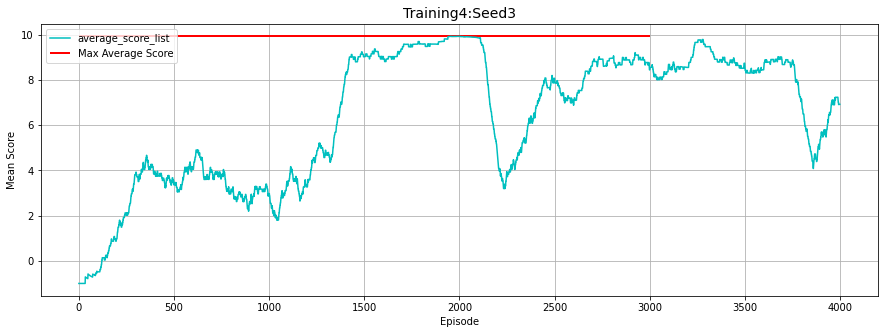

Brain Saved for Training 4 in seed 4
Episode 40	Average Score: -0.998194,	Average Step: 499.0Task solved in step: 466
Score: [9.069605]
Episode 56	Average Score: -0.818412,	Average Step: 498.41071428571435Task solved in step: 355
Score: [9.291602]
Episode 70	Average Score: -0.707372,	Average Step: 496.47142857142866Task solved in step: 223
Score: [9.555599]
Episode 84	Average Score: -0.630201,	Average Step: 493.60714285714283Task solved in step: 303
Score: [9.395201]
Episode 85	Average Score: -0.512256,	Average Step: 491.36470588235295Task solved in step: 486
Score: [9.027805]
Episode 97	Average Score: -0.469011,	Average Step: 492.17525773195877Task solved in step: 255
Score: [9.49]
Episode 100	Average Score: -0.380004,	Average Step: 489.944848484849Task solved in step: 470
Score: [9.061405]
Episode 122	Average Score: -0.279408,	Average Step: 489.65Task solved in step: 386
Score: [9.229003]
Episode 147	Average Score: -0.277814,	Average Step: 488.85Task solved in step: 461
Score: [9.077

Episode 618	Average Score: 2.753156,	Average Step: 373.49Task solved in step: 74
Score: [9.8518]
Episode 621	Average Score: 2.753376,	Average Step: 373.38Task solved in step: 193
Score: [9.6154]
Episode 624	Average Score: 2.859511,	Average Step: 370.32Task solved in step: 96
Score: [9.808001]
Episode 626	Average Score: 2.867076,	Average Step: 366.53Task solved in step: 445
Score: [9.111604]
Episode 627	Average Score: 2.968174,	Average Step: 365.99Task solved in step: 79
Score: [9.843599]
Episode 628	Average Score: 3.076592,	Average Step: 361.79Task solved in step: 119
Score: [9.7626]
Episode 629	Average Score: 3.077820,	Average Step: 361.18Task solved in step: 133
Score: [9.7338]
Episode 630	Average Score: 3.079308,	Average Step: 360.43Task solved in step: 46
Score: [9.9094]
Episode 631	Average Score: 3.188384,	Average Step: 355.9Task solved in step: 242
Score: [9.516799]
Episode 632	Average Score: 3.188106,	Average Step: 356.04Task solved in step: 304
Score: [9.392001]
Episode 634	Ave

Episode 910	Average Score: 5.250381,	Average Step: 274.99Task solved in step: 28
Score: [9.944]
Episode 914	Average Score: 5.359804,	Average Step: 270.28Task solved in step: 37
Score: [9.9262]
Episode 915	Average Score: 5.361611,	Average Step: 269.37Task solved in step: 91
Score: [9.819]
Episode 916	Average Score: 5.360919,	Average Step: 269.72Task solved in step: 312
Score: [9.376401]
Episode 918	Average Score: 5.355401,	Average Step: 272.48Task solved in step: 67
Score: [9.8658]
Episode 924	Average Score: 5.145336,	Average Step: 277.49Task solved in step: 50
Score: [9.9012]
Episode 926	Average Score: 5.146174,	Average Step: 277.07Task solved in step: 58
Score: [9.8852005]
Episode 928	Average Score: 5.039109,	Average Step: 280.62Task solved in step: 50
Score: [9.901]
Episode 930	Average Score: 5.039222,	Average Step: 280.54Task solved in step: 52
Score: [9.897201]
Episode 931	Average Score: 5.038868,	Average Step: 280.72Task solved in step: 34
Score: [9.932]
Episode 936	Average Score:

Episode 1163	Average Score: 7.264479,	Average Step: 167.98Task solved in step: 33
Score: [9.9344]
Episode 1165	Average Score: 7.264228,	Average Step: 168.12Task solved in step: 92
Score: [9.8172]
Episode 1166	Average Score: 7.262844,	Average Step: 168.79Task solved in step: 111
Score: [9.778399]
Episode 1167	Average Score: 7.261032,	Average Step: 169.69Task solved in step: 51
Score: [9.898601]
Episode 1168	Average Score: 7.263538,	Average Step: 168.44Task solved in step: 33
Score: [9.934]
Episode 1169	Average Score: 7.264736,	Average Step: 167.84Task solved in step: 56
Score: [9.8878]
Episode 1170	Average Score: 7.264192,	Average Step: 168.11Task solved in step: 44
Score: [9.9128]
Episode 1171	Average Score: 7.263782,	Average Step: 168.32Task solved in step: 49
Score: [9.9024]
Episode 1172	Average Score: 7.263210,	Average Step: 168.6Task solved in step: 58
Score: [9.884001]
Episode 1174	Average Score: 7.152875,	Average Step: 173.75Task solved in step: 99
Score: [9.8018]
Episode 1176	Av

Episode 1343	Average Score: 9.480922,	Average Step: 59.8Task solved in step: 22
Score: [9.956]
Episode 1344	Average Score: 9.481289,	Average Step: 59.61Task solved in step: 22
Score: [9.9562]
Episode 1345	Average Score: 9.482053,	Average Step: 59.23Task solved in step: 21
Score: [9.958799]
Episode 1346	Average Score: 9.487645,	Average Step: 56.43Task solved in step: 22
Score: [9.9562]
Episode 1347	Average Score: 9.597190,	Average Step: 51.66Task solved in step: 46
Score: [9.909599]
Episode 1348	Average Score: 9.596736,	Average Step: 51.89Task solved in step: 22
Score: [9.9562]
Episode 1349	Average Score: 9.596748,	Average Step: 51.88Task solved in step: 24
Score: [9.9518]
Episode 1350	Average Score: 9.596791,	Average Step: 51.85Task solved in step: 77
Score: [9.8464]
Episode 1351	Average Score: 9.705237,	Average Step: 47.63Task solved in step: 27
Score: [9.947599]
Episode 1352	Average Score: 9.705979,	Average Step: 47.26Task solved in step: 21
Score: [9.958799]
Episode 1353	Average Sco

Episode 1430	Average Score: 9.704333,	Average Step: 48.07Task solved in step: 22
Score: [9.9562]
Episode 1431	Average Score: 9.704333,	Average Step: 48.07Task solved in step: 33
Score: [9.9352]
Episode 1432	Average Score: 9.704425,	Average Step: 48.03Task solved in step: 46
Score: [9.908199]
Episode 1433	Average Score: 9.705296,	Average Step: 47.59Task solved in step: 22
Score: [9.9562]
Episode 1434	Average Score: 9.705555,	Average Step: 47.46Task solved in step: 22
Score: [9.9562]
Episode 1435	Average Score: 9.705633,	Average Step: 47.42Task solved in step: 31
Score: [9.9384]
Episode 1436	Average Score: 9.705456,	Average Step: 47.51Task solved in step: 22
Score: [9.9562]
Episode 1437	Average Score: 9.705456,	Average Step: 47.51Task solved in step: 22
Score: [9.9562]
Episode 1438	Average Score: 9.705934,	Average Step: 47.27Task solved in step: 27
Score: [9.9474]
Episode 1439	Average Score: 9.705882,	Average Step: 47.3Task solved in step: 27
Score: [9.9474]
Episode 1440	Average Score: 9

Episode 1516	Average Score: 9.685814,	Average Step: 57.44Task solved in step: 49
Score: [9.9018]
Episode 1517	Average Score: 9.691580,	Average Step: 54.55Task solved in step: 28
Score: [9.945]
Episode 1518	Average Score: 9.691540,	Average Step: 54.57Task solved in step: 26
Score: [9.948999]
Episode 1519	Average Score: 9.691506,	Average Step: 54.59Task solved in step: 25
Score: [9.950601]
Episode 1520	Average Score: 9.691682,	Average Step: 54.5Task solved in step: 26
Score: [9.948999]
Episode 1522	Average Score: 9.582888,	Average Step: 58.89Task solved in step: 36
Score: [9.928]
Episode 1523	Average Score: 9.582974,	Average Step: 58.84Task solved in step: 62
Score: [9.8758]
Episode 1524	Average Score: 9.582399,	Average Step: 59.12Task solved in step: 47
Score: [9.9072]
Episode 1525	Average Score: 9.582130,	Average Step: 59.26Task solved in step: 28
Score: [9.9444]
Episode 1526	Average Score: 9.582114,	Average Step: 59.27Task solved in step: 22
Score: [9.9562]
Episode 1527	Average Score:

Episode 1685	Average Score: 9.929190,	Average Step: 35.59Task solved in step: 22
Score: [9.9562]
Episode 1686	Average Score: 9.929190,	Average Step: 35.59Task solved in step: 22
Score: [9.9562]
Episode 1687	Average Score: 9.929190,	Average Step: 35.59Task solved in step: 42
Score: [9.916]
Episode 1688	Average Score: 9.929547,	Average Step: 35.41Task solved in step: 42
Score: [9.9172]
Episode 1689	Average Score: 9.929157,	Average Step: 35.61Task solved in step: 22
Score: [9.9562]
Episode 1690	Average Score: 9.929157,	Average Step: 35.61Task solved in step: 37
Score: [9.9272]
Episode 1691	Average Score: 9.929850,	Average Step: 35.27Task solved in step: 22
Score: [9.9562]
Episode 1692	Average Score: 9.929850,	Average Step: 35.27Task solved in step: 52
Score: [9.895801]
Episode 1693	Average Score: 9.929885,	Average Step: 35.25Task solved in step: 126
Score: [9.7492]
Episode 1694	Average Score: 9.928151,	Average Step: 36.12Task solved in step: 29
Score: [9.9424]
Episode 1695	Average Score: 

Episode 1853	Average Score: 9.934106,	Average Step: 33.15Task solved in step: 21
Score: [9.959]
Episode 1854	Average Score: 9.934134,	Average Step: 33.14Task solved in step: 21
Score: [9.959]
Episode 1855	Average Score: 9.934162,	Average Step: 33.13Task solved in step: 21
Score: [9.959]
Episode 1856	Average Score: 9.934190,	Average Step: 33.12Task solved in step: 21
Score: [9.959]
Episode 1857	Average Score: 9.934217,	Average Step: 33.11Task solved in step: 32
Score: [9.936601]
Episode 1858	Average Score: 9.934022,	Average Step: 33.21Task solved in step: 21
Score: [9.959]
Episode 1859	Average Score: 9.934070,	Average Step: 33.19Task solved in step: 21
Score: [9.959]
Episode 1860	Average Score: 9.934116,	Average Step: 33.17Task solved in step: 21
Score: [9.959]
Episode 1861	Average Score: 9.934146,	Average Step: 33.16Task solved in step: 21
Score: [9.959]
Episode 1862	Average Score: 9.934174,	Average Step: 33.15Task solved in step: 23
Score: [9.9546]
Episode 1863	Average Score: 9.934157

Episode 2029	Average Score: 9.839979,	Average Step: 30.25Task solved in step: 21
Score: [9.959]
Episode 2030	Average Score: 9.839982,	Average Step: 30.25Task solved in step: 21
Score: [9.959]
Episode 2031	Average Score: 9.839984,	Average Step: 30.25Task solved in step: 21
Score: [9.959]
Episode 2032	Average Score: 9.840496,	Average Step: 30.0Task solved in step: 22
Score: [9.956]
Episode 2033	Average Score: 9.840823,	Average Step: 29.83Task solved in step: 22
Score: [9.9566]
Episode 2034	Average Score: 9.840828,	Average Step: 29.83Task solved in step: 22
Score: [9.956]
Episode 2035	Average Score: 9.840826,	Average Step: 29.83Task solved in step: 22
Score: [9.9562]
Episode 2036	Average Score: 9.840797,	Average Step: 29.84Task solved in step: 46
Score: [9.908799]
Episode 2037	Average Score: 9.841310,	Average Step: 29.58Task solved in step: 22
Score: [9.9562]
Episode 2038	Average Score: 9.842267,	Average Step: 29.1Task solved in step: 22
Score: [9.956]
Episode 2039	Average Score: 9.842237

Episode 2114	Average Score: 9.950484,	Average Step: 24.93Task solved in step: 22
Score: [9.956]
Episode 2115	Average Score: 9.950482,	Average Step: 24.93Task solved in step: 22
Score: [9.956]
Episode 2116	Average Score: 9.950480,	Average Step: 24.93Task solved in step: 22
Score: [9.956]
Episode 2117	Average Score: 9.950478,	Average Step: 24.93Task solved in step: 22
Score: [9.956]
Episode 2118	Average Score: 9.950478,	Average Step: 24.93Task solved in step: 22
Score: [9.956]
Episode 2119	Average Score: 9.950478,	Average Step: 24.93Task solved in step: 22
Score: [9.9562]
Episode 2120	Average Score: 9.950478,	Average Step: 24.93Task solved in step: 22
Score: [9.9562]
Episode 2121	Average Score: 9.950478,	Average Step: 24.93Task solved in step: 22
Score: [9.9562]
Episode 2122	Average Score: 9.950478,	Average Step: 24.93Task solved in step: 22
Score: [9.9562]
Episode 2123	Average Score: 9.950478,	Average Step: 24.93Task solved in step: 22
Score: [9.9562]
Episode 2124	Average Score: 9.95124

Episode 2284	Average Score: 9.945241,	Average Step: 27.61Task solved in step: 22
Score: [9.9562]
Episode 2285	Average Score: 9.946975,	Average Step: 26.74Task solved in step: 22
Score: [9.9562]
Episode 2286	Average Score: 9.947019,	Average Step: 26.72Task solved in step: 26
Score: [9.948199]
Episode 2287	Average Score: 9.946939,	Average Step: 26.76Task solved in step: 22
Score: [9.9562]
Episode 2288	Average Score: 9.947463,	Average Step: 26.5Task solved in step: 22
Score: [9.9562]
Episode 2289	Average Score: 9.947463,	Average Step: 26.5Task solved in step: 22
Score: [9.9566]
Episode 2290	Average Score: 9.948059,	Average Step: 26.2Task solved in step: 22
Score: [9.9562]
Episode 2291	Average Score: 9.953081,	Average Step: 23.69Task solved in step: 22
Score: [9.9566]
Episode 2292	Average Score: 9.953085,	Average Step: 23.69Task solved in step: 22
Score: [9.9562]
Episode 2293	Average Score: 9.953150,	Average Step: 23.66Task solved in step: 22
Score: [9.9562]
Episode 2294	Average Score: 9.9

Episode 2370	Average Score: 9.839953,	Average Step: 30.19Task solved in step: 22
Score: [9.9562]
Episode 2371	Average Score: 9.839953,	Average Step: 30.19Task solved in step: 22
Score: [9.9562]
Episode 2372	Average Score: 9.839953,	Average Step: 30.19Task solved in step: 22
Score: [9.9562]
Episode 2373	Average Score: 9.840215,	Average Step: 30.06Task solved in step: 22
Score: [9.9562]
Episode 2374	Average Score: 9.840215,	Average Step: 30.06Task solved in step: 22
Score: [9.9562]
Episode 2375	Average Score: 9.840180,	Average Step: 30.07Task solved in step: 21
Score: [9.959]
Episode 2376	Average Score: 9.840209,	Average Step: 30.06Task solved in step: 55
Score: [9.8906]
Episode 2377	Average Score: 9.839926,	Average Step: 30.2Task solved in step: 22
Score: [9.9562]
Episode 2378	Average Score: 9.839926,	Average Step: 30.2Task solved in step: 22
Score: [9.9562]
Episode 2379	Average Score: 9.840737,	Average Step: 29.79Task solved in step: 22
Score: [9.9562]
Episode 2380	Average Score: 9.840

Episode 2544	Average Score: 9.845611,	Average Step: 27.64Task solved in step: 22
Score: [9.9562]
Episode 2545	Average Score: 9.845582,	Average Step: 27.65Task solved in step: 21
Score: [9.959]
Episode 2546	Average Score: 9.846519,	Average Step: 27.18Task solved in step: 21
Score: [9.959]
Episode 2547	Average Score: 9.846519,	Average Step: 27.18Task solved in step: 21
Score: [9.959]
Episode 2548	Average Score: 9.846519,	Average Step: 27.18Task solved in step: 22
Score: [9.956]
Episode 2549	Average Score: 9.846489,	Average Step: 27.19Task solved in step: 22
Score: [9.956]
Episode 2550	Average Score: 9.846459,	Average Step: 27.2Task solved in step: 22
Score: [9.956]
Episode 2551	Average Score: 9.846429,	Average Step: 27.21Task solved in step: 21
Score: [9.959]
Episode 2552	Average Score: 9.846430,	Average Step: 27.21Task solved in step: 24
Score: [9.9536]
Episode 2553	Average Score: 9.846375,	Average Step: 27.24Task solved in step: 22
Score: [9.9566]
Episode 2554	Average Score: 9.846352,	

Episode 2629	Average Score: 9.948830,	Average Step: 25.82Task solved in step: 21
Score: [9.959]
Episode 2630	Average Score: 9.948830,	Average Step: 25.82Task solved in step: 21
Score: [9.959]
Episode 2631	Average Score: 9.948830,	Average Step: 25.82Task solved in step: 21
Score: [9.959]
Episode 2632	Average Score: 9.948830,	Average Step: 25.82Task solved in step: 46
Score: [9.9092]
Episode 2633	Average Score: 9.948359,	Average Step: 26.06Task solved in step: 21
Score: [9.959]
Episode 2634	Average Score: 9.948387,	Average Step: 26.05Task solved in step: 22
Score: [9.9562]
Episode 2635	Average Score: 9.948359,	Average Step: 26.06Task solved in step: 22
Score: [9.9566]
Episode 2636	Average Score: 9.948363,	Average Step: 26.06Task solved in step: 22
Score: [9.9562]
Episode 2637	Average Score: 9.948336,	Average Step: 26.07Task solved in step: 22
Score: [9.9562]
Episode 2638	Average Score: 9.948307,	Average Step: 26.08Task solved in step: 22
Score: [9.9562]
Episode 2639	Average Score: 9.9482

Episode 2800	Average Score: 9.953409,	Average Step: 23.54Task solved in step: 22
Score: [9.9562]
Episode 2801	Average Score: 9.953382,	Average Step: 23.55Task solved in step: 22
Score: [9.956]
Episode 2802	Average Score: 9.953351,	Average Step: 23.56Task solved in step: 22
Score: [9.9562]
Episode 2803	Average Score: 9.953322,	Average Step: 23.57Task solved in step: 24
Score: [9.9528]
Episode 2804	Average Score: 9.953261,	Average Step: 23.6Task solved in step: 49
Score: [9.9036]
Episode 2805	Average Score: 9.952708,	Average Step: 23.88Task solved in step: 22
Score: [9.9562]
Episode 2806	Average Score: 9.952710,	Average Step: 23.88Task solved in step: 22
Score: [9.9562]
Episode 2807	Average Score: 9.952712,	Average Step: 23.88Task solved in step: 22
Score: [9.9562]
Episode 2808	Average Score: 9.952714,	Average Step: 23.88Task solved in step: 44
Score: [9.9132]
Episode 2809	Average Score: 9.952285,	Average Step: 24.1Task solved in step: 22
Score: [9.956]
Episode 2810	Average Score: 9.9522

Episode 2886	Average Score: 9.954206,	Average Step: 23.12Task solved in step: 22
Score: [9.956]
Episode 2887	Average Score: 9.954204,	Average Step: 23.12Task solved in step: 22
Score: [9.956]
Episode 2888	Average Score: 9.954202,	Average Step: 23.12Task solved in step: 38
Score: [9.925]
Episode 2889	Average Score: 9.953862,	Average Step: 23.29Task solved in step: 22
Score: [9.9562]
Episode 2890	Average Score: 9.953834,	Average Step: 23.3Task solved in step: 22
Score: [9.9562]
Episode 2891	Average Score: 9.953939,	Average Step: 23.24Task solved in step: 22
Score: [9.9562]
Episode 2892	Average Score: 9.953939,	Average Step: 23.24Task solved in step: 22
Score: [9.956]
Episode 2893	Average Score: 9.953938,	Average Step: 23.24Task solved in step: 25
Score: [9.9512005]
Episode 2894	Average Score: 9.953887,	Average Step: 23.27Task solved in step: 22
Score: [9.956]
Episode 2895	Average Score: 9.953885,	Average Step: 23.27Task solved in step: 22
Score: [9.956]
Episode 2896	Average Score: 9.9538

Episode 2971	Average Score: 9.949782,	Average Step: 25.25Task solved in step: 22
Score: [9.9562]
Episode 2972	Average Score: 9.949756,	Average Step: 25.26Task solved in step: 22
Score: [9.9562]
Episode 2973	Average Score: 9.949757,	Average Step: 25.26Task solved in step: 22
Score: [9.9562]
Episode 2974	Average Score: 9.949759,	Average Step: 25.26Task solved in step: 22
Score: [9.9562]
Episode 2975	Average Score: 9.949760,	Average Step: 25.26Task solved in step: 22
Score: [9.9562]
Episode 2976	Average Score: 9.949763,	Average Step: 25.26Task solved in step: 23
Score: [9.954]
Episode 2977	Average Score: 9.949989,	Average Step: 25.14Task solved in step: 61
Score: [9.878799]
Episode 2978	Average Score: 9.949217,	Average Step: 25.53Task solved in step: 22
Score: [9.9562]
Episode 2979	Average Score: 9.949327,	Average Step: 25.47Task solved in step: 22
Score: [9.9562]
Episode 2980	Average Score: 9.949327,	Average Step: 25.47Task solved in step: 22
Score: [9.9562]
Episode 2981	Average Score: 9

Episode 3057	Average Score: 9.842893,	Average Step: 28.68Task solved in step: 22
Score: [9.9562]
Episode 3058	Average Score: 9.842932,	Average Step: 28.66Task solved in step: 23
Score: [9.9542]
Episode 3059	Average Score: 9.842912,	Average Step: 28.67Task solved in step: 22
Score: [9.9562]
Episode 3060	Average Score: 9.842912,	Average Step: 28.67Task solved in step: 22
Score: [9.9562]
Episode 3061	Average Score: 9.842912,	Average Step: 28.67Task solved in step: 22
Score: [9.9562]
Episode 3062	Average Score: 9.842912,	Average Step: 28.67Task solved in step: 23
Score: [9.9546]
Episode 3063	Average Score: 9.842895,	Average Step: 28.68Task solved in step: 22
Score: [9.9562]
Episode 3064	Average Score: 9.842915,	Average Step: 28.67Task solved in step: 22
Score: [9.9562]
Episode 3065	Average Score: 9.842936,	Average Step: 28.66Task solved in step: 22
Score: [9.9562]
Episode 3066	Average Score: 9.842935,	Average Step: 28.66Task solved in step: 22
Score: [9.9562]
Episode 3067	Average Score: 9.

Episode 3143	Average Score: 9.949757,	Average Step: 25.25Task solved in step: 22
Score: [9.9562]
Episode 3144	Average Score: 9.949757,	Average Step: 25.25Task solved in step: 22
Score: [9.9562]
Episode 3145	Average Score: 9.949757,	Average Step: 25.25Task solved in step: 22
Score: [9.9562]
Episode 3146	Average Score: 9.949757,	Average Step: 25.25Task solved in step: 22
Score: [9.9562]
Episode 3147	Average Score: 9.949777,	Average Step: 25.24Task solved in step: 22
Score: [9.9562]
Episode 3148	Average Score: 9.949798,	Average Step: 25.23Task solved in step: 22
Score: [9.9562]
Episode 3149	Average Score: 9.949798,	Average Step: 25.23Task solved in step: 22
Score: [9.9562]
Episode 3150	Average Score: 9.949798,	Average Step: 25.23Task solved in step: 22
Score: [9.9562]
Episode 3151	Average Score: 9.949797,	Average Step: 25.23Task solved in step: 27
Score: [9.9464]
Episode 3152	Average Score: 9.949699,	Average Step: 25.28Task solved in step: 22
Score: [9.9562]
Episode 3153	Average Score: 9.

Episode 3228	Average Score: 9.946674,	Average Step: 26.78Task solved in step: 22
Score: [9.9562]
Episode 3229	Average Score: 9.946674,	Average Step: 26.78Task solved in step: 22
Score: [9.9562]
Episode 3230	Average Score: 9.946674,	Average Step: 26.78Task solved in step: 31
Score: [9.9384]
Episode 3231	Average Score: 9.946497,	Average Step: 26.87Task solved in step: 23
Score: [9.954]
Episode 3232	Average Score: 9.946475,	Average Step: 26.88Task solved in step: 24
Score: [9.9526005]
Episode 3233	Average Score: 9.946439,	Average Step: 26.9Task solved in step: 22
Score: [9.9562]
Episode 3234	Average Score: 9.946439,	Average Step: 26.9Task solved in step: 22
Score: [9.9562]
Episode 3235	Average Score: 9.946439,	Average Step: 26.9Task solved in step: 22
Score: [9.956]
Episode 3236	Average Score: 9.946457,	Average Step: 26.89Task solved in step: 22
Score: [9.956]
Episode 3237	Average Score: 9.946455,	Average Step: 26.89Task solved in step: 22
Score: [9.956]
Episode 3238	Average Score: 9.9464

Episode 3314	Average Score: 9.948688,	Average Step: 25.77Task solved in step: 22
Score: [9.956]
Episode 3315	Average Score: 9.948688,	Average Step: 25.77Task solved in step: 23
Score: [9.9546]
Episode 3316	Average Score: 9.948671,	Average Step: 25.78Task solved in step: 22
Score: [9.9562]
Episode 3317	Average Score: 9.948671,	Average Step: 25.78Task solved in step: 22
Score: [9.956]
Episode 3318	Average Score: 9.948669,	Average Step: 25.78Task solved in step: 22
Score: [9.956]
Episode 3319	Average Score: 9.948667,	Average Step: 25.78Task solved in step: 22
Score: [9.956]
Episode 3320	Average Score: 9.948668,	Average Step: 25.78Task solved in step: 22
Score: [9.9566]
Episode 3321	Average Score: 9.948672,	Average Step: 25.78Task solved in step: 22
Score: [9.9562]
Episode 3322	Average Score: 9.948672,	Average Step: 25.78Task solved in step: 22
Score: [9.9562]
Episode 3323	Average Score: 9.948672,	Average Step: 25.78Task solved in step: 22
Score: [9.9562]
Episode 3324	Average Score: 9.9486

Episode 3484	Average Score: 9.949179,	Average Step: 25.61Task solved in step: 22
Score: [9.9562]
Episode 3485	Average Score: 9.949180,	Average Step: 25.61Task solved in step: 22
Score: [9.9562]
Episode 3486	Average Score: 9.949179,	Average Step: 25.61Task solved in step: 22
Score: [9.9562]
Episode 3487	Average Score: 9.949179,	Average Step: 25.61Task solved in step: 22
Score: [9.9562]
Episode 3488	Average Score: 9.949413,	Average Step: 25.49Task solved in step: 22
Score: [9.9562]
Episode 3489	Average Score: 9.949413,	Average Step: 25.49Task solved in step: 22
Score: [9.9562]
Episode 3490	Average Score: 9.949413,	Average Step: 25.49Task solved in step: 22
Score: [9.9562]
Episode 3491	Average Score: 9.952571,	Average Step: 23.91Task solved in step: 33
Score: [9.934199]
Episode 3492	Average Score: 9.952352,	Average Step: 24.02Task solved in step: 22
Score: [9.9562]
Episode 3493	Average Score: 9.952351,	Average Step: 24.02Task solved in step: 22
Score: [9.9562]
Episode 3494	Average Score: 

Episode 3569	Average Score: 9.944261,	Average Step: 28.11Task solved in step: 23
Score: [9.9542]
Episode 3570	Average Score: 9.944259,	Average Step: 28.11Task solved in step: 199
Score: [9.6018]
Episode 3571	Average Score: 9.940783,	Average Step: 29.84Task solved in step: 28
Score: [9.9446]
Episode 3572	Average Score: 9.940859,	Average Step: 29.8Task solved in step: 31
Score: [9.939]
Episode 3573	Average Score: 9.940686,	Average Step: 29.89Task solved in step: 33
Score: [9.9346]
Episode 3574	Average Score: 9.940471,	Average Step: 30.0Task solved in step: 26
Score: [9.9478]
Episode 3575	Average Score: 9.940658,	Average Step: 29.9Task solved in step: 32
Score: [9.936601]
Episode 3576	Average Score: 9.940464,	Average Step: 30.0Task solved in step: 31
Score: [9.939]
Episode 3577	Average Score: 9.940293,	Average Step: 30.09Task solved in step: 32
Score: [9.936601]
Episode 3578	Average Score: 9.940099,	Average Step: 30.19Task solved in step: 28
Score: [9.9446]
Episode 3579	Average Score: 9.9

Episode 3740	Average Score: 9.705322,	Average Step: 47.61Task solved in step: 23
Score: [9.9542]
Episode 3741	Average Score: 9.705304,	Average Step: 47.62Task solved in step: 23
Score: [9.9542]
Episode 3742	Average Score: 9.705288,	Average Step: 47.63Task solved in step: 321
Score: [9.358201]
Episode 3743	Average Score: 9.699384,	Average Step: 50.58Task solved in step: 25
Score: [9.9516]
Episode 3744	Average Score: 9.699405,	Average Step: 50.57Task solved in step: 58
Score: [9.8848]
Episode 3745	Average Score: 9.698807,	Average Step: 50.87Task solved in step: 23
Score: [9.9546]
Episode 3746	Average Score: 9.698808,	Average Step: 50.87Task solved in step: 46
Score: [9.9086]
Episode 3747	Average Score: 9.698328,	Average Step: 51.11Task solved in step: 23
Score: [9.9546]
Episode 3748	Average Score: 9.698351,	Average Step: 51.1Task solved in step: 27
Score: [9.9466]
Episode 3749	Average Score: 9.698311,	Average Step: 51.12Task solved in step: 23
Score: [9.9546]
Episode 3750	Average Score: 

Episode 3912	Average Score: 9.700127,	Average Step: 50.22Task solved in step: 22
Score: [9.957]
Episode 3913	Average Score: 9.700794,	Average Step: 49.89Task solved in step: 50
Score: [9.9008]
Episode 3914	Average Score: 9.703520,	Average Step: 48.53Task solved in step: 27
Score: [9.9466]
Episode 3915	Average Score: 9.703498,	Average Step: 48.54Task solved in step: 26
Score: [9.949599]
Episode 3916	Average Score: 9.703592,	Average Step: 48.5Task solved in step: 25
Score: [9.9516]
Episode 3917	Average Score: 9.704332,	Average Step: 48.13Task solved in step: 23
Score: [9.9556]
Episode 3918	Average Score: 9.704382,	Average Step: 48.11Task solved in step: 26
Score: [9.949599]
Episode 3919	Average Score: 9.704334,	Average Step: 48.14Task solved in step: 26
Score: [9.949599]
Episode 3920	Average Score: 9.704325,	Average Step: 48.15Task solved in step: 26
Score: [9.949599]
Episode 3921	Average Score: 9.704258,	Average Step: 48.19Task solved in step: 26
Score: [9.949599]
Episode 3922	Average S

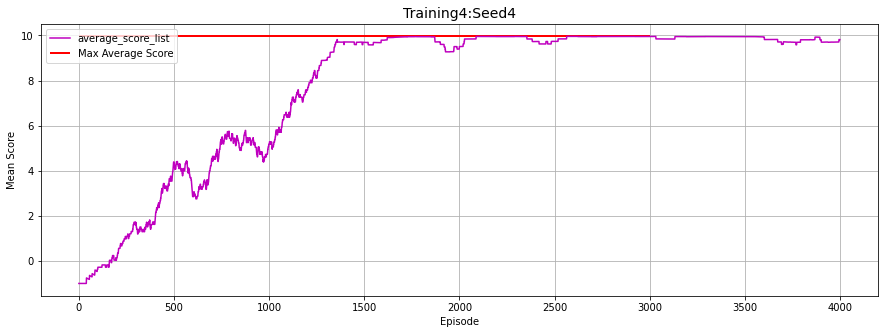

CPU times: user 3h 30min 22s, sys: 10h 16min 34s, total: 13h 46min 57s
Wall time: 4h 18min 53s


In [29]:
%%time

seed_number=5

for seed in range(seed_number):
    

                
    #Logged values


    scores = []
    step=[] 
    average_score_list=[]                                           #Saves last 100 average scores
    average_step_list=[]   
    scores_window = deque(maxlen=100)                               # Saves last 100 avarage solved steps
    step_window = deque(maxlen=100)                                 # last 100 scores

    #Hyperparamaters:

    n_episodes=4000
    max_t=500
    eps_start=1.0
    eps=eps_start
    eps_end=0.01 
    eps_decay=0.995
    #BETA = 0.025 For comparable experiment with DQN Beta bonus values is not used


    #Call SR function
    agent = SR_Agent(state_size, action_size, seed)
     
     
    #Load weights:    
    if seed == 0:
        print("Brain Loaded for Training 4 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train3_Seed0.pth'))
    if seed == 1:
        print("Brain Loaded for Training 4 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train3_Seed1.pth'))
    if seed == 2:
        print("Brain Loaded for Training 4 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train3_Seed2.pth'))
    if seed == 3:
        print("Brain Loaded for Training 4 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train3_Seed3.pth'))
    if seed == 4:
        print("Brain Saved for Training 4 in seed",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train3_Seed4.pth'))


    env.reset()
    for episode in range(1,n_episodes+1):

        dones=np.asarray([False])
        #Reset environment for each episode:
        env.reset()
        #Get information from reset environment:
        decision_steps, terminal_steps = env.get_steps(behavior_name)
        # get initial state of the unity environment
        state = decision_steps.obs[0]
        #Score list containing scores from each episode:
        score = 0
        mean_score=[]
        for i in range(max_t):


            action,r_int = agent.parallel_act(state, eps)        #action as numpy.int64
            action_fixed=np.array([action])
            action_tuple = ActionTuple()
            action_tuple.add_discrete(action_fixed)

            #Set action information
            env.set_actions(behavior_name,action_tuple)
            # Move the simulation forward
            env.step()
            # Get the new simulation results
            decision_steps, terminal_steps = env.get_steps(behavior_name)
            # get the next states for each unity agent in the environment
            next_state = decision_steps.obs[0]

            # get the rewards for each unity agent in the environment
            rewards = decision_steps.reward
            
            #Adjust r
            #r = np.asarray(rewards) + BETA * np.asarray(r_int)

            #If episode dones:
            if(len(terminal_steps.reward)!=0):

                        dones= np.asarray([True])
                        rewards= terminal_steps.reward
                        r = np.asarray(rewards) + BETA * np.asarray(r_int)
                        next_state = terminal_steps.obs[0]




            #Send (S, A, R, S') info to the training agent for replay buffer (memory) and network updates
            agent.step(state, action, rewards, next_state,dones)

            #New state is the next state:
            state = next_state

            #Iterate rewards on score
            score += rewards


            if rewards > 0:
                print("Task solved in step:",i)
                print("Score:",score)


            if dones== np.asarray([True]):

                break


        #Decrease epsilon parameter step by step:
        eps = max(eps_end, eps_decay*eps) 

        #Save last step
        step.append(i)
        # save last steps for window for average 100:        
        step_window.append(i)
        #Create list for avarge 100 scores
        average_step_list.append(np.mean(step_window))

        # save most recent score:
        scores.append(score)
        # save most recent score for window for average 100:        
        scores_window.append(score)  
        #Create list for avarge 100 scores
        average_score_list.append(np.mean(scores_window))



        print('\rEpisode {}\tAverage Score: {:.6f},\tAverage Step: {}'.format(episode, np.mean(scores_window),np.mean(step_window)), end="")
       
       
        if episode % 1000 == 0:
    
            if seed == 0:
                print("Brain Saved for Training 4 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train4_Seed0.pth')
            if seed == 1:
                print("Brain Saved for Training 4 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train4_Seed1.pth')
            if seed == 2:
                print("Brain Saved for Training 4 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train4_Seed2.pth')
            if seed == 3:
                print("Brain Saved for Training 4 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train4_Seed3.pth')

            if seed == 4:
                print("Brain Saved for Training 4 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train4_Seed4.pth')
                
                
                

    #Save datas per each seed
    score_shape=len(scores)
    df= pd.DataFrame(list(zip(np.array(scores).reshape(score_shape).tolist(), average_score_list, step,average_step_list)), columns= ['Scores','Mean_Scores','Completed_Steps','MeanCompleted_Steps'])
    df.to_csv('Train_4_Seed_'+str(seed)+'.csv')
    
    #Plot mean reward:
    color=["b","g","r","c","m"]
    plt.rcParams['figure.figsize'] = [15,5]
    plt.plot(np.arange(len(average_score_list)), average_score_list,label="average_score_list",color=color[seed])
    plt.hlines(y=max(average_score_list), xmin=0, xmax=3000, colors='red', linestyles='-', lw=2, label='Max Average Score')
    plt.xlabel('Episode', fontsize=10)
    plt.ylabel('Mean Score', fontsize=10)
    plt.title("Training4:Seed{}".format(seed),fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.savefig("Training4:Seed{}.png".format(seed))
    plt.show()
    
    





# 5-) Fifth training:Default Door

In [53]:
env.close()

In [54]:
default_file="HER_3_no.app"
alternative_file="HER_3_no_alternate.app"
default_logged="HER_3_no_log.app"
channel = EngineConfigurationChannel()
env = UnityEnvironment(file_name=default_file,worker_id=0,side_channels=[channel])
channel.set_configuration_parameters(time_scale = 100.0)
# get the behavior:
env.reset()
behavior_name = list(env.behavior_specs)[0]
print(behavior_name)
spec = env.behavior_specs[behavior_name]
# reset the environment
env.reset()
decision_steps, terminal_steps = env.get_steps(behavior_name)

for action, branch_size in enumerate(spec.action_spec.discrete_branches):
    print(f"Action number {action} has {branch_size} different options")
    
action_size=branch_size    
print('Number of actions:', action_size)

# examine the state space 
state=decision_steps.obs[0][0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)
print('States have length:', type(state))
env.reset()

HERTask_2?team=0
Action number 0 has 5 different options
Number of actions: 5
States look like: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.         0.         0.         0.
 0.         0.         0.         0.46935856 0.         1.
 0.         0.         0.         0.         0.         0.52897596
 0.         1.         0.         0.         0.         0.
 0.         0.52897596 0.         1.         0.         0.
 0.         0.         0.         0.7077888  0.         1.
 0.        

Brain Saved for Training 5 in seed 4
Episode 21	Average Score: -0.999994,	Average Step: 499.0Task solved in step: 336
Score: [9.327802]
Episode 35	Average Score: -0.704914,	Average Step: 494.34285714285716Task solved in step: 395
Score: [9.208203]
Episode 38	Average Score: -0.459573,	Average Step: 491.9736842105263Task solved in step: 461
Score: [9.077205]
Episode 41	Average Score: -0.253331,	Average Step: 491.5609756097561Task solved in step: 461
Score: [9.076805]
Episode 46	Average Score: -0.115429,	Average Step: 491.54347826086956Task solved in step: 464
Score: [9.071205]
Episode 49	Average Score: 0.035948,	Average Step: 491.2857142857143Task solved in step: 400
Score: [9.199003]
Episode 52	Average Score: 0.172317,	Average Step: 489.8269230769231Task solved in step: 353
Score: [9.293402]
Episode 58	Average Score: 0.228516,	Average Step: 488.25862068965525Task solved in step: 296
Score: [9.406201]
Episode 61	Average Score: 0.338691,	Average Step: 485.45901639344265Task solved in step

Episode 432	Average Score: -0.048175,	Average Step: 473.13Task solved in step: 319
Score: [9.360401]
Episode 434	Average Score: -0.052569,	Average Step: 475.32Task solved in step: 144
Score: [9.7106]
Episode 435	Average Score: -0.054383,	Average Step: 476.23Task solved in step: 206
Score: [9.587799]
Episode 437	Average Score: 0.051495,	Average Step: 473.3Task solved in step: 205
Score: [9.589199]
Episode 438	Average Score: 0.049083,	Average Step: 474.51Task solved in step: 62
Score: [9.875601]
Episode 439	Average Score: 0.157839,	Average Step: 470.14Task solved in step: 448
Score: [9.103205]
Episode 443	Average Score: 0.258871,	Average Step: 469.63Task solved in step: 206
Score: [9.5859995]
Episode 454	Average Score: 0.364731,	Average Step: 466.7Task solved in step: 57
Score: [9.8856]
Episode 455	Average Score: 0.473587,	Average Step: 462.28Task solved in step: 49
Score: [9.9018]
Episode 457	Average Score: 0.478487,	Average Step: 459.83Task solved in step: 71
Score: [9.856]
Episode 458

Episode 1066	Average Score: 6.586785,	Average Step: 205.97Task solved in step: 23
Score: [9.952801]
Episode 1067	Average Score: 6.586751,	Average Step: 205.99Task solved in step: 25
Score: [9.9488]
Episode 1068	Average Score: 6.591102,	Average Step: 203.81Task solved in step: 32
Score: [9.9346]
Episode 1072	Average Score: 6.381167,	Average Step: 208.77Task solved in step: 29
Score: [9.9418]
Episode 1073	Average Score: 6.381119,	Average Step: 208.8Task solved in step: 94
Score: [9.811601]
Episode 1076	Average Score: 6.161252,	Average Step: 218.73Task solved in step: 23
Score: [9.952]
Episode 1080	Average Score: 6.165305,	Average Step: 216.77Task solved in step: 63
Score: [9.873401]
Episode 1081	Average Score: 6.274038,	Average Step: 212.34Task solved in step: 34
Score: [9.93]
Episode 1082	Average Score: 6.383338,	Average Step: 207.69Task solved in step: 21
Score: [9.956201]
Episode 1083	Average Score: 6.386240,	Average Step: 206.24Task solved in step: 29
Score: [9.940001]
Episode 1085	A

Episode 1273	Average Score: 8.715955,	Average Step: 91.38Task solved in step: 27
Score: [9.9454]
Episode 1274	Average Score: 8.716443,	Average Step: 91.14Task solved in step: 33
Score: [9.9338]
Episode 1275	Average Score: 8.716511,	Average Step: 91.11Task solved in step: 22
Score: [9.9544]
Episode 1276	Average Score: 8.716717,	Average Step: 91.0Task solved in step: 38
Score: [9.922999]
Episode 1277	Average Score: 8.716418,	Average Step: 91.15Task solved in step: 22
Score: [9.954]
Episode 1279	Average Score: 8.607065,	Average Step: 95.82Task solved in step: 64
Score: [9.871799]
Episode 1280	Average Score: 8.715782,	Average Step: 91.47Task solved in step: 89
Score: [9.820399]
Episode 1281	Average Score: 8.823987,	Average Step: 87.37Task solved in step: 22
Score: [9.9544]
Episode 1282	Average Score: 8.824173,	Average Step: 87.27Task solved in step: 22
Score: [9.9544]
Episode 1283	Average Score: 8.824201,	Average Step: 87.25Task solved in step: 151
Score: [9.6962]
Episode 1284	Average Scor

Episode 1762	Average Score: 6.305774,	Average Step: 196.36Task solved in step: 31
Score: [9.936999]
Episode 1763	Average Score: 6.415144,	Average Step: 191.68Task solved in step: 26
Score: [9.9472]
Episode 1764	Average Score: 6.415573,	Average Step: 191.47Task solved in step: 48
Score: [9.9024]
Episode 1765	Average Score: 6.524596,	Average Step: 186.96Task solved in step: 31
Score: [9.936399]
Episode 1766	Average Score: 6.633960,	Average Step: 182.28Task solved in step: 24
Score: [9.950399]
Episode 1767	Average Score: 6.743464,	Average Step: 177.53Task solved in step: 21
Score: [9.9564]
Episode 1769	Average Score: 6.853027,	Average Step: 172.75Task solved in step: 88
Score: [9.8238]
Episode 1770	Average Score: 6.961266,	Average Step: 168.64Task solved in step: 92
Score: [9.8156]
Episode 1771	Average Score: 7.069421,	Average Step: 164.57Task solved in step: 24
Score: [9.950999]
Episode 1772	Average Score: 7.178931,	Average Step: 159.82Task solved in step: 21
Score: [9.9564]
Episode 1774

Episode 1852	Average Score: 9.167722,	Average Step: 65.47Task solved in step: 21
Score: [9.9564]
Episode 1853	Average Score: 9.167723,	Average Step: 65.47Task solved in step: 24
Score: [9.950399]
Episode 1855	Average Score: 9.058352,	Average Step: 70.15Task solved in step: 21
Score: [9.9564]
Episode 1856	Average Score: 9.058852,	Average Step: 69.9Task solved in step: 21
Score: [9.9564]
Episode 1857	Average Score: 9.168416,	Average Step: 65.12Task solved in step: 21
Score: [9.9564]
Episode 1858	Average Score: 9.168417,	Average Step: 65.12Task solved in step: 21
Score: [9.9564]
Episode 1859	Average Score: 9.169031,	Average Step: 64.81Task solved in step: 21
Score: [9.9564]
Episode 1860	Average Score: 9.171231,	Average Step: 63.71Task solved in step: 21
Score: [9.9564]
Episode 1861	Average Score: 9.171339,	Average Step: 63.65Task solved in step: 29
Score: [9.941601]
Episode 1862	Average Score: 9.171191,	Average Step: 63.73Task solved in step: 21
Score: [9.9564]
Episode 1863	Average Score:

Episode 2021	Average Score: 9.950828,	Average Step: 23.82Task solved in step: 21
Score: [9.9564]
Episode 2022	Average Score: 9.950828,	Average Step: 23.82Task solved in step: 21
Score: [9.9564]
Episode 2023	Average Score: 9.950848,	Average Step: 23.81Task solved in step: 21
Score: [9.9564]
Episode 2024	Average Score: 9.950848,	Average Step: 23.81Task solved in step: 21
Score: [9.9564]
Episode 2025	Average Score: 9.950848,	Average Step: 23.81Task solved in step: 23
Score: [9.9524]
Episode 2026	Average Score: 9.951096,	Average Step: 23.68Task solved in step: 23
Score: [9.9524]
Episode 2027	Average Score: 9.951056,	Average Step: 23.7Task solved in step: 21
Score: [9.9564]
Episode 2028	Average Score: 9.951056,	Average Step: 23.7Task solved in step: 21
Score: [9.9564]
Episode 2029	Average Score: 9.952720,	Average Step: 22.87Task solved in step: 21
Score: [9.9564]
Episode 2030	Average Score: 9.952720,	Average Step: 22.87Task solved in step: 21
Score: [9.9564]
Episode 2031	Average Score: 9.95

Episode 2194	Average Score: 9.695709,	Average Step: 51.39Task solved in step: 21
Score: [9.9564]
Episode 2195	Average Score: 9.698056,	Average Step: 50.21Task solved in step: 21
Score: [9.9564]
Episode 2196	Average Score: 9.698056,	Average Step: 50.21Task solved in step: 21
Score: [9.9564]
Episode 2197	Average Score: 9.698056,	Average Step: 50.21Task solved in step: 310
Score: [9.379201]
Episode 2198	Average Score: 9.692285,	Average Step: 53.1Task solved in step: 21
Score: [9.9564]
Episode 2199	Average Score: 9.692284,	Average Step: 53.1Task solved in step: 21
Score: [9.9564]
Episode 2200	Average Score: 9.692285,	Average Step: 53.1Task solved in step: 21
Score: [9.9564]
Episode 2201	Average Score: 9.692284,	Average Step: 53.1Task solved in step: 23
Score: [9.9526005]
Episode 2202	Average Score: 9.692245,	Average Step: 53.12Task solved in step: 21
Score: [9.9564]
Episode 2203	Average Score: 9.692245,	Average Step: 53.12Task solved in step: 21
Score: [9.9564]
Episode 2204	Average Score: 

Episode 2281	Average Score: 9.604656,	Average Step: 46.89Task solved in step: 21
Score: [9.9564]
Episode 2282	Average Score: 9.604656,	Average Step: 46.89Task solved in step: 21
Score: [9.9564]
Episode 2283	Average Score: 9.604656,	Average Step: 46.89Task solved in step: 21
Score: [9.9564]
Episode 2284	Average Score: 9.604656,	Average Step: 46.89Task solved in step: 335
Score: [9.328002]
Episode 2285	Average Score: 9.707935,	Average Step: 45.25Task solved in step: 28
Score: [9.9424]
Episode 2286	Average Score: 9.707795,	Average Step: 45.32Task solved in step: 25
Score: [9.948]
Episode 2287	Average Score: 9.717050,	Average Step: 40.69Task solved in step: 23
Score: [9.9524]
Episode 2288	Average Score: 9.717010,	Average Step: 40.71Task solved in step: 21
Score: [9.9564]
Episode 2289	Average Score: 9.717010,	Average Step: 40.71Task solved in step: 21
Score: [9.9564]
Episode 2290	Average Score: 9.717010,	Average Step: 40.71Task solved in step: 21
Score: [9.9564]
Episode 2291	Average Score: 

Episode 2455	Average Score: 9.595360,	Average Step: 51.53Task solved in step: 21
Score: [9.9564]
Episode 2456	Average Score: 9.595360,	Average Step: 51.53Task solved in step: 21
Score: [9.9564]
Episode 2457	Average Score: 9.595360,	Average Step: 51.53Task solved in step: 21
Score: [9.9564]
Episode 2458	Average Score: 9.595360,	Average Step: 51.53Task solved in step: 21
Score: [9.9564]
Episode 2459	Average Score: 9.704925,	Average Step: 46.75Task solved in step: 21
Score: [9.9564]
Episode 2460	Average Score: 9.704925,	Average Step: 46.75Task solved in step: 21
Score: [9.9564]
Episode 2461	Average Score: 9.704924,	Average Step: 46.75Task solved in step: 21
Score: [9.9564]
Episode 2462	Average Score: 9.704925,	Average Step: 46.75Task solved in step: 23
Score: [9.9536]
Episode 2463	Average Score: 9.704896,	Average Step: 46.77Task solved in step: 389
Score: [9.221203]
Episode 2464	Average Score: 9.697544,	Average Step: 50.45Task solved in step: 21
Score: [9.9564]
Episode 2465	Average Score:

Episode 2625	Average Score: 9.827302,	Average Step: 35.6Task solved in step: 21
Score: [9.9564]
Episode 2626	Average Score: 9.827302,	Average Step: 35.6Task solved in step: 21
Score: [9.9564]
Episode 2627	Average Score: 9.827302,	Average Step: 35.6Task solved in step: 21
Score: [9.9564]
Episode 2628	Average Score: 9.827302,	Average Step: 35.6Task solved in step: 21
Score: [9.9564]
Episode 2629	Average Score: 9.827302,	Average Step: 35.6Task solved in step: 21
Score: [9.9564]
Episode 2630	Average Score: 9.827302,	Average Step: 35.6Task solved in step: 21
Score: [9.9564]
Episode 2631	Average Score: 9.827302,	Average Step: 35.6Task solved in step: 21
Score: [9.9564]
Episode 2632	Average Score: 9.936866,	Average Step: 30.82Task solved in step: 21
Score: [9.9564]
Episode 2633	Average Score: 9.936865,	Average Step: 30.82Task solved in step: 21
Score: [9.9564]
Episode 2634	Average Score: 9.936906,	Average Step: 30.8Task solved in step: 21
Score: [9.9564]
Episode 2635	Average Score: 9.941820,	

Episode 2795	Average Score: 9.718486,	Average Step: 40.0Task solved in step: 22
Score: [9.955601]
Episode 2796	Average Score: 9.718478,	Average Step: 40.01Task solved in step: 21
Score: [9.9564]
Episode 2797	Average Score: 9.718478,	Average Step: 40.01Task solved in step: 21
Score: [9.9564]
Episode 2798	Average Score: 9.721204,	Average Step: 38.64Task solved in step: 21
Score: [9.9564]
Episode 2799	Average Score: 9.721204,	Average Step: 38.64Task solved in step: 21
Score: [9.9564]
Episode 2800	Average Score: 9.721204,	Average Step: 38.64Task solved in step: 21
Score: [9.9564]
Episode 2801	Average Score: 9.721204,	Average Step: 38.64Task solved in step: 21
Score: [9.9564]
Episode 2802	Average Score: 9.721204,	Average Step: 38.64Task solved in step: 21
Score: [9.9564]
Episode 2803	Average Score: 9.721204,	Average Step: 38.64Task solved in step: 21
Score: [9.9564]
Episode 2804	Average Score: 9.722699,	Average Step: 37.89Task solved in step: 21
Score: [9.9564]
Episode 2805	Average Score: 9

Episode 2884	Average Score: 9.503239,	Average Step: 47.62Task solved in step: 21
Score: [9.9564]
Episode 2885	Average Score: 9.503239,	Average Step: 47.62Task solved in step: 21
Score: [9.9564]
Episode 2886	Average Score: 9.503239,	Average Step: 47.62Task solved in step: 21
Score: [9.9564]
Episode 2887	Average Score: 9.503239,	Average Step: 47.62Task solved in step: 21
Score: [9.9564]
Episode 2888	Average Score: 9.503239,	Average Step: 47.62Task solved in step: 21
Score: [9.9564]
Episode 2889	Average Score: 9.503238,	Average Step: 47.62Task solved in step: 21
Score: [9.9564]
Episode 2890	Average Score: 9.503238,	Average Step: 47.62Task solved in step: 21
Score: [9.9564]
Episode 2891	Average Score: 9.503238,	Average Step: 47.62Task solved in step: 21
Score: [9.9564]
Episode 2892	Average Score: 9.503239,	Average Step: 47.62Task solved in step: 21
Score: [9.9564]
Episode 2893	Average Score: 9.503286,	Average Step: 47.59Task solved in step: 21
Score: [9.9564]
Episode 2894	Average Score: 9.

Episode 3055	Average Score: 9.724567,	Average Step: 36.95Task solved in step: 21
Score: [9.9564]
Episode 3056	Average Score: 9.834132,	Average Step: 32.17Task solved in step: 21
Score: [9.9564]
Episode 3057	Average Score: 9.834132,	Average Step: 32.17Task solved in step: 23
Score: [9.952]
Episode 3058	Average Score: 9.834088,	Average Step: 32.19Task solved in step: 21
Score: [9.9564]
Episode 3059	Average Score: 9.834088,	Average Step: 32.19Task solved in step: 21
Score: [9.9564]
Episode 3060	Average Score: 9.834088,	Average Step: 32.19Task solved in step: 21
Score: [9.9564]
Episode 3061	Average Score: 9.834088,	Average Step: 32.19Task solved in step: 21
Score: [9.9564]
Episode 3062	Average Score: 9.834088,	Average Step: 32.19Task solved in step: 21
Score: [9.9564]
Episode 3063	Average Score: 9.834088,	Average Step: 32.19Task solved in step: 21
Score: [9.9564]
Episode 3064	Average Score: 9.834088,	Average Step: 32.19Task solved in step: 21
Score: [9.9564]
Episode 3065	Average Score: 9.8

Episode 3143	Average Score: 9.733720,	Average Step: 32.36Task solved in step: 21
Score: [9.9564]
Episode 3144	Average Score: 9.733720,	Average Step: 32.36Task solved in step: 21
Score: [9.9564]
Episode 3146	Average Score: 9.624243,	Average Step: 37.09Task solved in step: 21
Score: [9.9564]
Episode 3147	Average Score: 9.624244,	Average Step: 37.09Task solved in step: 21
Score: [9.9564]
Episode 3148	Average Score: 9.624264,	Average Step: 37.08Task solved in step: 21
Score: [9.9564]
Episode 3149	Average Score: 9.624264,	Average Step: 37.08Task solved in step: 21
Score: [9.9564]
Episode 3150	Average Score: 9.624264,	Average Step: 37.08Task solved in step: 21
Score: [9.9564]
Episode 3151	Average Score: 9.624264,	Average Step: 37.08Task solved in step: 21
Score: [9.9564]
Episode 3152	Average Score: 9.624264,	Average Step: 37.08Task solved in step: 21
Score: [9.9564]
Episode 3153	Average Score: 9.624294,	Average Step: 37.06Task solved in step: 29
Score: [9.941401]
Episode 3154	Average Score: 

Episode 3229	Average Score: 9.838462,	Average Step: 30.01Task solved in step: 21
Score: [9.9564]
Episode 3230	Average Score: 9.838462,	Average Step: 30.01Task solved in step: 21
Score: [9.9564]
Episode 3231	Average Score: 9.838462,	Average Step: 30.01Task solved in step: 21
Score: [9.9564]
Episode 3232	Average Score: 9.838462,	Average Step: 30.01Task solved in step: 21
Score: [9.9564]
Episode 3233	Average Score: 9.838462,	Average Step: 30.01Task solved in step: 21
Score: [9.9564]
Episode 3234	Average Score: 9.840760,	Average Step: 28.86Task solved in step: 137
Score: [9.7254]
Episode 3235	Average Score: 9.838449,	Average Step: 30.02Task solved in step: 21
Score: [9.9564]
Episode 3236	Average Score: 9.838449,	Average Step: 30.02Task solved in step: 21
Score: [9.9564]
Episode 3237	Average Score: 9.838449,	Average Step: 30.02Task solved in step: 21
Score: [9.9564]
Episode 3238	Average Score: 9.838449,	Average Step: 30.02Task solved in step: 21
Score: [9.9564]
Episode 3239	Average Score: 9

Episode 3399	Average Score: 9.949386,	Average Step: 24.56Task solved in step: 21
Score: [9.9564]
Episode 3400	Average Score: 9.949386,	Average Step: 24.56Task solved in step: 21
Score: [9.9564]
Episode 3401	Average Score: 9.949475,	Average Step: 24.51Task solved in step: 21
Score: [9.9564]
Episode 3402	Average Score: 9.949475,	Average Step: 24.51Task solved in step: 21
Score: [9.9564]
Episode 3403	Average Score: 9.949496,	Average Step: 24.5Task solved in step: 21
Score: [9.9564]
Episode 3404	Average Score: 9.949496,	Average Step: 24.5Task solved in step: 21
Score: [9.9564]
Episode 3405	Average Score: 9.949496,	Average Step: 24.5Task solved in step: 24
Score: [9.9516]
Episode 3406	Average Score: 9.949448,	Average Step: 24.53Task solved in step: 21
Score: [9.9564]
Episode 3407	Average Score: 9.949448,	Average Step: 24.53Task solved in step: 21
Score: [9.9564]
Episode 3408	Average Score: 9.949448,	Average Step: 24.53Task solved in step: 21
Score: [9.9564]
Episode 3409	Average Score: 9.949

Episode 3488	Average Score: 9.624189,	Average Step: 37.15Task solved in step: 21
Score: [9.9564]
Episode 3489	Average Score: 9.624218,	Average Step: 37.13Task solved in step: 21
Score: [9.9564]
Episode 3490	Average Score: 9.624218,	Average Step: 37.13Task solved in step: 21
Score: [9.9564]
Episode 3491	Average Score: 9.624218,	Average Step: 37.13Task solved in step: 21
Score: [9.9564]
Episode 3492	Average Score: 9.624218,	Average Step: 37.13Task solved in step: 21
Score: [9.9564]
Episode 3493	Average Score: 9.624218,	Average Step: 37.13Task solved in step: 21
Score: [9.9564]
Episode 3494	Average Score: 9.624218,	Average Step: 37.13Task solved in step: 21
Score: [9.9564]
Episode 3495	Average Score: 9.624218,	Average Step: 37.13Task solved in step: 21
Score: [9.9564]
Episode 3496	Average Score: 9.624218,	Average Step: 37.13Task solved in step: 21
Score: [9.9564]
Episode 3497	Average Score: 9.624218,	Average Step: 37.13Task solved in step: 21
Score: [9.9564]
Episode 3498	Average Score: 9.

Episode 3576	Average Score: 9.611549,	Average Step: 43.48Task solved in step: 21
Score: [9.9564]
Episode 3577	Average Score: 9.611580,	Average Step: 43.46Task solved in step: 24
Score: [9.9516]
Episode 3579	Average Score: 9.501967,	Average Step: 48.27Task solved in step: 21
Score: [9.9564]
Episode 3580	Average Score: 9.501967,	Average Step: 48.27Task solved in step: 21
Score: [9.9564]
Episode 3581	Average Score: 9.501967,	Average Step: 48.27Task solved in step: 22
Score: [9.9544]
Episode 3582	Average Score: 9.501967,	Average Step: 48.27Task solved in step: 21
Score: [9.9564]
Episode 3583	Average Score: 9.501968,	Average Step: 48.27Task solved in step: 83
Score: [9.8328]
Episode 3584	Average Score: 9.500732,	Average Step: 48.89Task solved in step: 26
Score: [9.9478]
Episode 3585	Average Score: 9.500647,	Average Step: 48.94Task solved in step: 21
Score: [9.9566]
Episode 3586	Average Score: 9.500648,	Average Step: 48.94Task solved in step: 21
Score: [9.9564]
Episode 3587	Average Score: 9.

Episode 3663	Average Score: 9.733942,	Average Step: 32.28Task solved in step: 34
Score: [9.930201]
Episode 3664	Average Score: 9.733679,	Average Step: 32.41Task solved in step: 22
Score: [9.9544]
Episode 3665	Average Score: 9.734548,	Average Step: 31.97Task solved in step: 21
Score: [9.9564]
Episode 3666	Average Score: 9.734547,	Average Step: 31.97Task solved in step: 21
Score: [9.9564]
Episode 3667	Average Score: 9.734568,	Average Step: 31.96Task solved in step: 21
Score: [9.9564]
Episode 3668	Average Score: 9.734568,	Average Step: 31.96Task solved in step: 21
Score: [9.9564]
Episode 3669	Average Score: 9.734568,	Average Step: 31.96Task solved in step: 21
Score: [9.9564]
Episode 3670	Average Score: 9.734568,	Average Step: 31.96Task solved in step: 21
Score: [9.9564]
Episode 3671	Average Score: 9.734568,	Average Step: 31.96Task solved in step: 21
Score: [9.9564]
Episode 3672	Average Score: 9.734568,	Average Step: 31.96Task solved in step: 21
Score: [9.9564]
Episode 3673	Average Score: 

Episode 3834	Average Score: 9.621296,	Average Step: 38.61Task solved in step: 25
Score: [9.9492]
Episode 3835	Average Score: 9.730788,	Average Step: 33.87Task solved in step: 21
Score: [9.9564]
Episode 3836	Average Score: 9.730818,	Average Step: 33.85Task solved in step: 21
Score: [9.9564]
Episode 3837	Average Score: 9.730818,	Average Step: 33.85Task solved in step: 21
Score: [9.9564]
Episode 3838	Average Score: 9.730846,	Average Step: 33.83Task solved in step: 21
Score: [9.9564]
Episode 3839	Average Score: 9.730846,	Average Step: 33.83Task solved in step: 21
Score: [9.9564]
Episode 3840	Average Score: 9.730846,	Average Step: 33.83Task solved in step: 21
Score: [9.9564]
Episode 3841	Average Score: 9.730846,	Average Step: 33.83Task solved in step: 21
Score: [9.9564]
Episode 3842	Average Score: 9.730846,	Average Step: 33.83Task solved in step: 21
Score: [9.9564]
Episode 3843	Average Score: 9.730846,	Average Step: 33.83Task solved in step: 24
Score: [9.9516]
Episode 3844	Average Score: 9.

Episode 3921	Average Score: 9.734772,	Average Step: 31.85Task solved in step: 21
Score: [9.9564]
Episode 3922	Average Score: 9.734772,	Average Step: 31.85Task solved in step: 21
Score: [9.9564]
Episode 3923	Average Score: 9.734772,	Average Step: 31.85Task solved in step: 21
Score: [9.9564]
Episode 3924	Average Score: 9.735060,	Average Step: 31.7Task solved in step: 21
Score: [9.9564]
Episode 3925	Average Score: 9.735060,	Average Step: 31.7Task solved in step: 21
Score: [9.9564]
Episode 3926	Average Score: 9.735060,	Average Step: 31.7Task solved in step: 28
Score: [9.942201]
Episode 3927	Average Score: 9.735226,	Average Step: 31.61Task solved in step: 21
Score: [9.9564]
Episode 3928	Average Score: 9.735226,	Average Step: 31.61Task solved in step: 24
Score: [9.9506]
Episode 3929	Average Score: 9.735168,	Average Step: 31.64Task solved in step: 33
Score: [9.9322]
Episode 3930	Average Score: 9.734925,	Average Step: 31.76Task solved in step: 21
Score: [9.9564]
Episode 3931	Average Score: 9.7

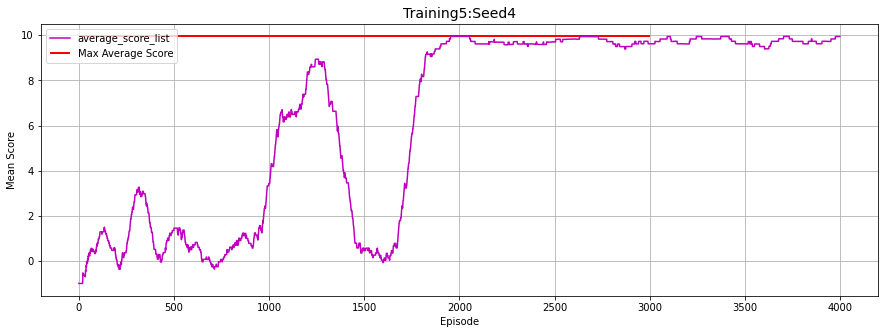

CPU times: user 1h 22min 4s, sys: 4h 50min 16s, total: 6h 12min 21s
Wall time: 1h 32min 38s


In [57]:
%%time

seed_number=5

for seed in range(seed_number):
    

                
    #Logged values


    scores = []
    step=[] 
    average_score_list=[]                                           #Saves last 100 average scores
    average_step_list=[]   
    scores_window = deque(maxlen=100)                               # Saves last 100 avarage solved steps
    step_window = deque(maxlen=100)                                 # last 100 scores

    #Hyperparamaters:

    n_episodes=4000
    max_t=500
    eps_start=1.0
    eps=eps_start
    eps_end=0.01 
    eps_decay=0.995
    #BETA = 0.025 For comparable experiment with DQN Beta bonus values is not used


    #Call SR function
    agent = SR_Agent(state_size, action_size, seed)
     
    #Load weights:    
    if seed == 0:
        print("Brain Loaded for Training 5 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train4_Seed0.pth'))
    if seed == 1:
        print("Brain Loaded for Training 5 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train4_Seed1.pth'))
    if seed == 2:
        print("Brain Loaded for Training 5 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train4_Seed2.pth'))
    if seed == 3:
        print("Brain Loaded for Training 5 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train4_Seed3.pth'))
    if seed == 4:
        print("Brain Saved for Training 5 in seed",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train4_Seed4.pth'))


    env.reset()
    for episode in range(1,n_episodes+1):

        dones=np.asarray([False])
        #Reset environment for each episode:
        env.reset()
        #Get information from reset environment:
        decision_steps, terminal_steps = env.get_steps(behavior_name)
        # get initial state of the unity environment
        state = decision_steps.obs[0]
        #Score list containing scores from each episode:
        score = 0
        mean_score=[]
        for i in range(max_t):


            action,r_int = agent.parallel_act(state, eps)        #action as numpy.int64
            action_fixed=np.array([action])
            action_tuple = ActionTuple()
            action_tuple.add_discrete(action_fixed)

            #Set action information
            env.set_actions(behavior_name,action_tuple)
            # Move the simulation forward
            env.step()
            # Get the new simulation results
            decision_steps, terminal_steps = env.get_steps(behavior_name)
            # get the next states for each unity agent in the environment
            next_state = decision_steps.obs[0]

            # get the rewards for each unity agent in the environment
            rewards = decision_steps.reward
            
            #Adjust r
            #r = np.asarray(rewards) + BETA * np.asarray(r_int)

            #If episode dones:
            if(len(terminal_steps.reward)!=0):

                        dones= np.asarray([True])
                        rewards= terminal_steps.reward
                        r = np.asarray(rewards) + BETA * np.asarray(r_int)
                        next_state = terminal_steps.obs[0]




            #Send (S, A, R, S') info to the training agent for replay buffer (memory) and network updates
            agent.step(state, action, rewards, next_state,dones)

            #New state is the next state:
            state = next_state

            #Iterate rewards on score
            score += rewards


            if rewards > 0:
                print("Task solved in step:",i)
                print("Score:",score)


            if dones== np.asarray([True]):

                break


        #Decrease epsilon parameter step by step:
        eps = max(eps_end, eps_decay*eps) 

        #Save last step
        step.append(i)
        # save last steps for window for average 100:        
        step_window.append(i)
        #Create list for avarge 100 scores
        average_step_list.append(np.mean(step_window))

        # save most recent score:
        scores.append(score)
        # save most recent score for window for average 100:        
        scores_window.append(score)  
        #Create list for avarge 100 scores
        average_score_list.append(np.mean(scores_window))



        print('\rEpisode {}\tAverage Score: {:.6f},\tAverage Step: {}'.format(episode, np.mean(scores_window),np.mean(step_window)), end="")
       
        if episode % 1000 == 0:
    
            if seed == 0:
                print("Brain Saved for Training 5 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train5_Seed0.pth')
            if seed == 1:
                print("Brain Saved for Training 5 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train5_Seed1.pth')
            if seed == 2:
                print("Brain Saved for Training 5 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train5_Seed2.pth')
            if seed == 3:
                print("Brain Saved for Training 5 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train5_Seed3.pth')

            if seed == 4:
                print("Brain Saved for Training 5 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train5_Seed4.pth')
                
                
                

    #Save datas per each seed
    score_shape=len(scores)
    df= pd.DataFrame(list(zip(np.array(scores).reshape(score_shape).tolist(), average_score_list, step,average_step_list)), columns= ['Scores','Mean_Scores','Completed_Steps','MeanCompleted_Steps'])
    df.to_csv('Train_5_Seed_'+str(seed)+'.csv')
    
    #Plot mean reward:
    color=["b","g","r","c","m"]
    plt.rcParams['figure.figsize'] = [15,5]
    plt.plot(np.arange(len(average_score_list)), average_score_list,label="average_score_list",color=color[seed])
    plt.hlines(y=max(average_score_list), xmin=0, xmax=3000, colors='red', linestyles='-', lw=2, label='Max Average Score')
    plt.xlabel('Episode', fontsize=10)
    plt.ylabel('Mean Score', fontsize=10)
    plt.title("Training5:Seed{}".format(seed),fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.savefig("Training5:Seed{}.png".format(seed))
    plt.show()
    
    






In [58]:
env.close()

In [59]:
print("Traning Done for SR")

Traning Done for SR
